### Importing dataset to Google Colab

In [ ]:
## import dataset to google colab
from google.colab import files
upload = files.upload()

Saving credit_2018_2019.xlsx to credit_2018_2019.xlsx


### Importing all necessary libraries

In [ ]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

sb.set


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Reading credit card dataset excel file (2 spreadsheets)

In [ ]:
# Reading credit card excel file (2 spreadsheets)
creditData = pd.read_excel('credit_2018_2019.xlsx','info_all')
finData = pd.read_excel('credit_2018_2019.xlsx', 'Finance_all')

# Data Cleaning

### Deciding which variables to work on
As credit card users, some variables that will influence their decision to attrition their credit card. These variables are customer demographics (age, gender, educatuion level, married status, income), card types, duration of credit card, months of inactivity, contact count, relationship the owner have,  credit limit, total revolving balance, open to buy, total transaction count, utilization ratio and the period they left.

From the perspective of an owner, on top of those, we may consider other factors such as other co

As such, we have picked out the variables below which may have significant impact in relation to attrition rate.

Variables: "Attrition_Flag", "Customer Age", "Gender", "Education_Level", "Martial_Status", "Income_Category", "Card_Category", ""Months_on_books", "Total_Relationship_count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Trans_Ct", "Avg_Utilization_Ratio", "Date_Leave".

### Converting Categorical Datas to numeric values

In [ ]:
creditData['Gender'].replace(['M', 'F'], [0,1], inplace = True)
creditData['Education_Level'].replace(['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'], [0,1,2,3,4,5], inplace = True)
creditData['Marital_Status'].replace(['Single', 'Married', 'Divorced'], [0,1,2], inplace = True)
creditData['Income_Category'].replace(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'], [0,1,2,3,4], inplace = True)
creditData['Card_Category'].replace(['Blue', 'Silver', 'Gold', 'Platinum'], [0,1,2,3], inplace = True)

creditData.head()

CLIENTNUM     Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  712672083  Existing Customer            65       1                0   
1  713049933  Existing Customer            47       1                1   
2  713049933  Existing Customer            48       1                1   
3  713135883  Existing Customer            65       1                0   
4  713135883  Existing Customer            64       1                0   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                1               1                0              0   
1                3               1                1              1   
2                3               1                1              1   
3                2               1                0              0   
4                2               1                0              0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              36  ...                       3                      2   
1              36  ...                       2                      2   
2              48  ...                       6                      2   
3              65  ...                       5                      0   
4              53  ...                       3                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0        1438.3                  747            691.3              24   
1        5756.0                    0           5756.0              44   
2        5756.0                  990           5756.0              25   
3        4315.0                  393           3598.0              73   
4        4315.0                  717           3598.0              51   

   Avg_Utilization_Ratio  Quarter  Year  Date_Leave  
0                  0.519     none  2018   none,2018  
1                  0.000     none  2018   none,2018  
2                  0.170     none  2019   none,2019  
3                  0.090     none  2019   none,2019  
4                  0.166     none  2018   none,2018  

[5 rows x 21 columns]

In [ ]:
# Splitting into 2018 and 2019 datas
creditData_2018 = creditData[creditData['Year'].isin([2018])].copy()
creditData_2019 = creditData[creditData['Year'].isin([2019])].copy()

### Summing of Transaction Amounts by 'CLIENTNUM' by 'Year'

Reason: Transaction amount is split according to type of transactions (Cash, Eat, Fuel, and Shop)

Summing these values will represent the Transaction Amounts per client, per year.

In [ ]:
#Trans_Amount by Year
TransData = pd.DataFrame(finData[['CLIENTNUM', 'Attrition_Flag','Trans_Amount', 'Year']])

Trans_2018 = finData[finData['Year'].isin([2018])].copy()
Trans_2018_Sum = pd.pivot_table(data = Trans_2018, values = 'Trans_Amount', index = ['CLIENTNUM', 'Attrition_Flag', 'Year'], aggfunc=np.sum)

Trans_2019 = finData[finData['Year'].isin([2019])].copy()
Trans_2019_Sum = pd.pivot_table(data = Trans_2019, values = 'Trans_Amount', index = ['CLIENTNUM', 'Attrition_Flag', 'Year'], aggfunc=np.sum)

In [ ]:
Trans_2018_Sum = Trans_2018_Sum.reset_index(drop = False)
Trans_2018_Sum.drop(columns=['Year', 'Attrition_Flag'], inplace = True)
Trans_2018_Sum.head()

CLIENTNUM  Trans_Amount
0  708082083        1144.0
1  708083283        1291.0
2  708084558        1887.0
3  708085458        1171.0
4  708086958         816.0

In [ ]:
TransData = pd.DataFrame(finData[['CLIENTNUM', 'Attrition_Flag','Trans_Amount', 'Year']])

### Merging Trans_Amount data to the other datas
(according to 'CLIENTNUM' per year)

In [ ]:
merged_df_2018 = pd.merge(creditData_2018, Trans_2018_Sum, on='CLIENTNUM')
merged_df_2018.head()

CLIENTNUM     Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  712672083  Existing Customer            65       1                0   
1  713049933  Existing Customer            47       1                1   
2  713135883  Existing Customer            64       1                0   
3  713220258  Existing Customer            65       1                0   
4  713246208  Existing Customer            50       0                1   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                1               1                0              0   
1                3               1                1              1   
2                2               1                0              0   
3                2               1                1              1   
4                3               0                1              1   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              36  ...                      2        1438.3   
1              36  ...                      2        5756.0   
2              53  ...                      0        4315.0   
3              36  ...                      2        8138.0   
4              56  ...                      4       13364.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0                  747            691.3              24   
1                    0           5756.0              44   
2                  717           3598.0              51   
3                 2104           6034.0              29   
4                 1318          12046.0              54   

   Avg_Utilization_Ratio  Quarter  Year Date_Leave  Trans_Amount  
0                  0.519     none  2018  none,2018        2726.0  
1                  0.000     none  2018  none,2018        1475.0  
2                  0.166     none  2018  none,2018        1687.0  
3                  0.259     none  2018  none,2018        1828.0  
4                  0.099     none  2018  none,2018        1767.0  

[5 rows x 22 columns]

In [ ]:
merged_df_2019 = pd.merge(creditData_2019, Trans_2019_Sum, on='CLIENTNUM')
merged_df_2019.head()

CLIENTNUM     Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  713049933  Existing Customer            48       1                1   
1  713135883  Existing Customer            65       1                0   
2  713220258  Existing Customer            64       1                0   
3  713246208  Existing Customer            51       0                1   
4  713536158  Existing Customer            64       0                1   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                1              1   
1                2               1                0              0   
2                2               1                1              1   
3                3               0                1              1   
4                2               1                0              0   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              48  ...                      2        5756.0   
1              65  ...                      0        4315.0   
2              48  ...                      2        8138.0   
3              68  ...                      4       13364.0   
4              68  ...                      2        4189.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0                  990           5756.0              25   
1                  393           3598.0              73   
2                  645           6034.0             112   
3                 1305          12046.0              80   
4                  422           4189.0              20   

   Avg_Utilization_Ratio  Quarter  Year Date_Leave  Trans_Amount  
0                   0.17     none  2019  none,2019        1183.0  
1                   0.09     none  2019  none,2019        2045.0  
2                   0.08     none  2019  none,2019        2300.0  
3                   0.10     none  2019  none,2019        7045.0  
4                   0.10     none  2019  none,2019        1081.0  

[5 rows x 22 columns]

In [ ]:
merged_df_both = pd.concat([merged_df_2018, merged_df_2019])
merged_df_both.head(23-40)

CLIENTNUM     Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0     712672083  Existing Customer            65       1                0   
1     713049933  Existing Customer            47       1                1   
2     713135883  Existing Customer            64       1                0   
3     713220258  Existing Customer            65       1                0   
4     713246208  Existing Customer            50       0                1   
...         ...                ...           ...     ...              ...   
9922  900201751  Existing Customer            25       0                2   
9923  900202192  Existing Customer            25       1                3   
9924  900202193  Existing Customer            25       1                2   
9925  900202194  Existing Customer            25       0                3   
9926  900202195  Existing Customer            25       0                1   

      Education_Level  Marital_Status  Income_Category  Card_Category  \
0                   1               1                0              0   
1                   3               1                1              1   
2                   2               1                0              0   
3                   2               1                1              1   
4                   3               0                1              1   
...               ...             ...              ...            ...   
9922                1               1                0              0   
9923                1               1                0              0   
9924                3               1                0              0   
9925                3               1                1              0   
9926                2               1                1              1   

      Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0                 36  ...                      2        1438.3   
1                 36  ...                      2        5756.0   
2                 53  ...                      0        4315.0   
3                 36  ...                      2        8138.0   
4                 56  ...                      4       13364.0   
...              ...  ...                    ...           ...   
9922              16  ...                      1        2000.0   
9923              18  ...                      2        2000.0   
9924              52  ...                      3        1700.0   
9925              29  ...                      2        3264.0   
9926              41  ...                      3        8455.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0                     747            691.3              24   
1                       0           5756.0              44   
2                     717           3598.0              51   
3                    2104           6034.0              29   
4                    1318          12046.0              54   
...                   ...              ...             ...   
9922                  861           1438.3             115   
9923                  731           1456.0              83   
9924                  434           1438.3              83   
9925                 1158           3264.0             110   
9926                 1189           5938.0              83   

      Avg_Utilization_Ratio  Quarter  Year Date_Leave  Trans_Amount  
0                     0.519     none  2018  none,2018      2726.000  
1                     0.000     none  2018  none,2018      1475.000  
2                     0.166     none  2018  none,2018      1687.000  
3                     0.259     none  2018  none,2018      1828.000  
4                     0.099     none  2018  none,2018      1767.000  
...                     ...      ...   ...        ...           ...  
9922                  0.430     none  2019  none,2019       428.624  
9923                  0.370     none  2019  none,2019       973.000  
9924                  0.260     none

# Exploratory Analysis & Visualisation Of Data

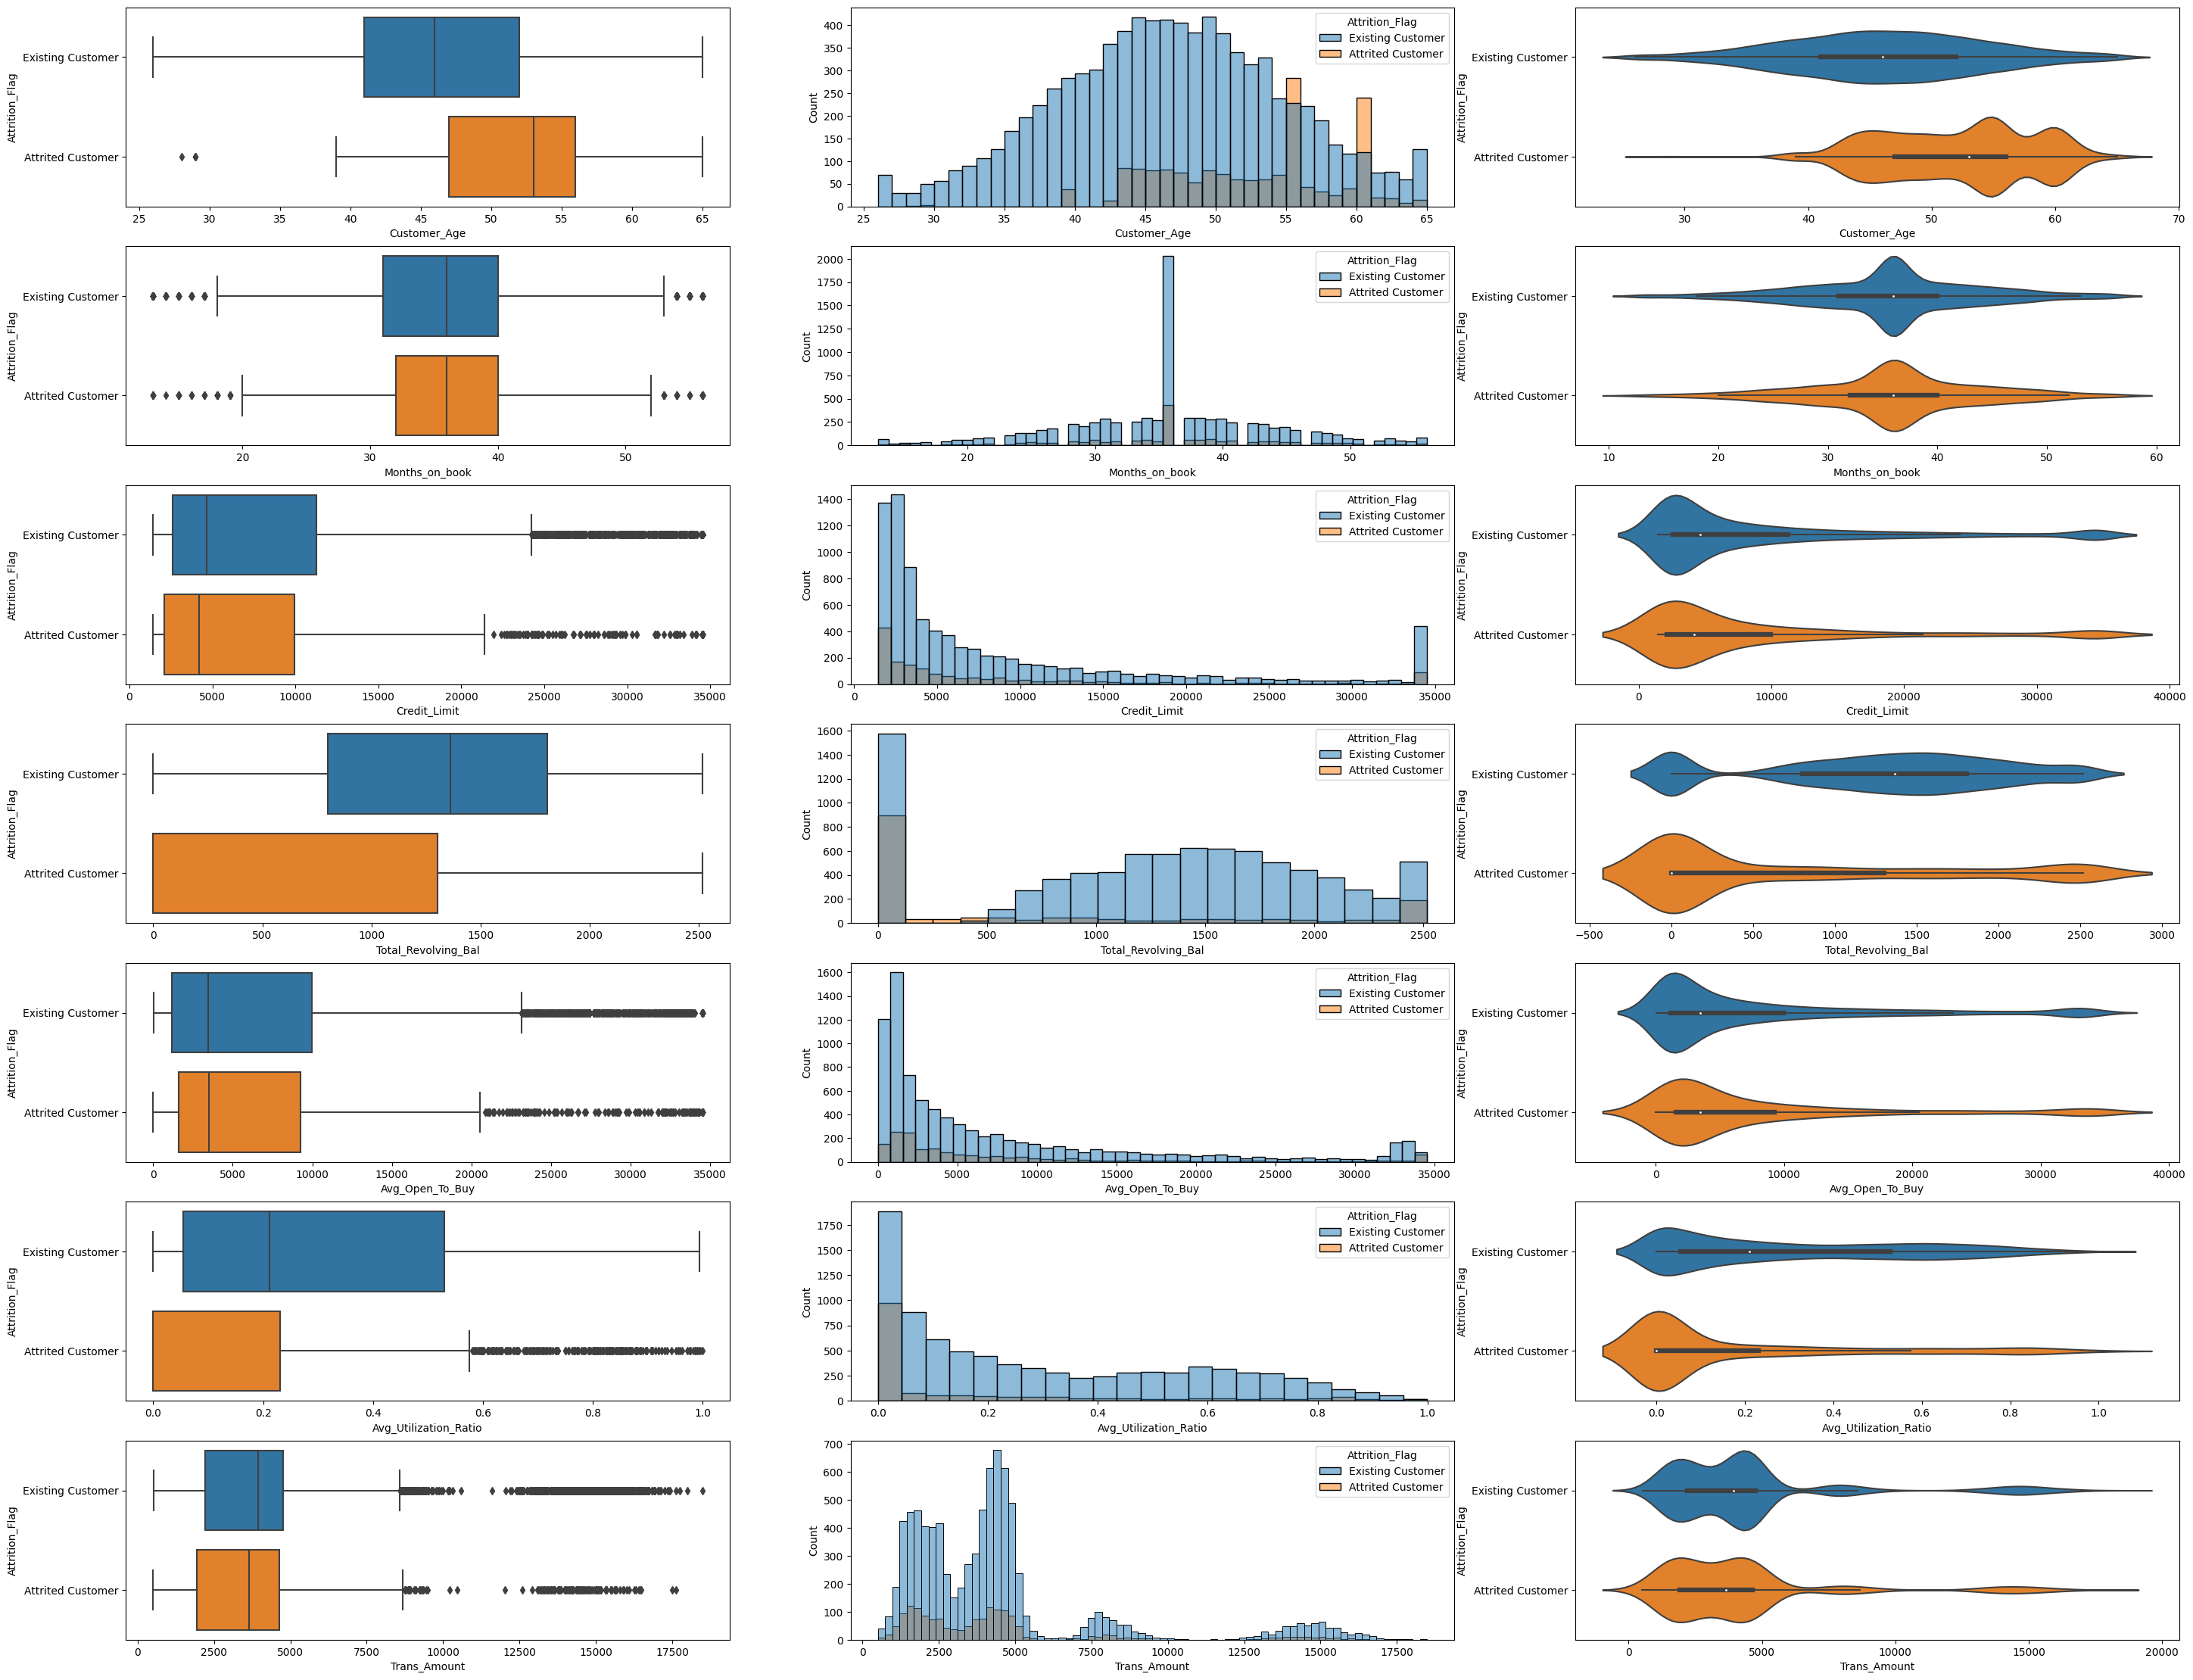

In [ ]:
#Statistical description of the data and plot standard statistical distributions for each variable
#Graph for Statistical Analysis
def VisualizationGraphs(dataframe, var_list):

    f, axes = plt.subplots(len(var_list), 3, figsize = (len(var_list)*5, len(var_list)*4))

    count_int = 0
    for i in var_list:
        sb.boxplot(data = dataframe, x = dataframe[i], y = 'Attrition_Flag', orient = 'h', ax = axes[count_int, 0])
        sb.histplot(data = dataframe, x = dataframe[i], hue = 'Attrition_Flag', kde = False, ax = axes[count_int, 1])
        sb.violinplot(data = dataframe, x = dataframe[i], y = 'Attrition_Flag', orient = 'h', ax = axes[count_int, 2])
        count_int += 1

VisualizationGraphs(merged_df_2018, ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio','Trans_Amount'])

## Comments:

Customer_Age: The age for attrited customers are generally higher than the age for existing customers

Months_on_book: Months On Books is closest to the normal distribution

Total_Revolving_Bal: The median of existing customers is more centred compared to that of attrited customers

## Hypothesis:
Customer_Age, Months_on_book, Total_Revolving_Bal would contribute significantly to the prediction of customer attrition.

As for the other variables, none of them displayed a distict difference between existing customers and attrited customers, and thus would be of little importance to predict the customer attrition rate.



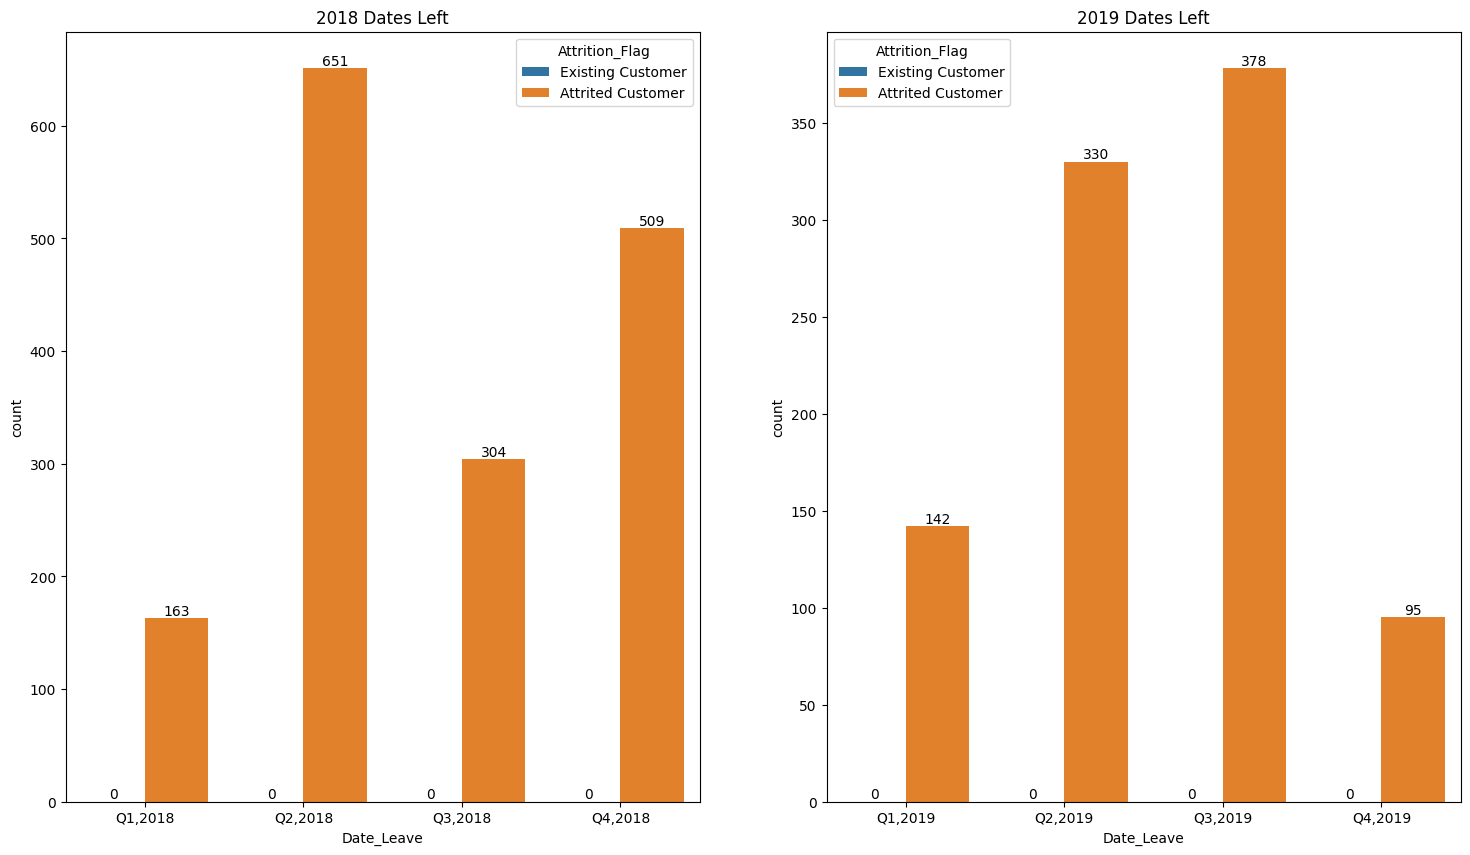

In [ ]:
#Date_Leave Countplot, we can clearly see that Q3 have the highest attrition rate

DateLeaveData = pd.DataFrame(creditData[['Date_Leave', 'Attrition_Flag', 'Year']])

DateLeave_2018 = creditData[creditData['Year'].isin([2018])].copy()
DateLeave_2019 = creditData[creditData['Year'].isin([2019])].copy()

f, axes = plt.subplots(1, 2, figsize = (18,10))
DateLeave_2018 = sb.countplot(ax=axes[0], x = "Date_Leave", data = DateLeave_2018, hue = 'Attrition_Flag', order=['Q1,2018', 'Q2,2018', 'Q3,2018', 'Q4,2018'])
DateLeave_2019 = sb.countplot(ax=axes[1], x = "Date_Leave", data = DateLeave_2019, hue = 'Attrition_Flag', order=['Q1,2019', 'Q2,2019', 'Q3,2019', 'Q4,2019'])
axes[0].set_title('2018 Dates Left')
axes[1].set_title('2019 Dates Left')

for i in DateLeave_2018.containers:
    DateLeave_2018.bar_label(i)
for j in DateLeave_2019.containers:
    DateLeave_2019.bar_label(j)

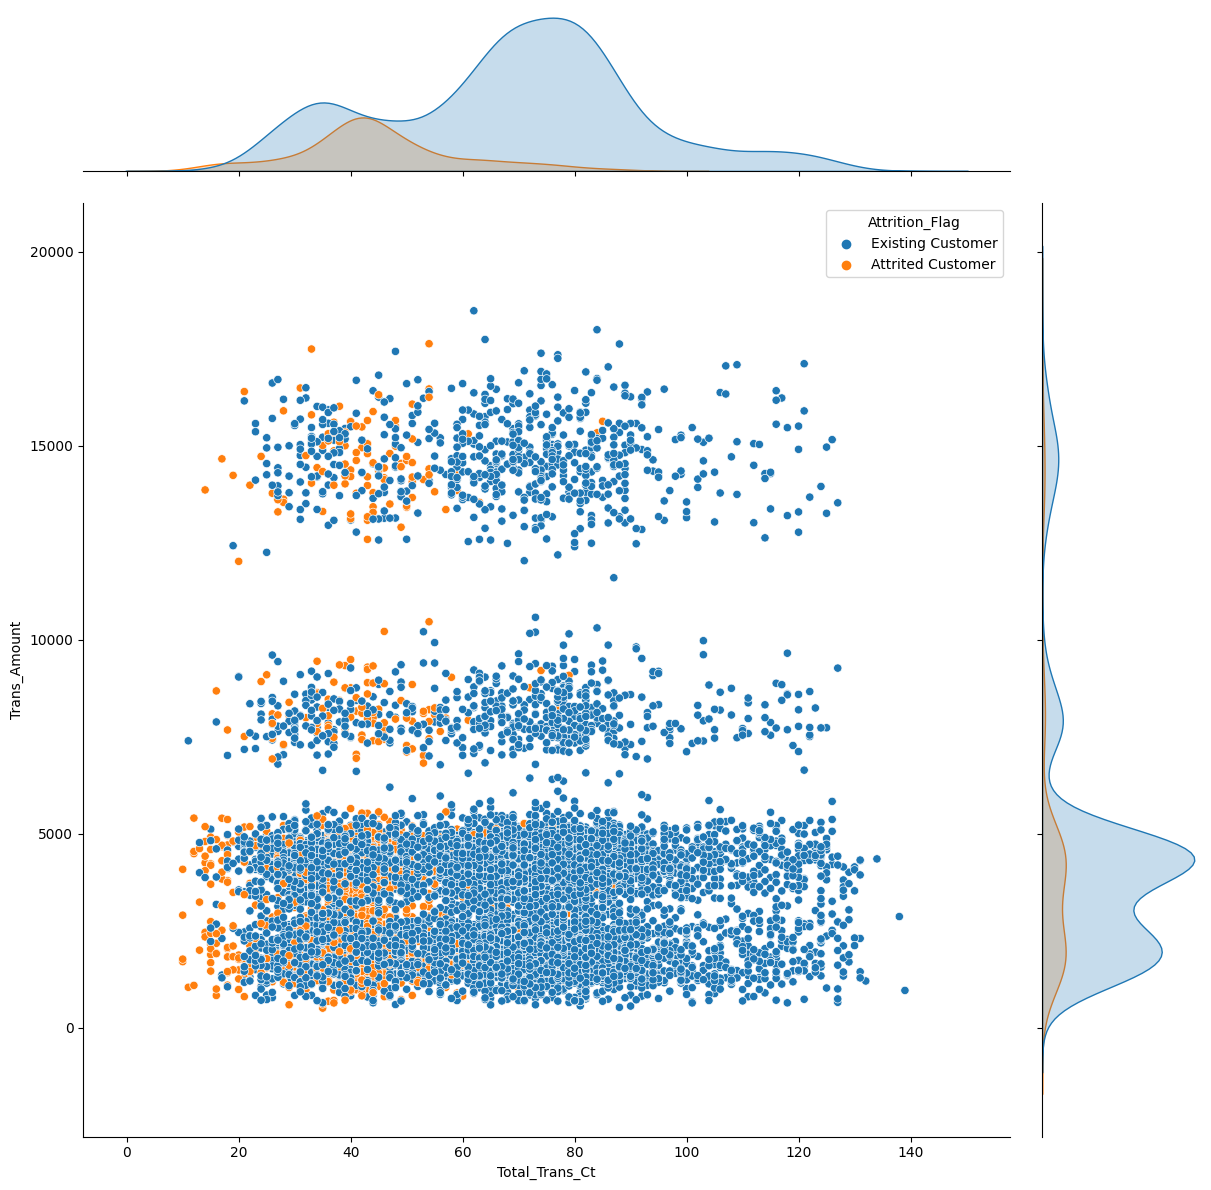

In [ ]:
sb.jointplot(data = merged_df_2018, x = "Total_Trans_Ct", y = "Trans_Amount", height = 12, hue = 'Attrition_Flag')

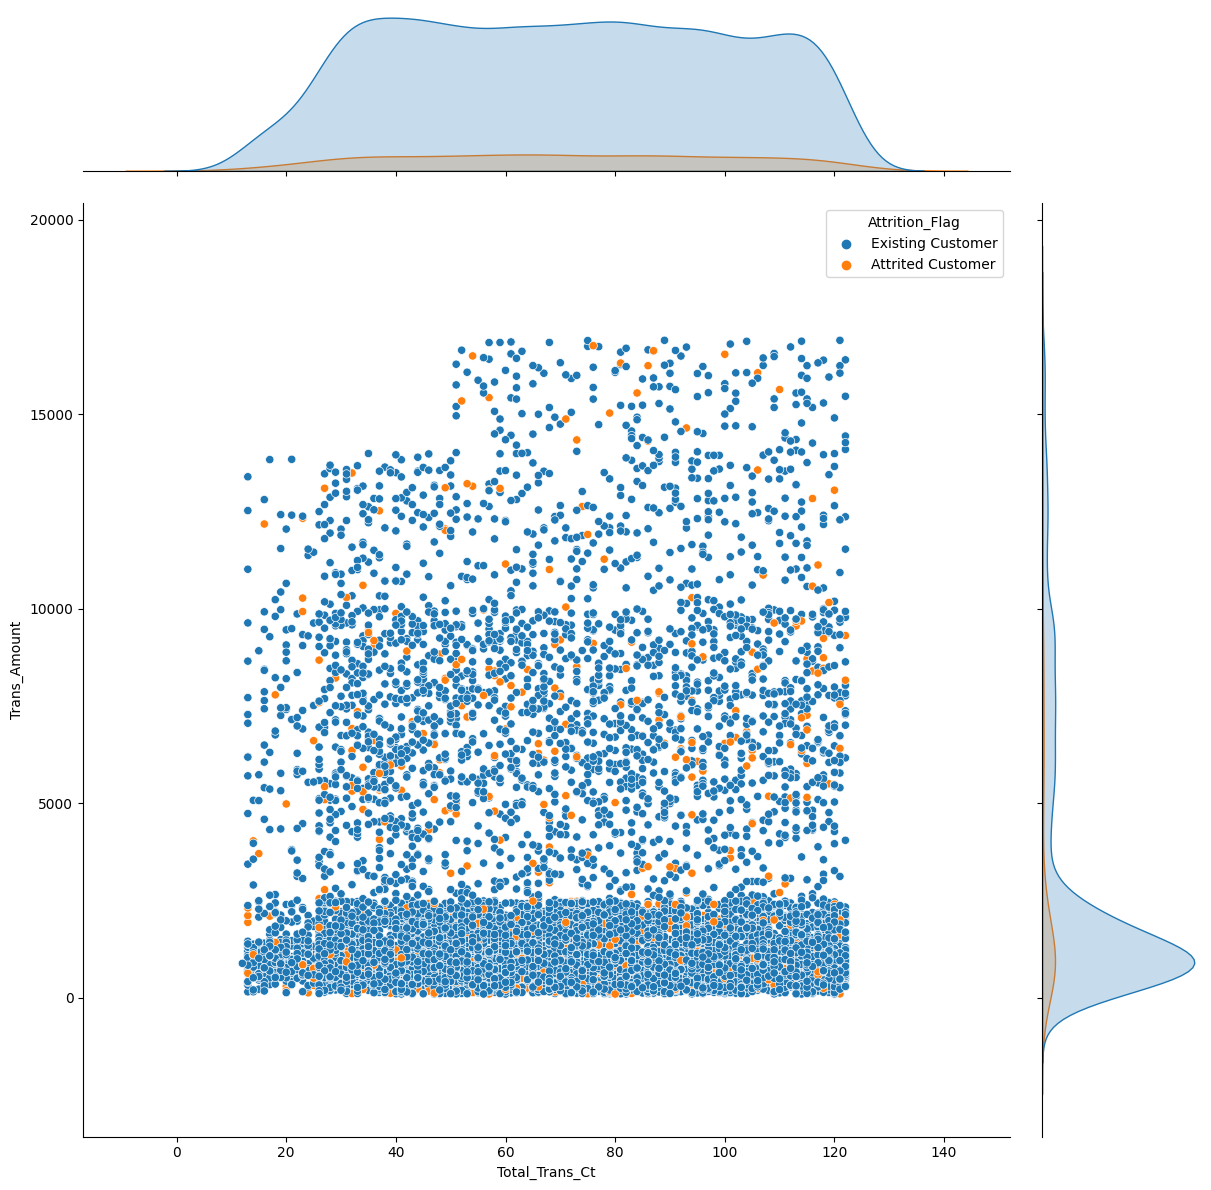

In [ ]:
sb.jointplot(data = merged_df_2019, x = "Total_Trans_Ct", y = "Trans_Amount", height = 12, hue = 'Attrition_Flag')

#Observation
### Comments on 2018 jointplot:
There is a trend where majority of the attrited customers have lesser transaction counts compared to existing customers.

### Comments on 2019 jointplot:
Compared to 2018, this 2019 graph is more randomized showing no trend.

## Hypothesis:
The 2018 data could yield a higher importance for the AI model in predicting customer attrition as compared to the 2019 data, due to the randomized nature of the 2019 data.


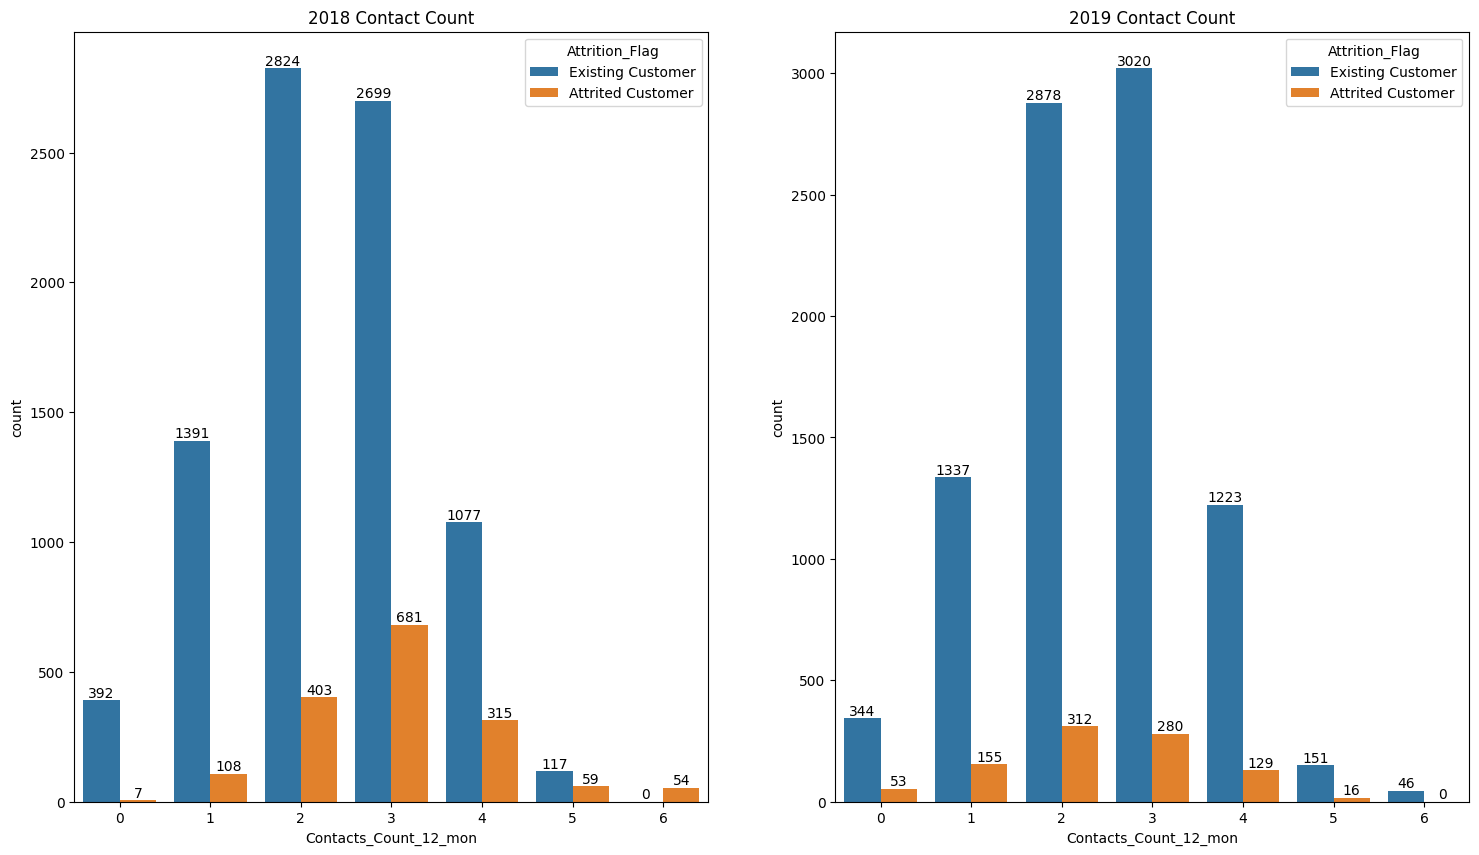

In [ ]:
# contact count
ContactsData = pd.DataFrame(creditData[['CLIENTNUM', 'Attrition_Flag', 'Contacts_Count_12_mon', 'Year']])

Contacts_2018 = ContactsData[ContactsData['Year'].isin([2018])].copy()
Contacts_2019 = ContactsData[ContactsData['Year'].isin([2019])].copy()

f, axes = plt.subplots(1, 2, figsize = (18,10))
Contact_2018 = sb.countplot(ax=axes[0], x = "Contacts_Count_12_mon", data = Contacts_2018, hue = 'Attrition_Flag')
Contact_2019 = sb.countplot(ax=axes[1], x = "Contacts_Count_12_mon", data = Contacts_2019, hue = 'Attrition_Flag')
axes[0].set_title('2018 Contact Count')
axes[1].set_title('2019 Contact Count')

for i in Contact_2018.containers:
    Contact_2018.bar_label(i)
for j in Contact_2019.containers:
    Contact_2019.bar_label(j)

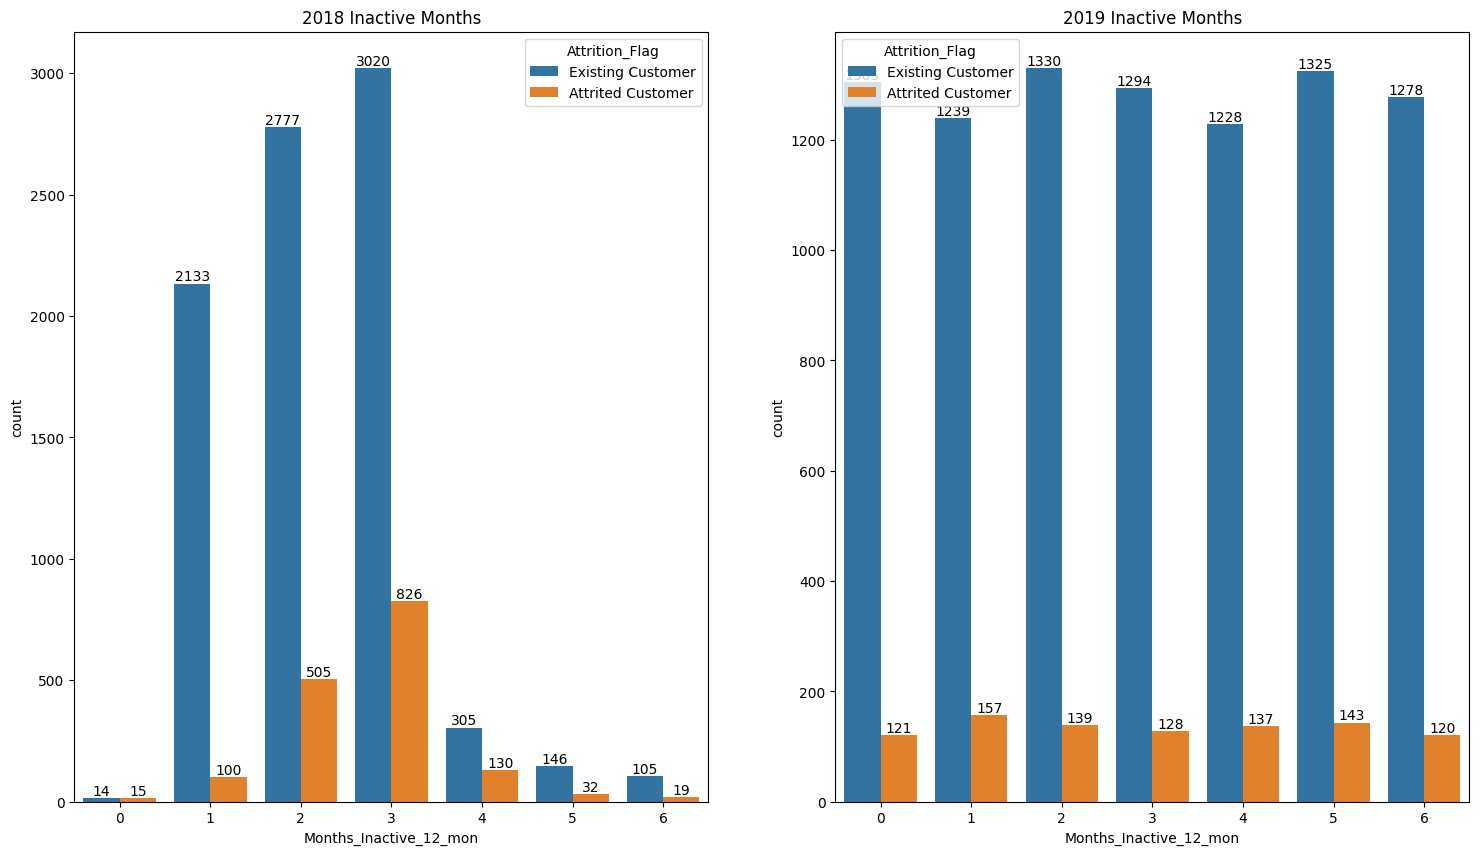

In [ ]:
# Inactive Months count
InactiveData = pd.DataFrame(creditData[['CLIENTNUM', 'Attrition_Flag', 'Months_Inactive_12_mon', 'Year']])

Inactive_2018 = InactiveData[InactiveData['Year'].isin([2018])].copy()
Inactive_2019 = InactiveData[InactiveData['Year'].isin([2019])].copy()

f, axes = plt.subplots(1, 2, figsize = (18,10))
Inact_2018 = sb.countplot(ax=axes[0], x = "Months_Inactive_12_mon", data = Inactive_2018, hue = 'Attrition_Flag')
Inact_2019 = sb.countplot(ax=axes[1], x = "Months_Inactive_12_mon", data = Inactive_2019, hue = 'Attrition_Flag')
axes[0].set_title('2018 Inactive Months')
axes[1].set_title('2019 Inactive Months')

for i in Inact_2018.containers:
    Inact_2018.bar_label(i)
for j in Inact_2019.containers:
    Inact_2019.bar_label(j)

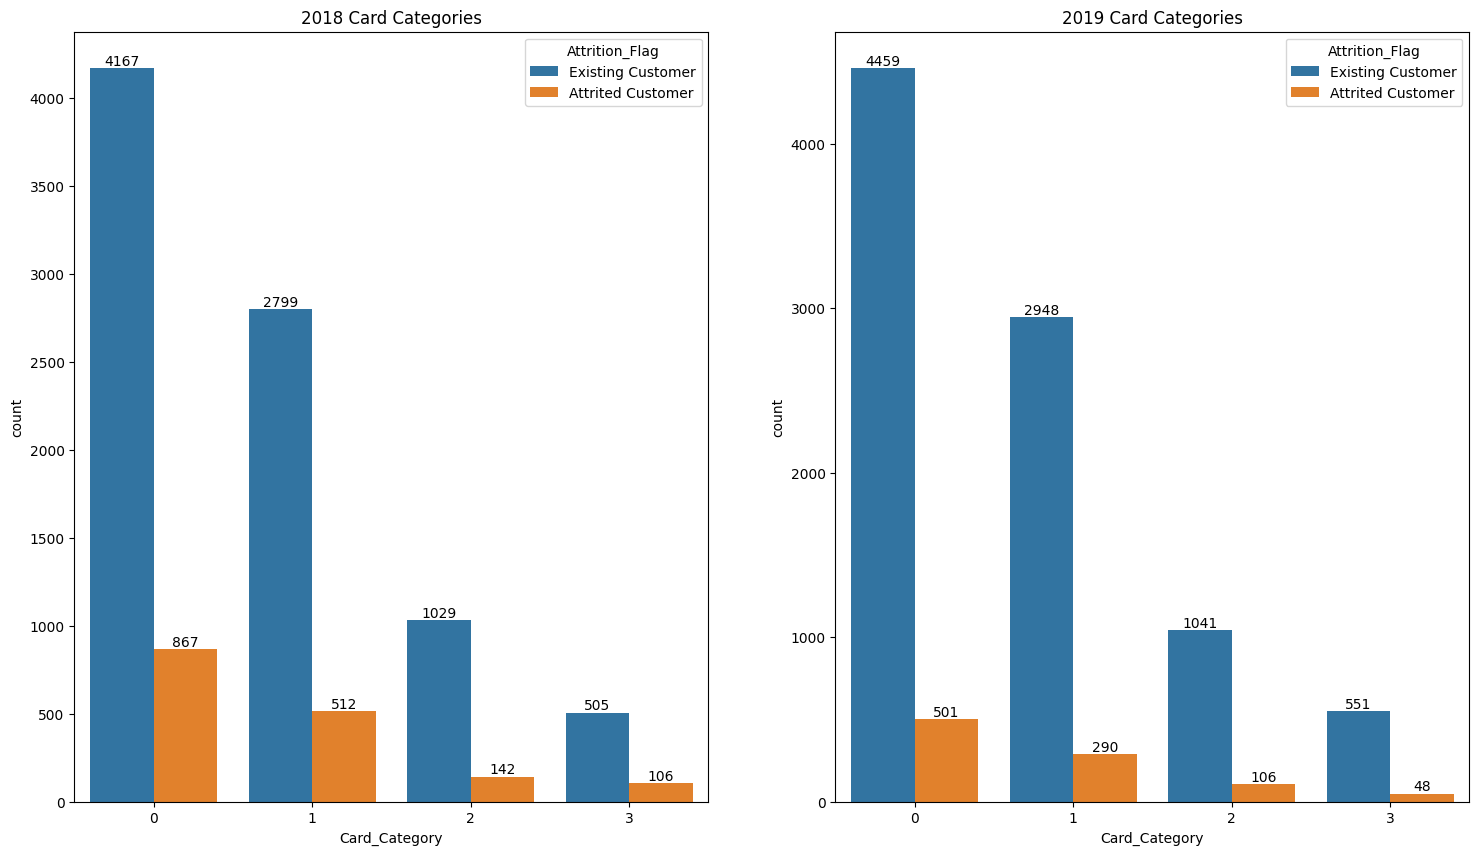

In [ ]:
# Card category count
CardCatData = pd.DataFrame(creditData[['CLIENTNUM', 'Attrition_Flag', 'Card_Category', 'Year']])

CardCat_2018 = CardCatData[CardCatData['Year'].isin([2018])].copy()
CardCat_2019 = CardCatData[CardCatData['Year'].isin([2019])].copy()

f, axes = plt.subplots(1, 2, figsize = (18,10))
Card_2018 = sb.countplot(ax=axes[0], x = "Card_Category", data = CardCat_2018, hue = 'Attrition_Flag', order = [0,1,2,3])
Card_2019 = sb.countplot(ax=axes[1], x = "Card_Category", data = CardCat_2019, hue = 'Attrition_Flag', order = [0,1,2,3])
axes[0].set_title('2018 Card Categories')
axes[1].set_title('2019 Card Categories')

for i in Card_2018.containers:
    Card_2018.bar_label(i)
for j in Card_2019.containers:
    Card_2019.bar_label(j)

### Card Category:
0 - Blue

1 - Silver

2 - Gold

3 - Platinum

In [ ]:
# Based off the percentages the attrition rate of card category, Blue have the highest attrition rate in 2018 and Platium have the highest attrition rate in 2019.
print("2018 Blue Attrition Rate:\t ", (867/(4167+867)*100), '%')
print("2018 Silver Attrition Rate:\t ", (512/(2799+512)*100), '%')
print("2018 Gold Attrition Rate:\t ", (142/(1029+142)*100), '%')
print("2018 Platinum Attrition Rate:\t ", (106/(505+106)*100), '%')
print()
print("2019 Blue Attrition Rate:\t ", (501/(4459+501)*100), '%')
print("2019 Silver Attrition Rate:\t ", (290/(2948+290)*100), '%')
print("2019 Gold Attrition Rate:\t ", (106/(1041+106)*100), '%')
print("2019 Platinum Attrition Rate:\t ", (48/(551+48)*100), '%')

2018 Blue Attrition Rate:	  17.222884386174016 %
2018 Silver Attrition Rate:	  15.46360616128058 %
2018 Gold Attrition Rate:	  12.126387702818105 %
2018 Platinum Attrition Rate:	  17.348608837970538 %

2019 Blue Attrition Rate:	  10.100806451612904 %
2019 Silver Attrition Rate:	  8.956145768993204 %
2019 Gold Attrition Rate:	  9.24149956408021 %
2019 Platinum Attrition Rate:	  8.013355592654424 %


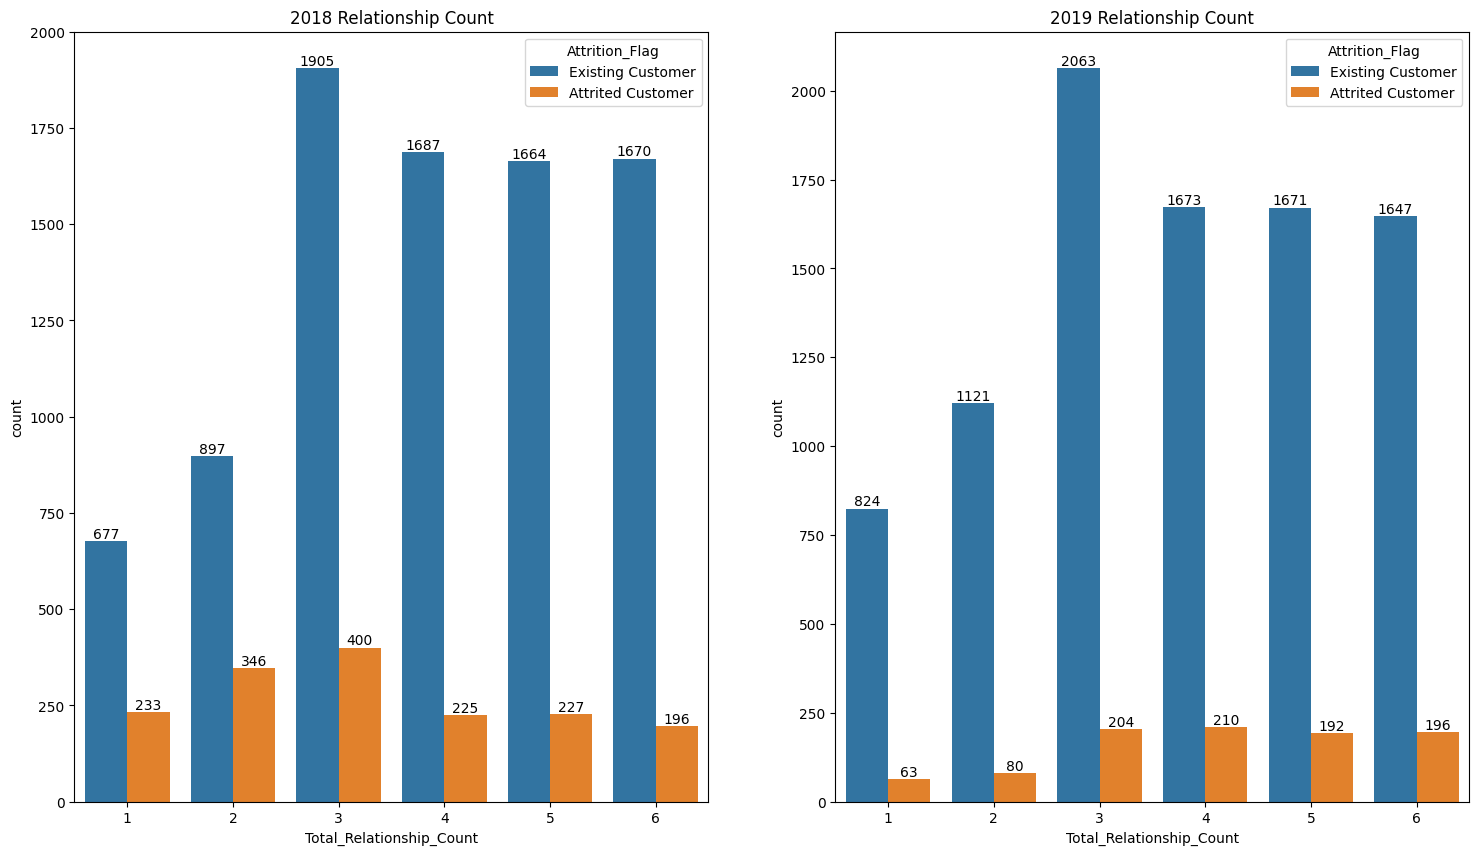

In [ ]:
# Relationship count
RelationshipData = pd.DataFrame(creditData[['CLIENTNUM', 'Attrition_Flag', 'Total_Relationship_Count', 'Year']])

Relationship_2018 = RelationshipData[RelationshipData['Year'].isin([2018])].copy()
Relationship_2019 = RelationshipData[RelationshipData['Year'].isin([2019])].copy()

f, axes = plt.subplots(1, 2, figsize = (18,10))
Relation_2018 = sb.countplot(ax=axes[0], x = "Total_Relationship_Count", data = Relationship_2018, hue = 'Attrition_Flag')
Relation_2019 = sb.countplot(ax=axes[1], x = "Total_Relationship_Count", data = Relationship_2019, hue = 'Attrition_Flag')
axes[0].set_title('2018 Relationship Count')
axes[1].set_title('2019 Relationship Count')

for i in Relation_2018.containers:
    Relation_2018.bar_label(i)
for j in Relation_2019.containers:
    Relation_2019.bar_label(j)

<Axes: xlabel='Total_Revolving_Bal', ylabel='Attrition_Flag'>

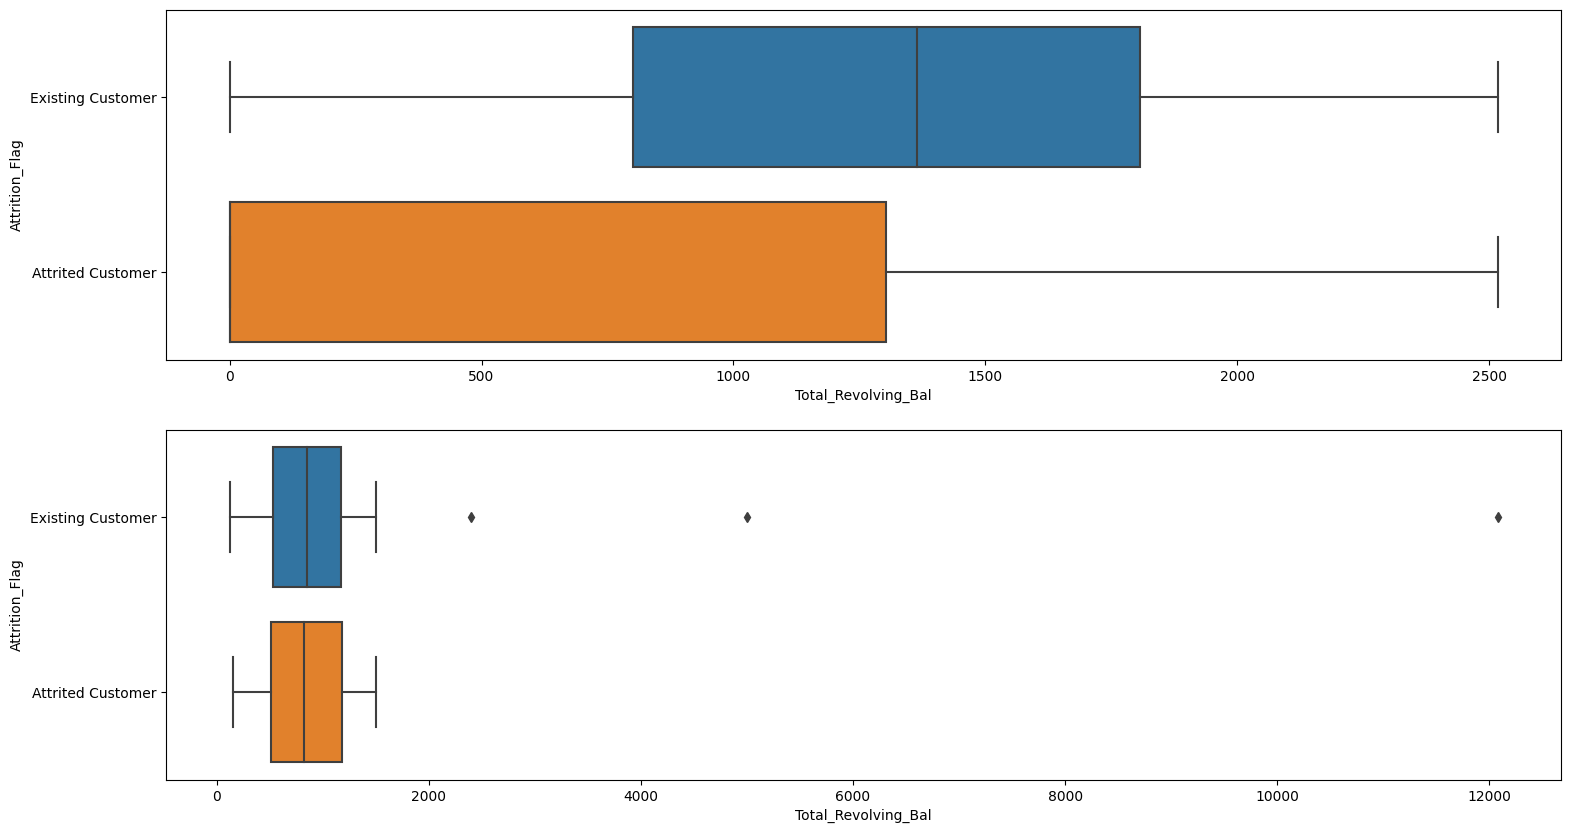

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [ ]:
#Total_Revolving_Bal by Year
Rev_Data = pd.DataFrame(creditData[['Total_Revolving_Bal', 'Attrition_Flag', 'Year']])

Rev_2018 = creditData[creditData['Year'].isin([2018])].copy()
Rev_2019 = creditData[creditData['Year'].isin([2019])].copy()

f, axes = plt.subplots(2, 1, figsize = (18,10))
#Relationship between Total Revolving Balance and number of attrited customers in 2018
f = plt.figure(figsize=(16, 8))
sb.boxplot(ax=axes[0], x = 'Total_Revolving_Bal', y = 'Attrition_Flag' , data = Rev_2018, orient = 'h')

#Relationship between Total Revolving Balance and number of attrited customers in 2019
f = plt.figure(figsize=(16, 8))
sb.boxplot(ax=axes[1],x = 'Total_Revolving_Bal', y = 'Attrition_Flag' , data = Rev_2019, orient = 'h')

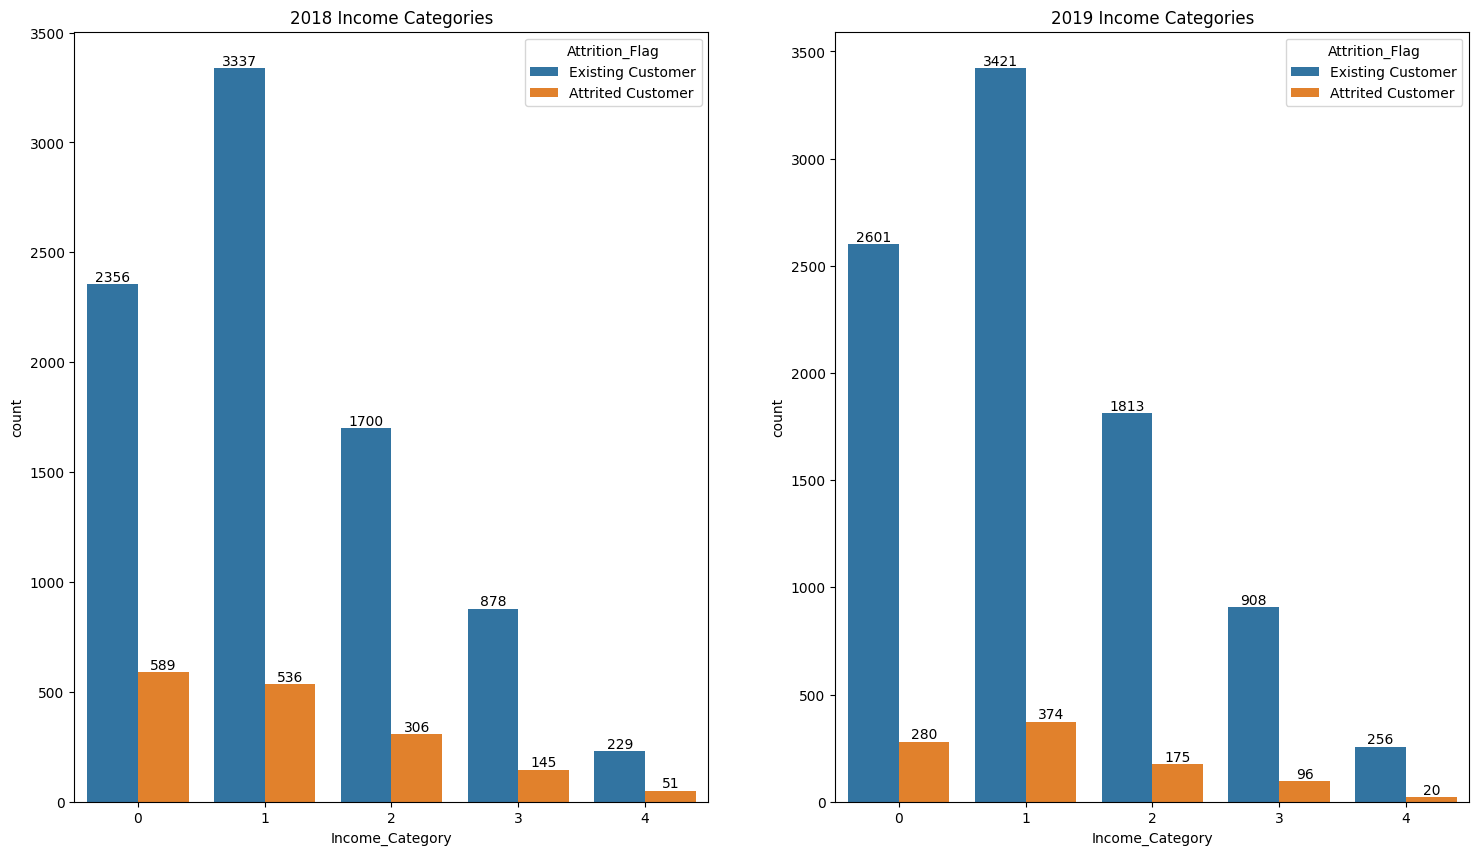

In [ ]:
#Income_Category by Year
IncomeData = pd.DataFrame(creditData[['Income_Category', 'Attrition_Flag', 'Year']])

Income_2018 = creditData[creditData['Year'].isin([2018])].copy()
Income_2019 = creditData[creditData['Year'].isin([2019])].copy()

f, axes = plt.subplots(1, 2, figsize = (18,10))
Income_2018 = sb.countplot(ax=axes[0], x = "Income_Category", data = Income_2018, hue = 'Attrition_Flag',order=[0,1,2,3,4])
Income_2019 = sb.countplot(ax=axes[1], x = "Income_Category", data = Income_2019, hue = 'Attrition_Flag',order=[0,1,2,3,4])
axes[0].set_title('2018 Income Categories')
axes[1].set_title('2019 Income Categories')

for i in Income_2018.containers:
    Income_2018.bar_label(i)
for j in Income_2019.containers:
    Income_2019.bar_label(j)

## Observation

As seen from the countplots of the categorical datas above, there is not much of a distinct difference between existing customers and attrited customers, thus would be of little importance to predict the customer attrition rate.


### Income Category
0 - Less than $40K

1 - $40K - 60K

2 - $60K - 80K

3 - $80K - 120K

4 - $120K +

#Balancing of Data

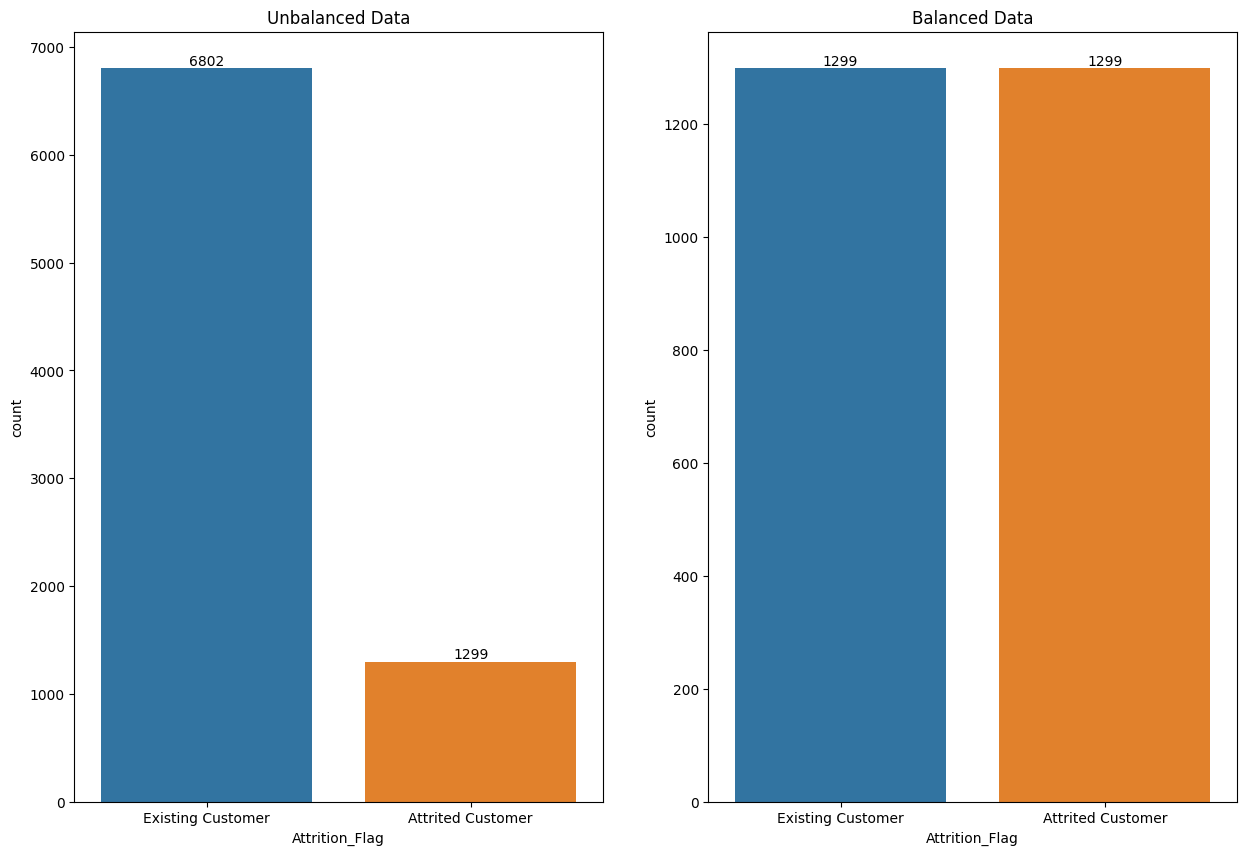

In [ ]:
# Global Train & Test set
def Train_Test_Balance(df, predictor_list, response_str = 'Attrition_Flag'):
    Y = pd.DataFrame(df[response_str])
    X = pd.DataFrame(df[predictor_list])
    #Splitting the dataset into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    #Balancing (Undersampling) the train set
    rus = RandomUnderSampler(random_state = 0)
    X_train_rus, Y_train_rus = rus.fit_resample(X_train, Y_train)

    #showing countplot of the balanced data
    f, axes = plt.subplots(1, 2 , figsize = (15, 10))
    Unbalanced = sb.countplot(ax = axes[0], data = Y_train, x = 'Attrition_Flag', order = ['Existing Customer', 'Attrited Customer'])
    Balanced = sb.countplot(ax = axes[1], data = Y_train_rus, x = 'Attrition_Flag', order = ['Existing Customer', 'Attrited Customer'])
    axes[0].set_title('Unbalanced Data')
    axes[1].set_title('Balanced Data')
    for i in Unbalanced.containers:
      Unbalanced.bar_label(i)
    for j in Balanced.containers:
      Balanced.bar_label(j)


    #return dictionary with all split dataframes
    creditData_dict = {}
    creditData_dict = {"X_train_rus": X_train_rus, "Y_train_rus": Y_train_rus, "X_test": X_test, "Y_test": Y_test}
    return creditData_dict

#CALL FUNCTION TEMPLATE
#edit predictor_list with all relevant variablesm currently, all numerical
creditData_dict = Train_Test_Balance(merged_df_2018, ['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount'], 'Attrition_Flag')



As there is significantly more 'Existing Customer' than 'Attrited Customer', **Random Undersampling** is used to randomly remove data from 'Existing Customer', thus matching the number of 'Existing Customer' and 'Attrited Customer' in the train dataset.

References:
https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

# Hyper Parameter Tuning & Cross Validation (RandomSearchCV)

In [ ]:
#Train and Test data sets
X_train_rus = creditData_dict["X_train_rus"]
Y_train_rus = creditData_dict["Y_train_rus"]
X_test = creditData_dict["X_test"]
Y_test = creditData_dict["Y_test"]

**Hyperparameter Tuning** to find the most optimal parameters to use for each AI model

In [ ]:
#Hypertuning for Decision Tree
def Randomsearchcv_dt_classifier(X_train, y_train,X_test, Y_test):

    dt = DecisionTreeClassifier()
    random_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }
    print(dt.get_params())
    # Ensure y_train is a 1D array
    y_train = y_train.values.ravel()
    # Random search of parameters, using 3 fold cross validation,
    # search across 100 different combinations, and use all available cores
    dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    dt_random.fit(X_train_rus, Y_train_rus)
    bestpara = dt_random.best_params_
    best_classifier = DecisionTreeClassifier(**bestpara)
    best_classifier.fit(X_train, y_train)
    # Perform cross-validation on the best classifier
    scores = cross_val_score(best_classifier, X_train, y_train, cv=3, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", np.mean(scores))
    # Perform cross-validation on the best model
    best_model_dt = dt_random.best_estimator_

    return best_classifier, bestpara, best_model_dt

best_classifier_dt, best_params_dt, best_model_dt = Randomsearchcv_dt_classifier(X_train_rus, Y_train_rus,X_test, Y_test)
print("Best Parameters:", best_params_dt)
print("Best Classifier: ",best_classifier_dt)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross-Validation Scores: [0.79214781 0.79099307 0.77367206]
Mean Accuracy: 0.7856043110084681
Best Parameters: {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
Best Classifier:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


For this Decision Tree model, it found that the best parameters to use are:

1.   **min_samples_leaf:** 10
2.   **max_depth:** 5
3.   **criterion:** 'entropy'


References:

https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

In [ ]:
def Randomsearchcv_rf_classifier(X_train, y_train, X_test, Y_test):

    rf = RandomForestClassifier()
    random_grid = {'n_estimators': [100, 200, 300],
               'max_depth': [10, 20, 30],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
    print(rf.get_params())
    # Ensure y_train is a 1D array
    y_train = y_train.values.ravel()
    # Random search of parameters, using 3 fold cross validation,
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train_rus, Y_train_rus)
    bestpara = rf_random.best_params_
    best_classifier = RandomForestClassifier(**bestpara)
    best_classifier.fit(X_train, y_train)
    # Perform cross-validation on the best classifier
    scores = cross_val_score(best_classifier, X_train, y_train, cv=3, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", np.mean(scores))
    # Perform cross-validation on the best model
    best_model_rf = rf_random.best_estimator_

    return best_classifier, bestpara, best_model_rf

best_classifier_forest, best_params_forest, best_model_rf = Randomsearchcv_rf_classifier(X_train_rus, Y_train_rus,X_test, Y_test)
print("Best Parameters:", best_params_forest)
print("Best Classifier: ",best_classifier_forest)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Cross-Validation Scores: [0.79792148 0.82332564 0.80715935]
Mean Accuracy: 0.8094688221709007
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best Classifier:  RandomForestClassifier(max_depth=10, min_samples_split=10)


For this Decision Tree model, it found that the best parameters to use are:

1.   **n_estimators:** 300
2.   **min_samples_split:** 10
3.   **min_samples_leaf:** 1
4.   **max_depth:** 30

References:

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.geeksforgeeks.org/cross-validation-machine-learning/

# Feature Importance

In [ ]:
def Feature_importance(best_model,X_data, Y_data):
# Perform permutation importance on the test dataset using the best model
    result = permutation_importance(
    best_model, X_data, Y_data, n_repeats=10, random_state=42, n_jobs=2)

    # Define feature names
    feature_names = ['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount']

    #Plotting Feature Importance Graph
    f = plt.figure(figsize=(30,10))
    clf = best_classifier_dt
    plt.bar((['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount']), clf.feature_importances_)

    for i in range(len(feature_names)):
      plt.text(i, clf.feature_importances_[i], clf.feature_importances_[i], ha = 'center')

    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show

    # Print the feature importances


In [ ]:
def Permutation_importance(best_model,X_data, Y_data):
# Perform permutation importance on the test dataset using the best model
    result = permutation_importance(
    best_model, X_data, Y_data, n_repeats=10, random_state=42, n_jobs=2)

    # Define feature names
    feature_names = ['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount']

    # Create a pandas Series with feature importances
    #importances_mean makes it easier to interpret by providing a concise summary of the feature importances based on multiple permutations
    dt_importances = pd.Series(result.importances_mean, index=feature_names)

    #Plotting Feature Importance Graph
    f = plt.figure(figsize=(30,10))
    #f, axes = plt.subplots(2,1,figsize=(30,10))
    plt.bar((['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount']), dt_importances)

    for i in range(len(feature_names)):
      plt.text(i, dt_importances[i], dt_importances[i], ha = 'center')

    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

Feature importance tells us the relative importance of each feature in a dataset.

The permutation importance method measures feature importance by evaluating how much the model's performance drops when the values of a specific feature are randomly shuffled. Higher drops in performance indicate more important features.

The printed out data is based off permutation importance which is different results from the graph plotted based off the feature importance.

References:

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable.

https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=Permutation%20importance%20does%20not%20reflect,estimators%20for%20a%20given%20dataset.

https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/#:~:text=In%20machine%20learning%2C%20feature%20importance,linear%20models%2C%20and%20neural%20networks.

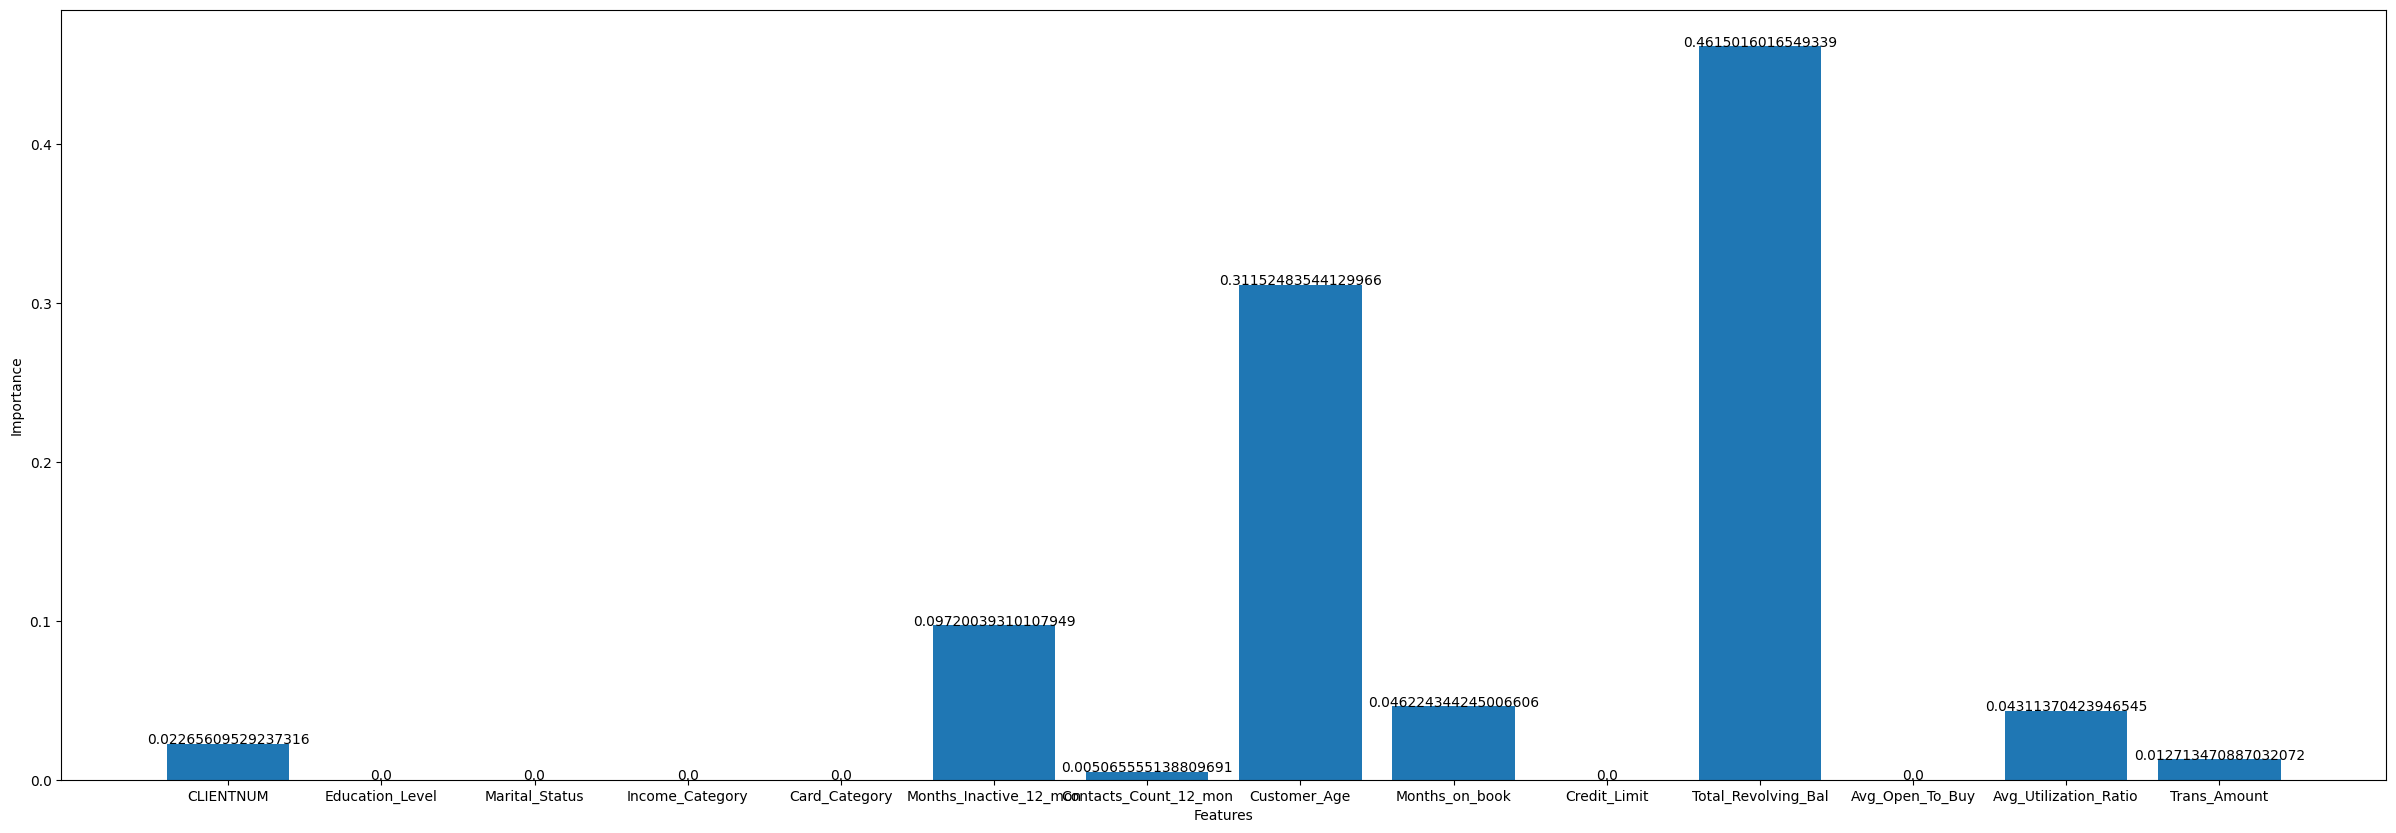

In [ ]:
Feature_importance(best_model_dt,X_train_rus, Y_train_rus)

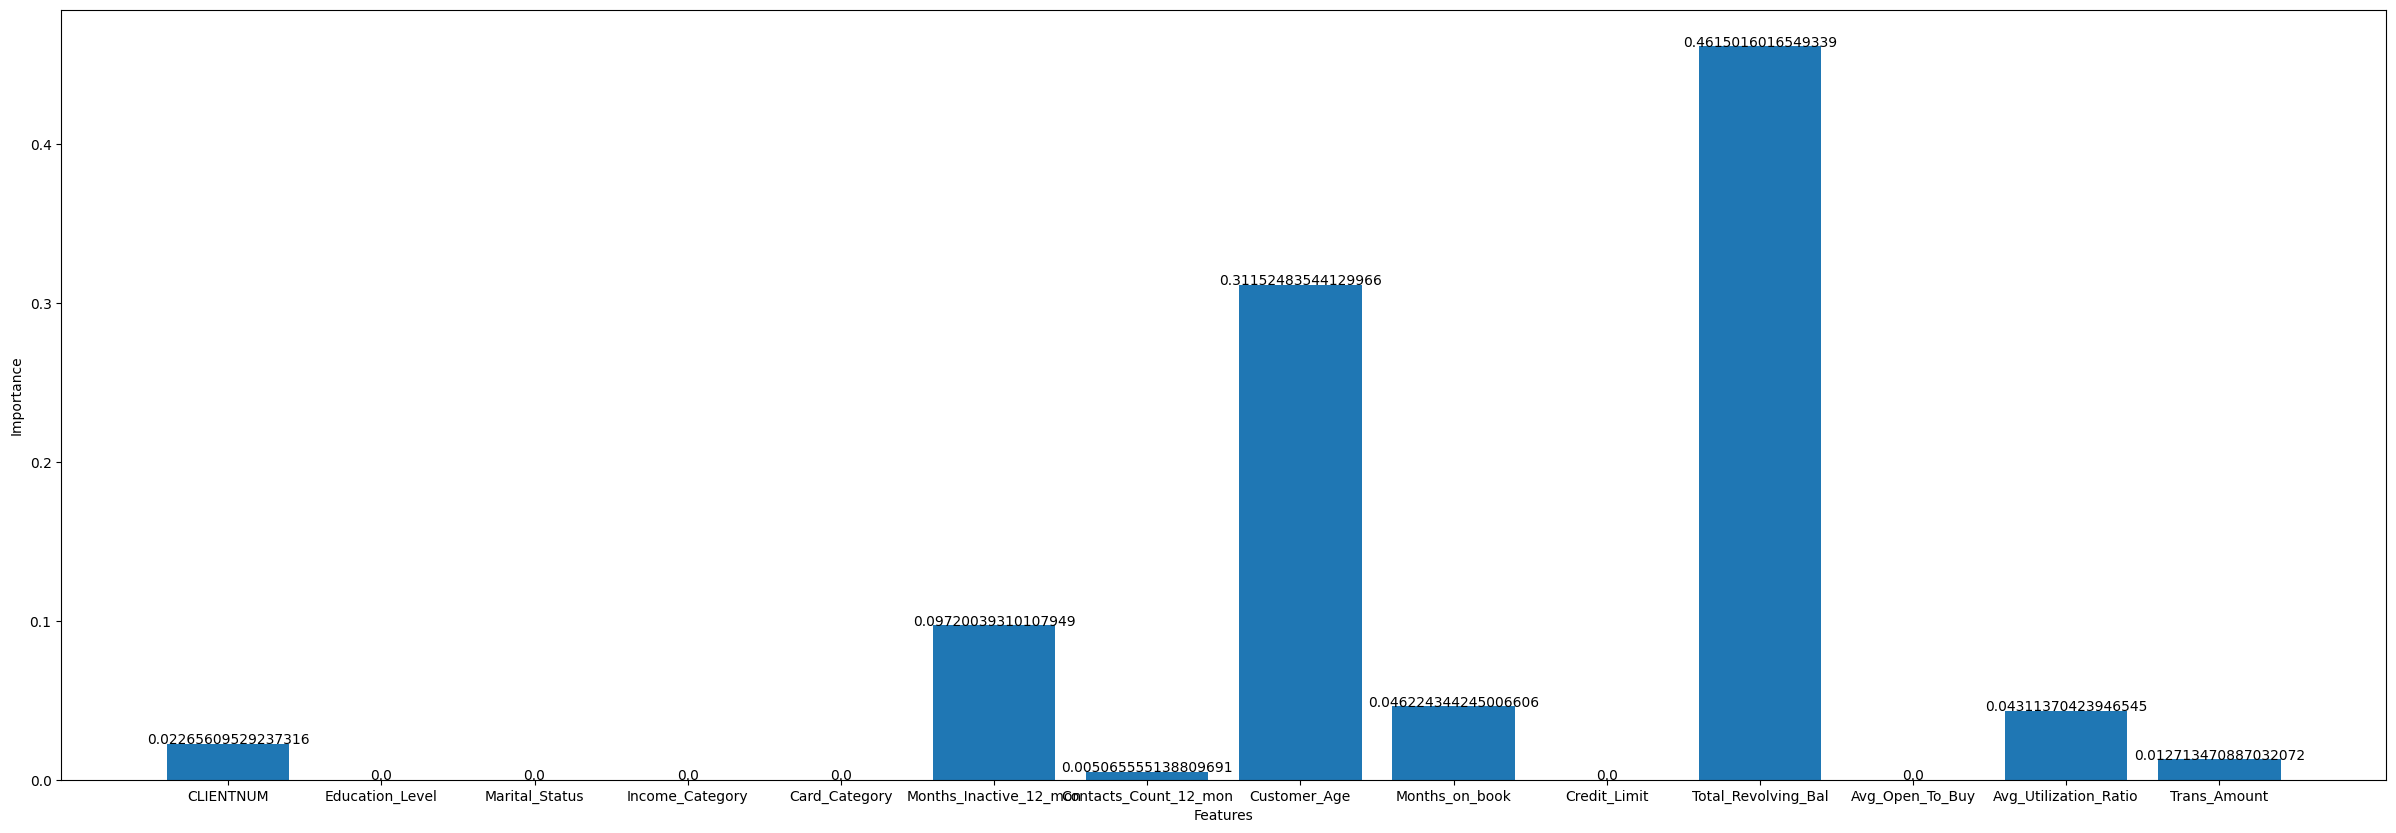

In [ ]:
Feature_importance(best_model_rf,X_train_rus, Y_train_rus)

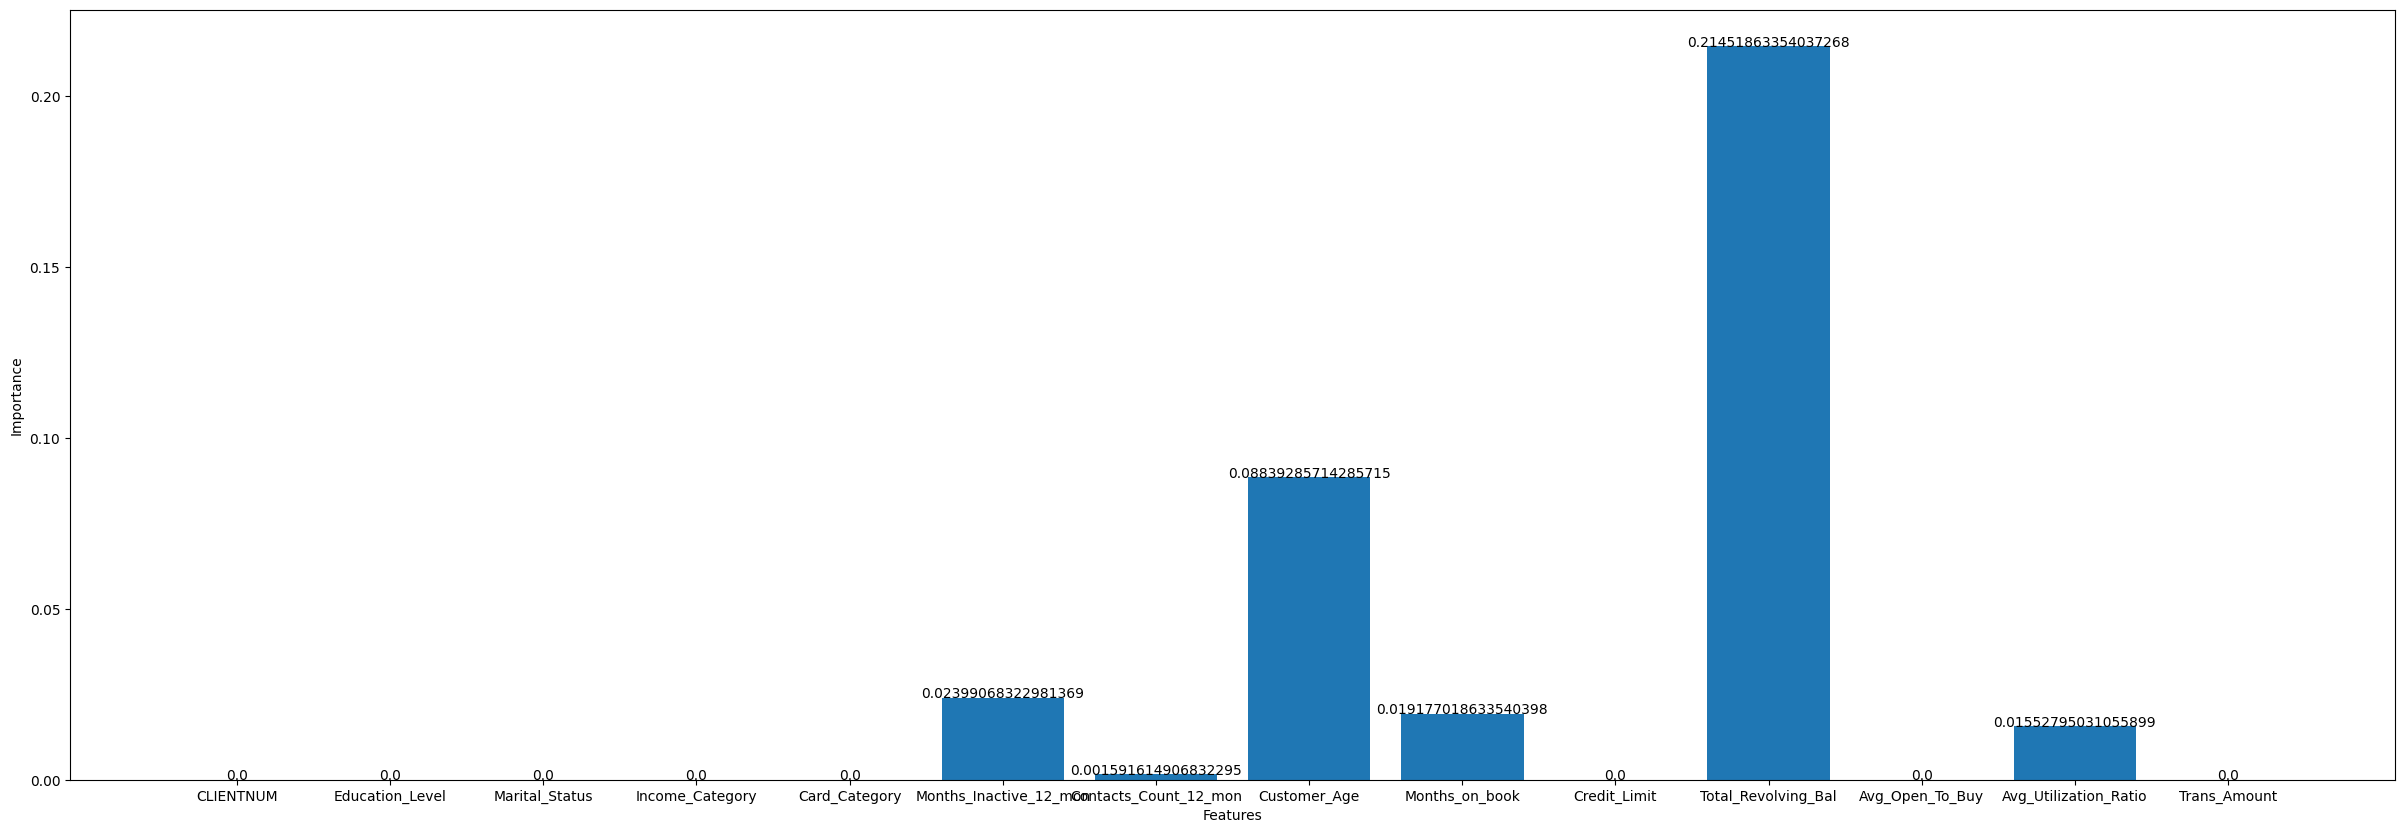

In [ ]:
Permutation_importance(best_model_dt,X_train_rus, Y_train_rus)

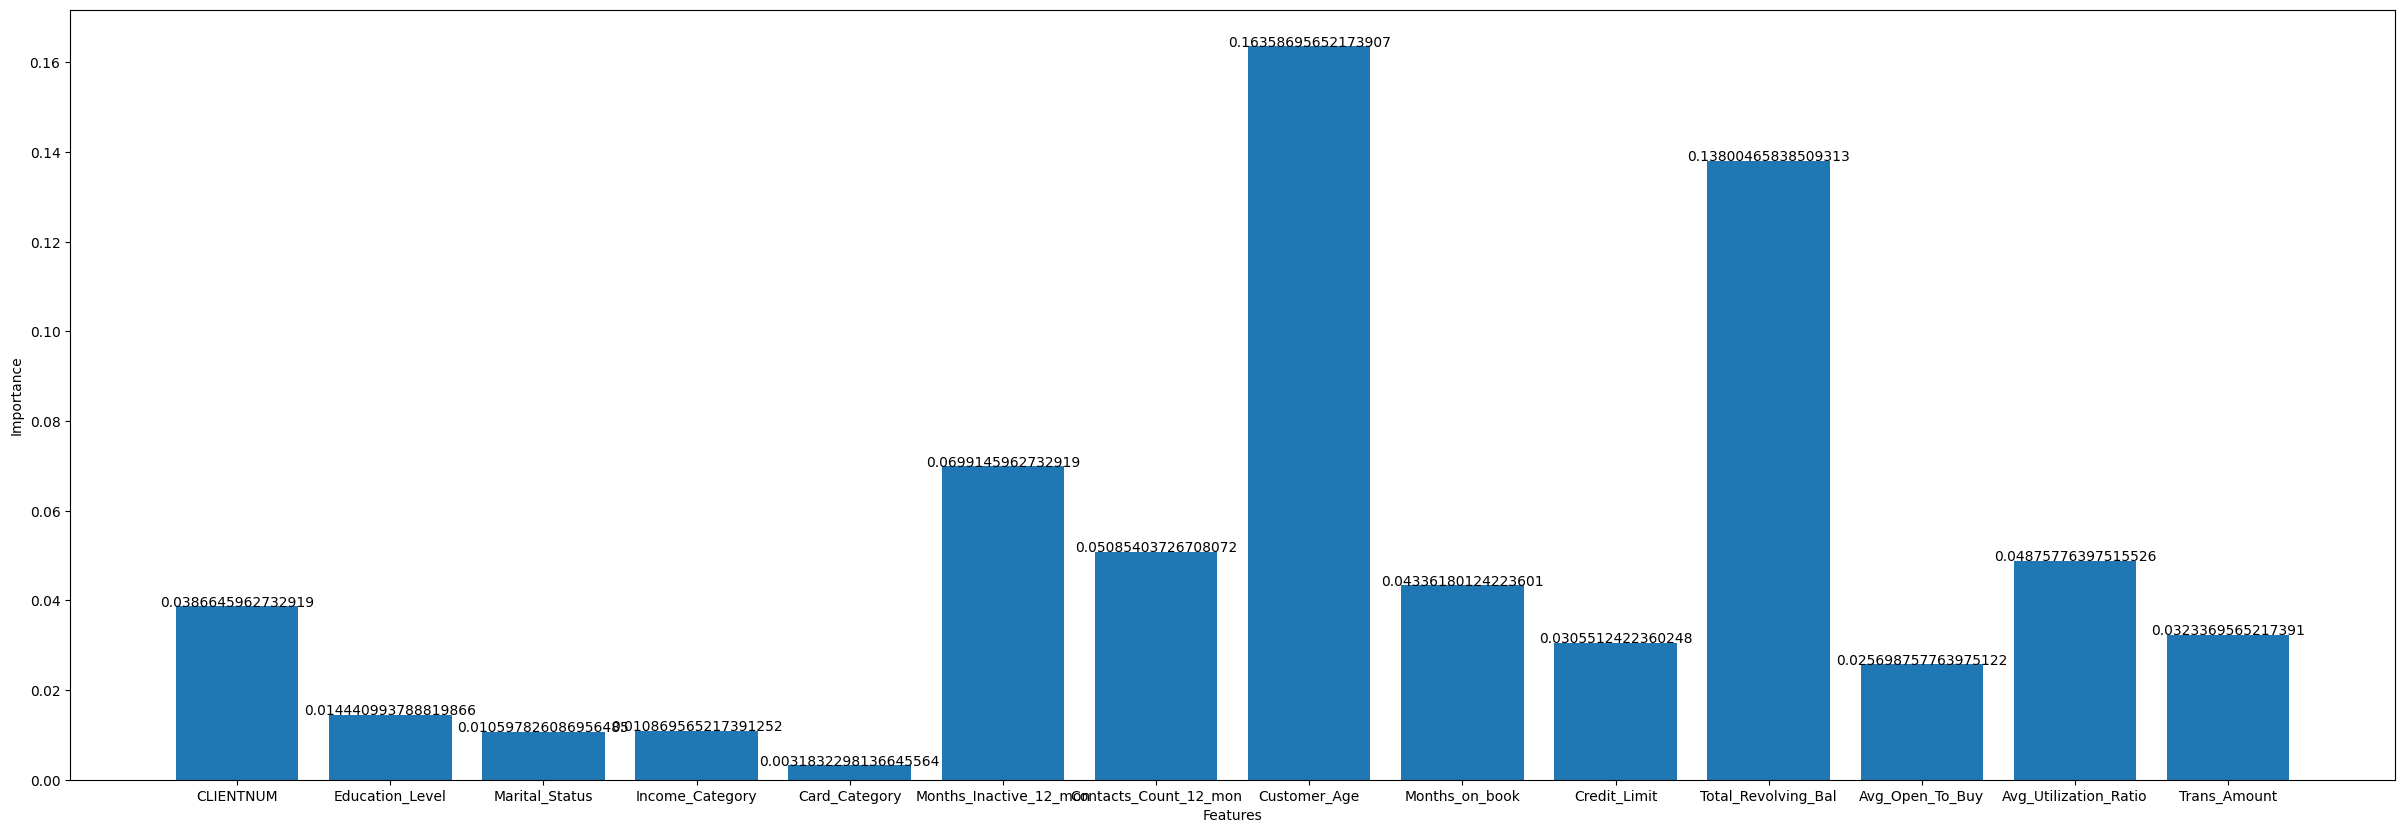

In [ ]:
Permutation_importance(best_model_rf,X_train_rus, Y_train_rus)

##Conclusion

We can conclude that the features that influence the model most are:
1. Total Revolving Balance
2. Customer Age
3. Months Inactive
4. Months on book

This shows that our hypotheses are generally correct, with the exception of Trans_Amount being lower than what we expected.

These are the 4 factors that are most influential factor indicated by permutation importance:

1. Customer Age
2. Total Revolving Balance
3. Months Inactive
4. Months on book


# Machine Learning (RandomForest, Decision Tree)

Decision Tree Function (With Confusion Matrix and Decision Tree)

In [ ]:
def DecisionTree(creditData_dict, best_classifier, predictor_list, response_str = 'Attrition_Flag'):

    ## Extract Datas from creditData_dict
    X_train_rus = creditData_dict["X_train_rus"]
    X_train_rus_perm = pd.DataFrame(X_train_rus[predictor_list])
    Y_train_rus = creditData_dict["Y_train_rus"]
    X_test = creditData_dict["X_test"]
    X_test_perm = pd.DataFrame(X_test[predictor_list])
    Y_test = creditData_dict["Y_test"]

    # INPUT PARAMETERS HERE
    dectree = best_classifier
    dectree.fit(X_train_rus, Y_train_rus)
    Y_train_pred = dectree.predict(X_train_rus)
    Y_test_pred = dectree.predict(X_test)

    ## Print Classification Accuracies
    print("---------------------------------------------------")
    print("Predictor: \t", str(predictor_list))
    print("Response: \t", str(response_str))
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t\n:", dectree.score(X_train_rus, Y_train_rus))

    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t\n:", dectree.score(X_test, Y_test))
    print("---------------------------------------------------")

    ## Heatmap
    f, axes = plt.subplots(1, 2, figsize = (15,6))
    sb.heatmap(confusion_matrix(Y_train_rus, Y_train_pred), annot = True, fmt = '.0f', annot_kws = {'size': 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), annot = True, fmt = '.0f', annot_kws = {'size': 18}, ax = axes[1])

    ## Decision Tree
    f, axes = plt.subplots(1, 1, figsize = (16,12))
    plot_tree(dectree, filled = True, rounded = True, feature_names = X_train_rus.columns.to_list(), class_names = ["Attrited Customer", "Existing Customer"])
    plt.show()

#CALL FUNCTION TEMPLATE
#edit predictor_list with all relevant variables
#DecisionTree(creditData_dict, best_classifier_dt, ['Avg_Utilization_Ratio'], 'Attrition_Flag')

Random Forest Function (with Confusion Matrix)

In [ ]:
def RandomForest(creditData_dict, best_classifier, predictor_list, response_str = 'Attrition_Flag'):

    ## Extract Datas from creditData_dict
    X_train_rus = creditData_dict["X_train_rus"]
    X_train_rus_perm = pd.DataFrame(X_train_rus[predictor_list])
    Y_train_rus = creditData_dict["Y_train_rus"]
    X_test = creditData_dict["X_test"]
    X_test_perm = pd.DataFrame(X_test[predictor_list])
    Y_test = creditData_dict["Y_test"]

    ## INPUT PARAMETERS HERE
    RFClass = best_classifier
    RFClass.fit(X_train_rus, Y_train_rus)
    Y_train_pred = RFClass.predict(X_train_rus)
    Y_test_pred = RFClass.predict(X_test)

    ## Print Classification Accuracies
    print("---------------------------------------------------")
    print("Predictor: \t", str(predictor_list))
    print("Response: \t", str(response_str))
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t\n:", RFClass.score(X_train_rus, Y_train_rus))

    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t\n:", RFClass.score(X_test, Y_test))
    print("---------------------------------------------------")

    ## Heatmap
    f, axes = plt.subplots(1, 2, figsize = (15,6))
    sb.heatmap(confusion_matrix(Y_train_rus, Y_train_pred), annot = True, fmt = '.0f', annot_kws = {'size': 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), annot = True, fmt = '.0f', annot_kws = {'size': 18}, ax = axes[1])

#CALL FUNCTION TEMPLATE
#edit predictor_list with all relevant variables
#RandomForest(creditData_dict, best_classifier_forest, ['Avg_Utilization_Ratio'], 'Attrition_Flag')

Decision Tree & Random Forest Model comparison
(after Hyperparameter Tuning, Cross Validation, and Feature Importance)

---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.8133179368745188
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.8139190523198421
---------------------------------------------------


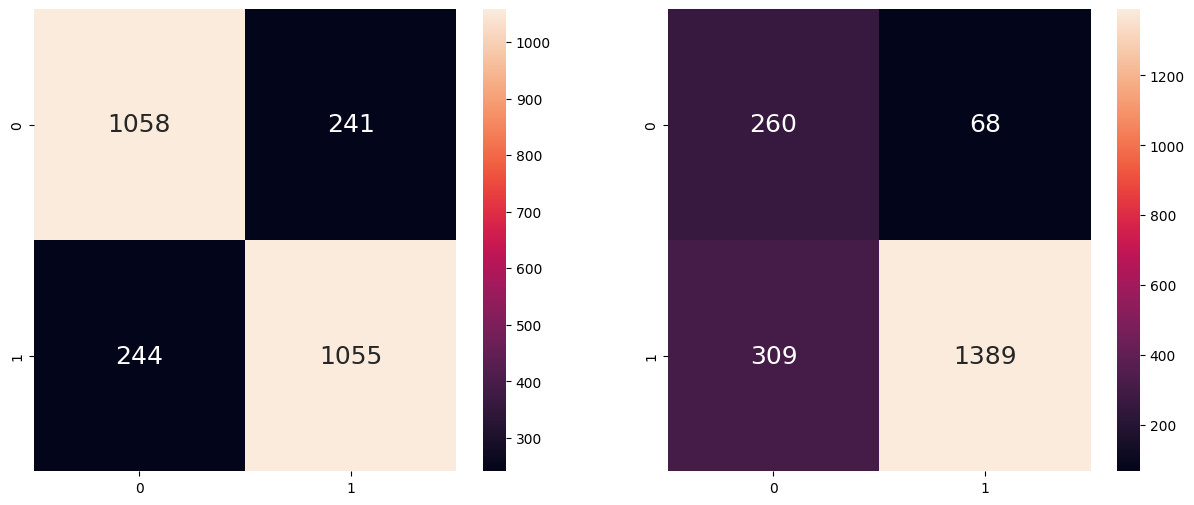

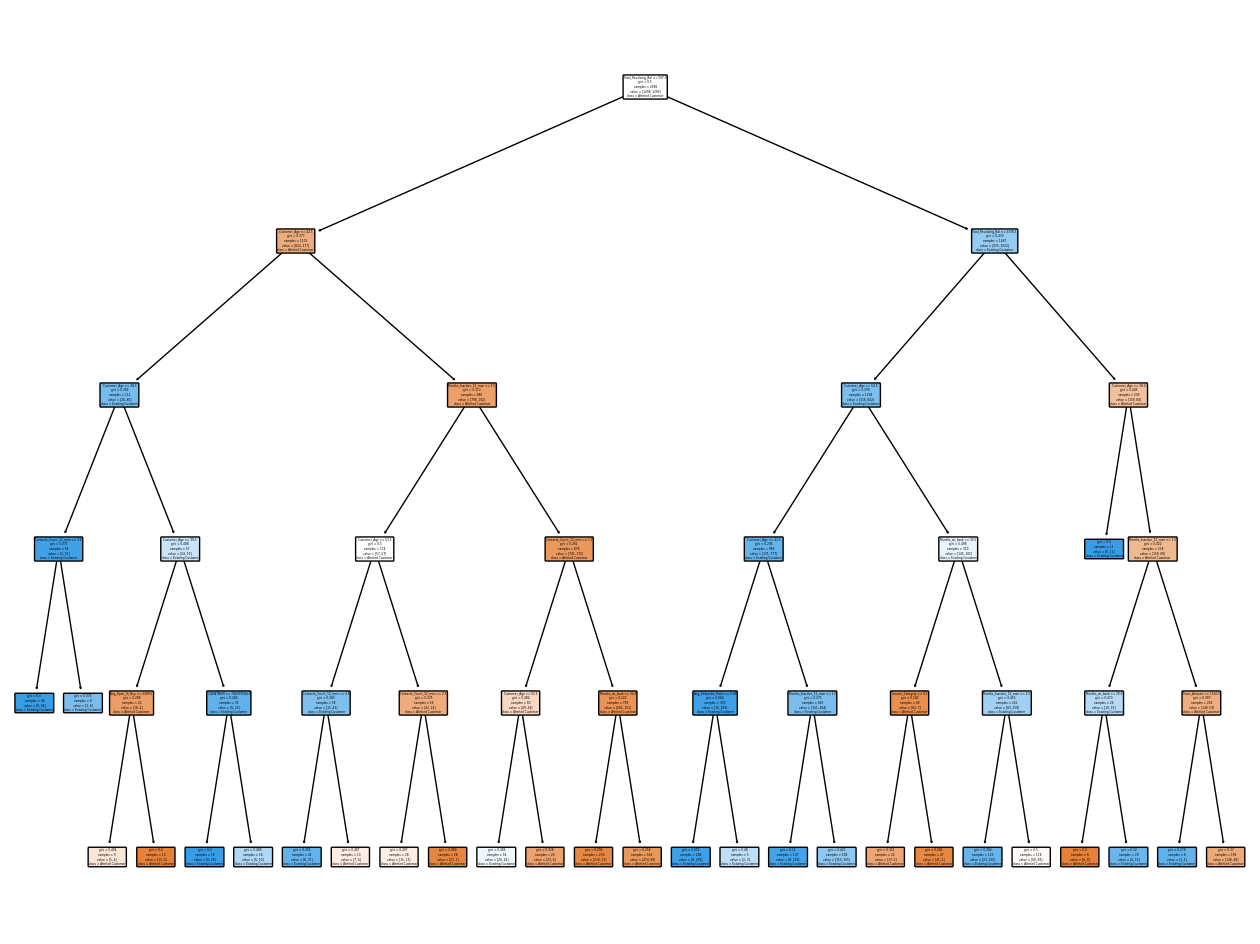

In [ ]:
DecisionTree(creditData_dict, best_classifier_dt, ['Customer_Age', 'Months_Inactive_12_mon','Months_on_book', 'Total_Revolving_Bal'], 'Attrition_Flag')

<ipython-input-32-0df5bcb9ef89>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFClass.fit(X_train_rus, Y_train_rus)


---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.8999230177059276
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.8371174728529122
---------------------------------------------------


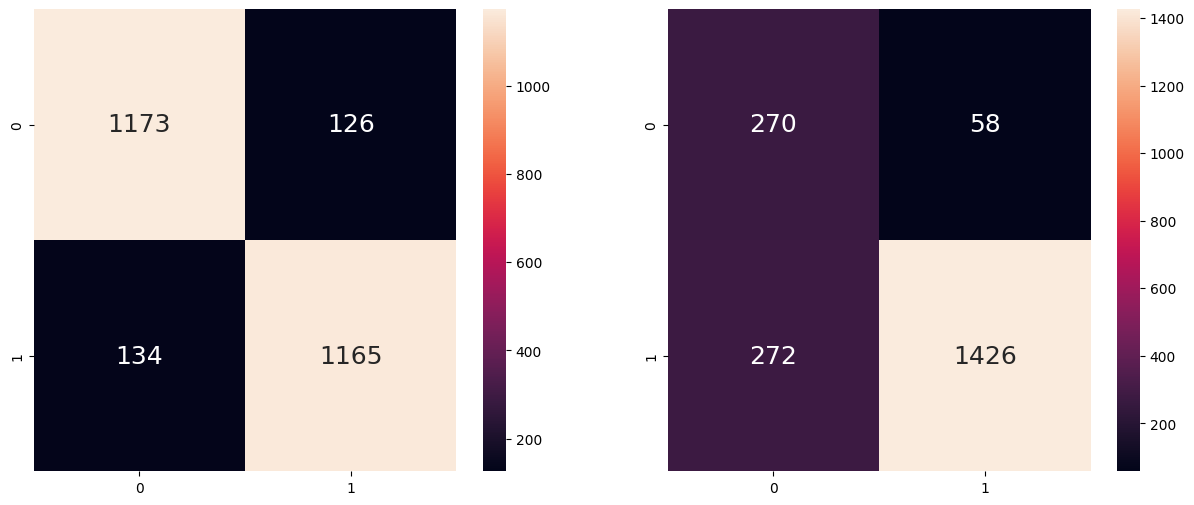

In [ ]:
RandomForest(creditData_dict, best_classifier_forest, ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal'], 'Attrition_Flag')

---------------------------------------------------
Predictor: 	 ['Total_Revolving_Bal', 'Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.8133179368745188
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.8139190523198421
---------------------------------------------------


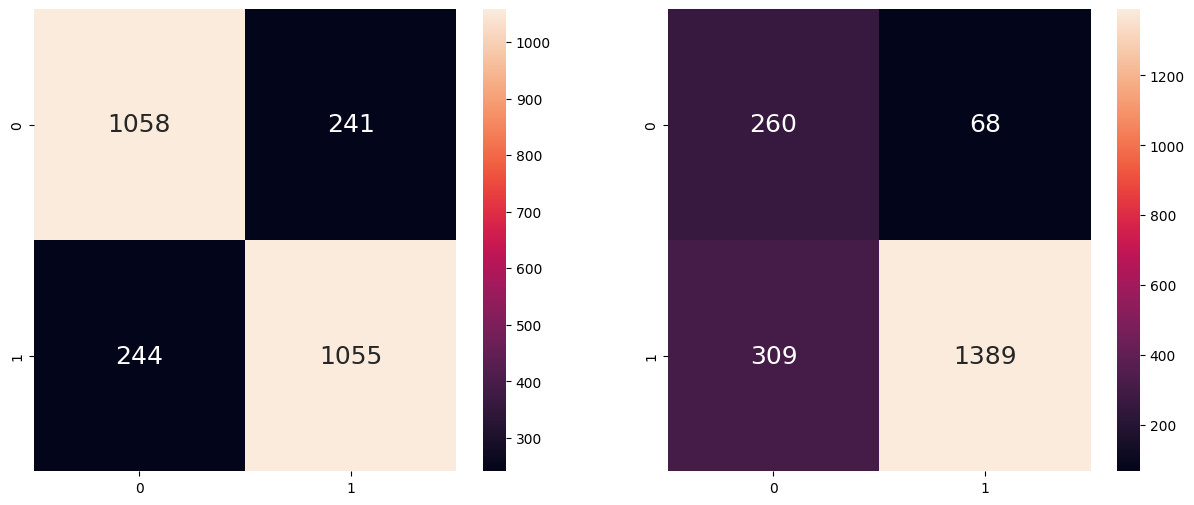

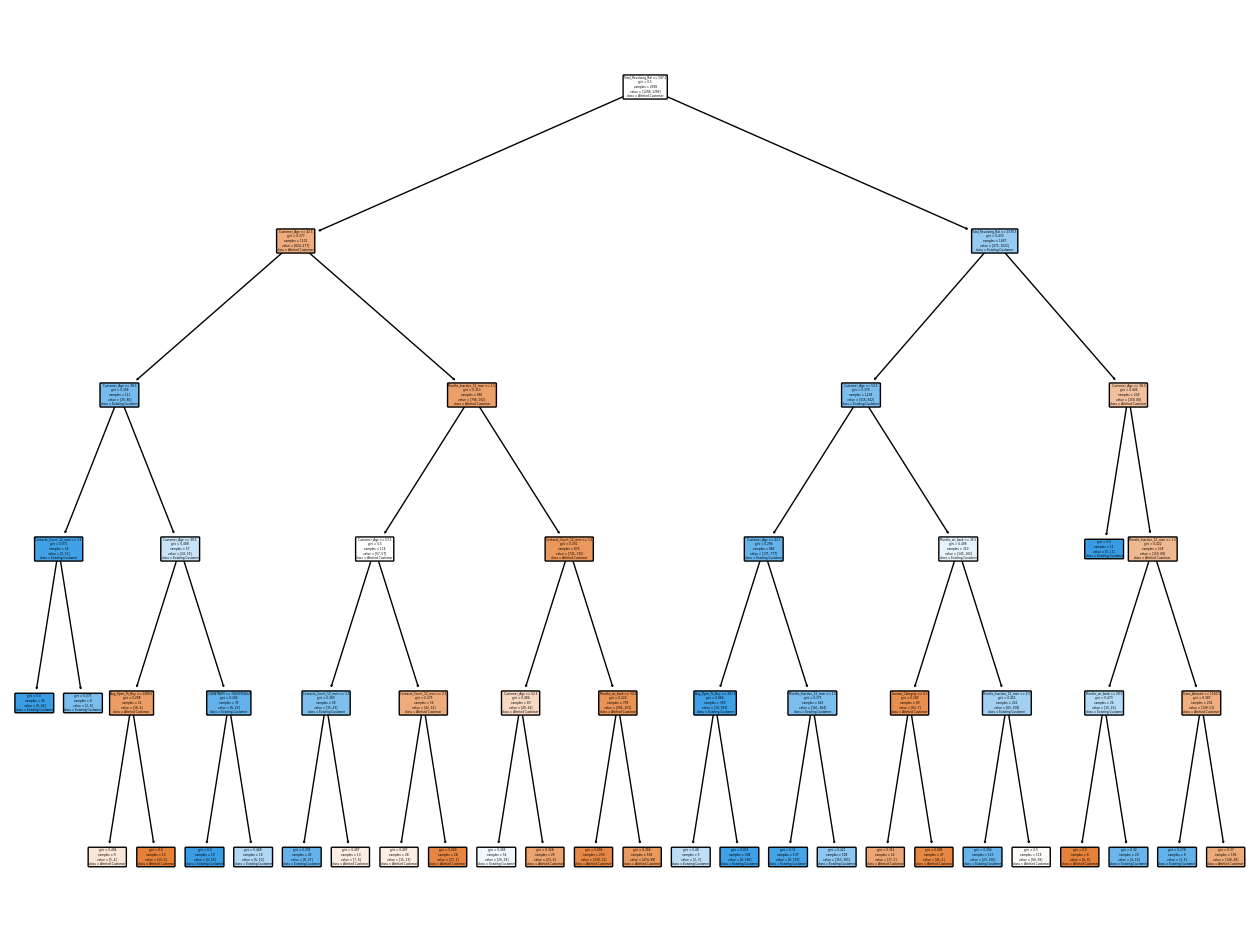

In [ ]:
#Permutation importance
DecisionTree(creditData_dict, best_classifier_dt, ['Total_Revolving_Bal', 'Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book'], 'Attrition_Flag')

<ipython-input-32-0df5bcb9ef89>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFClass.fit(X_train_rus, Y_train_rus)


---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Total_Revolving_Bal', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.9003079291762894
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.8292201382033564
---------------------------------------------------


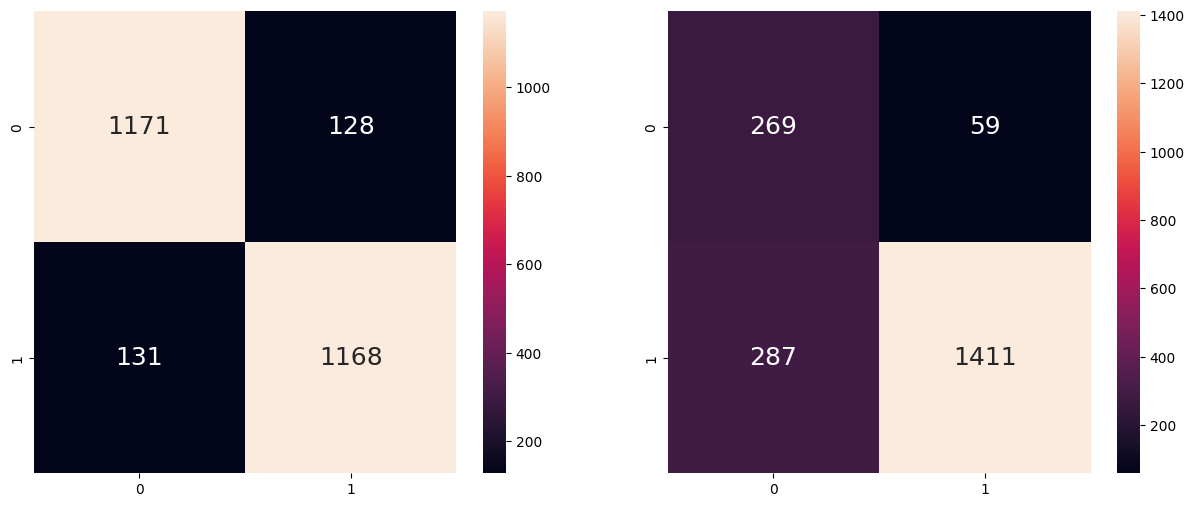

In [ ]:
#Permutation importance
RandomForest(creditData_dict, best_classifier_forest, ['Customer_Age', 'Total_Revolving_Bal', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'], 'Attrition_Flag')

# 2019 Data

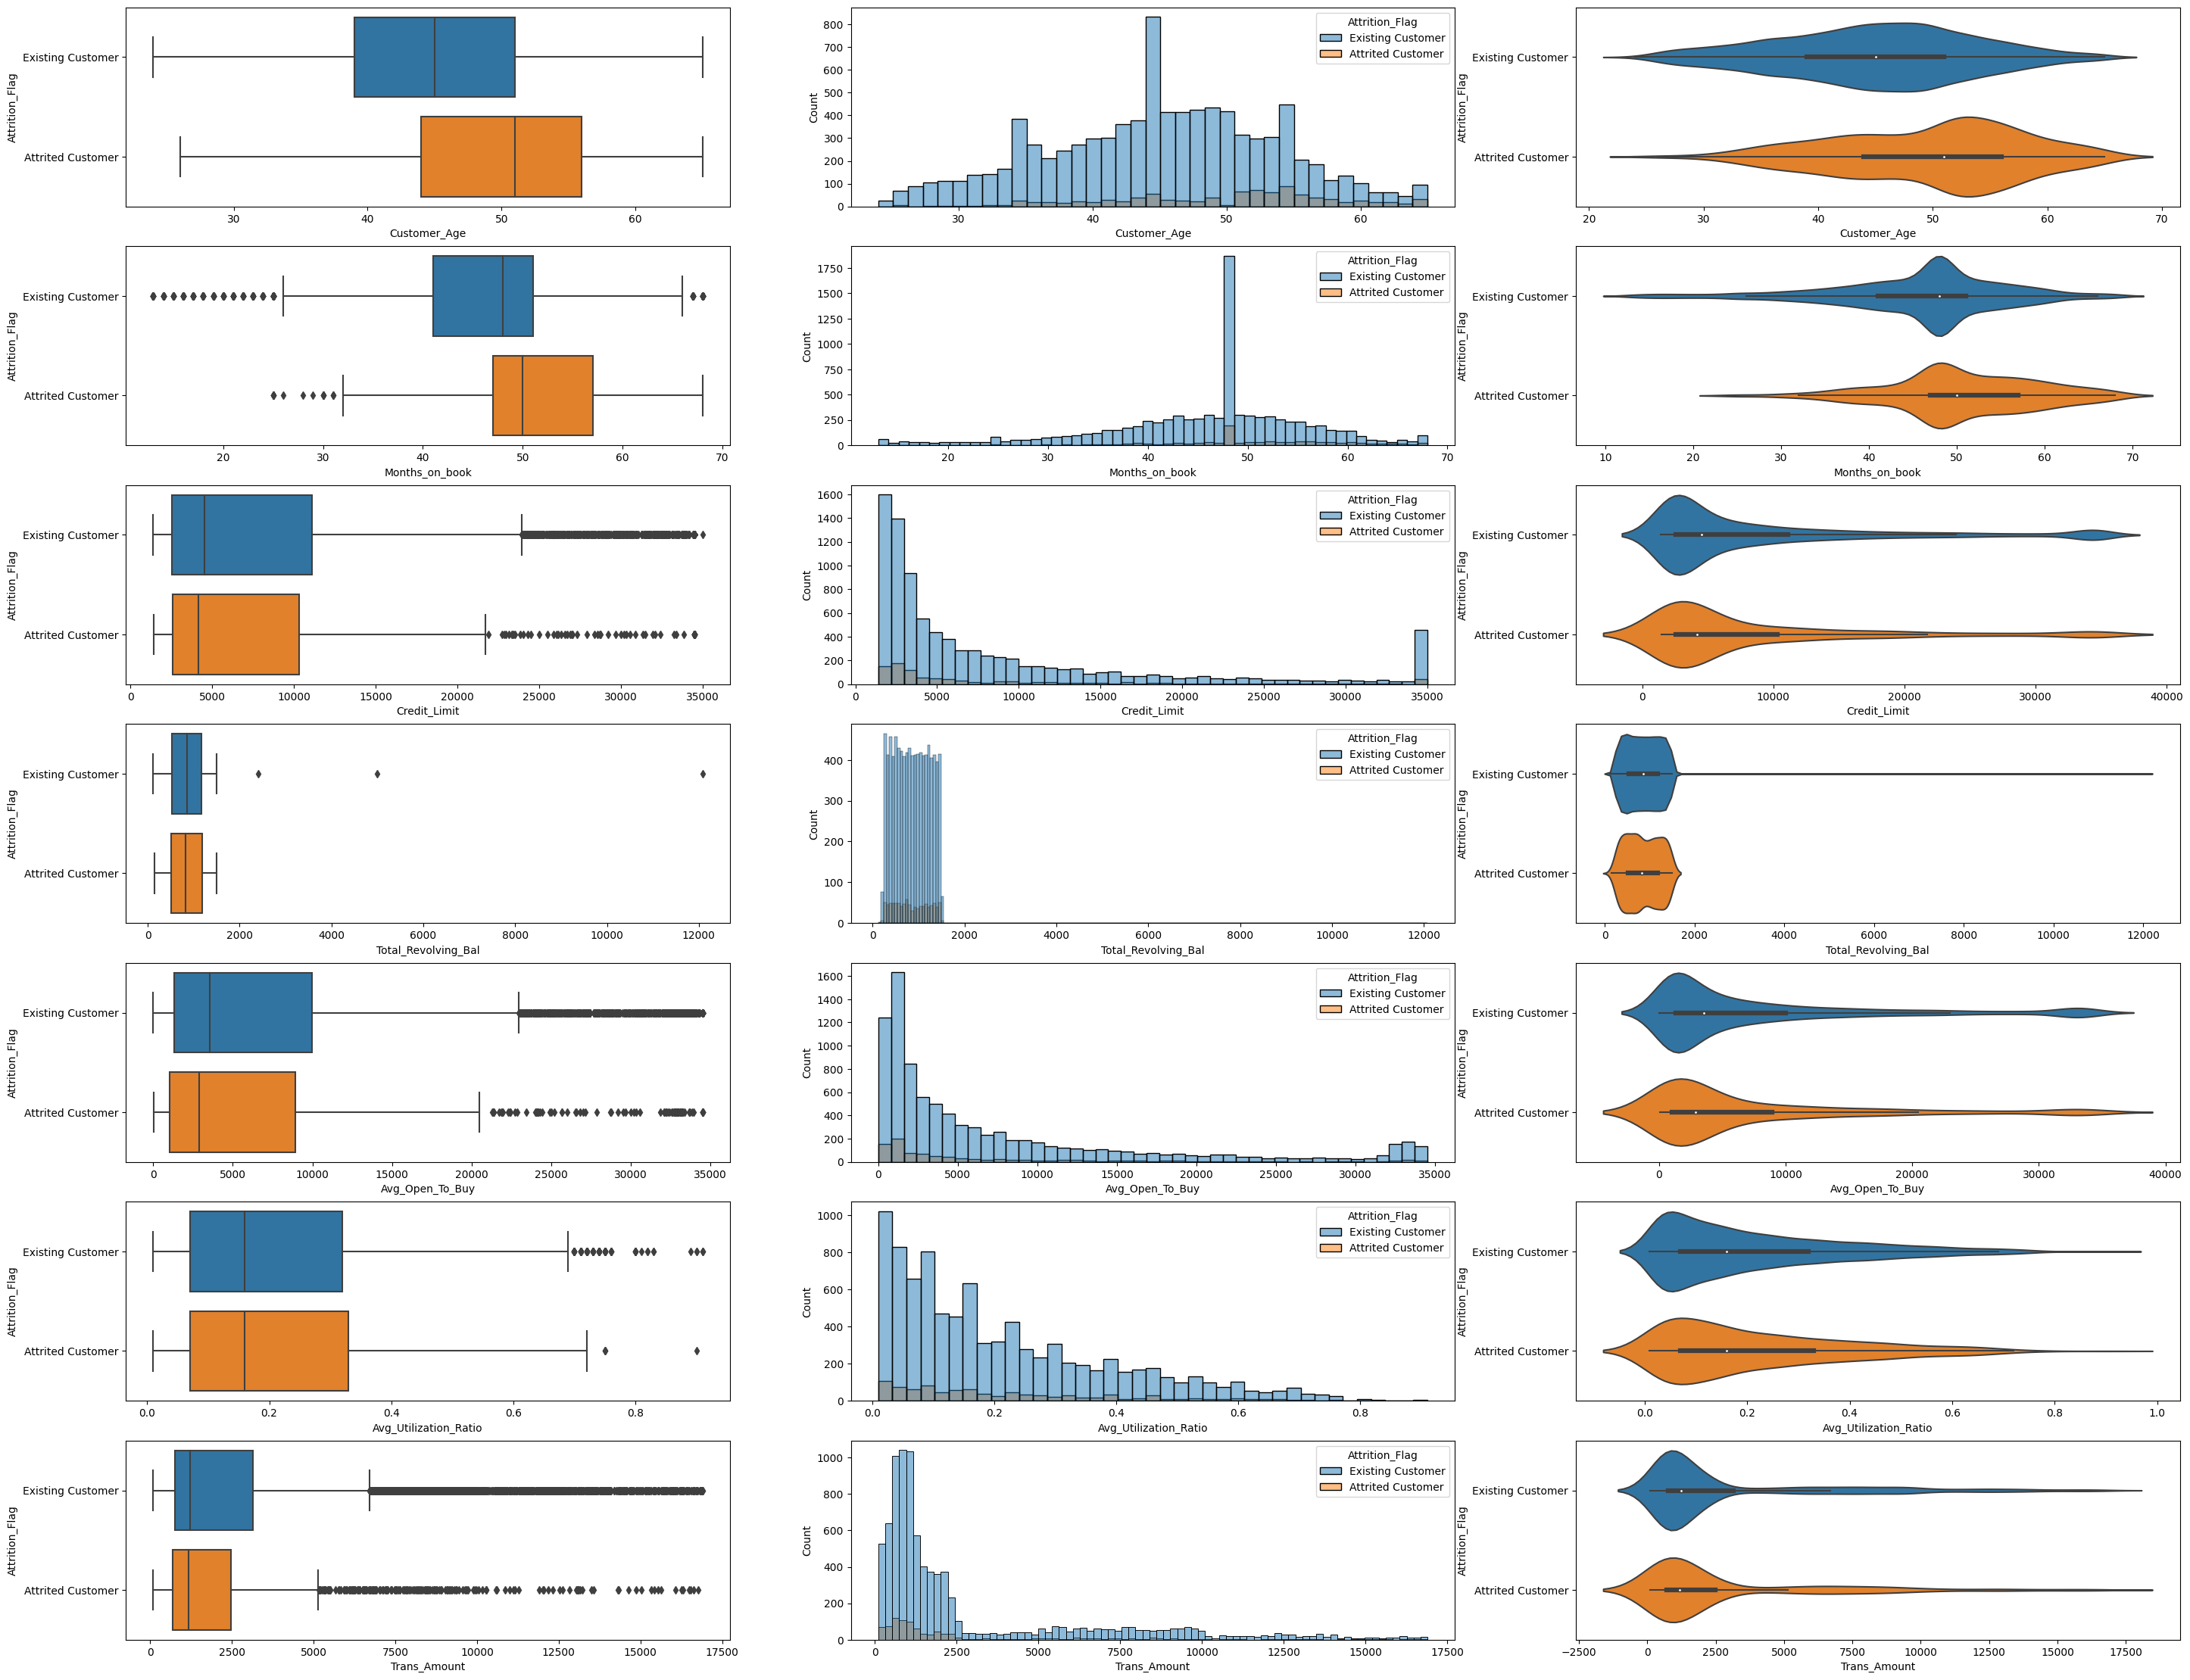

In [ ]:
VisualizationGraphs(merged_df_2019, ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio','Trans_Amount'])

# Balancing Data (2019)

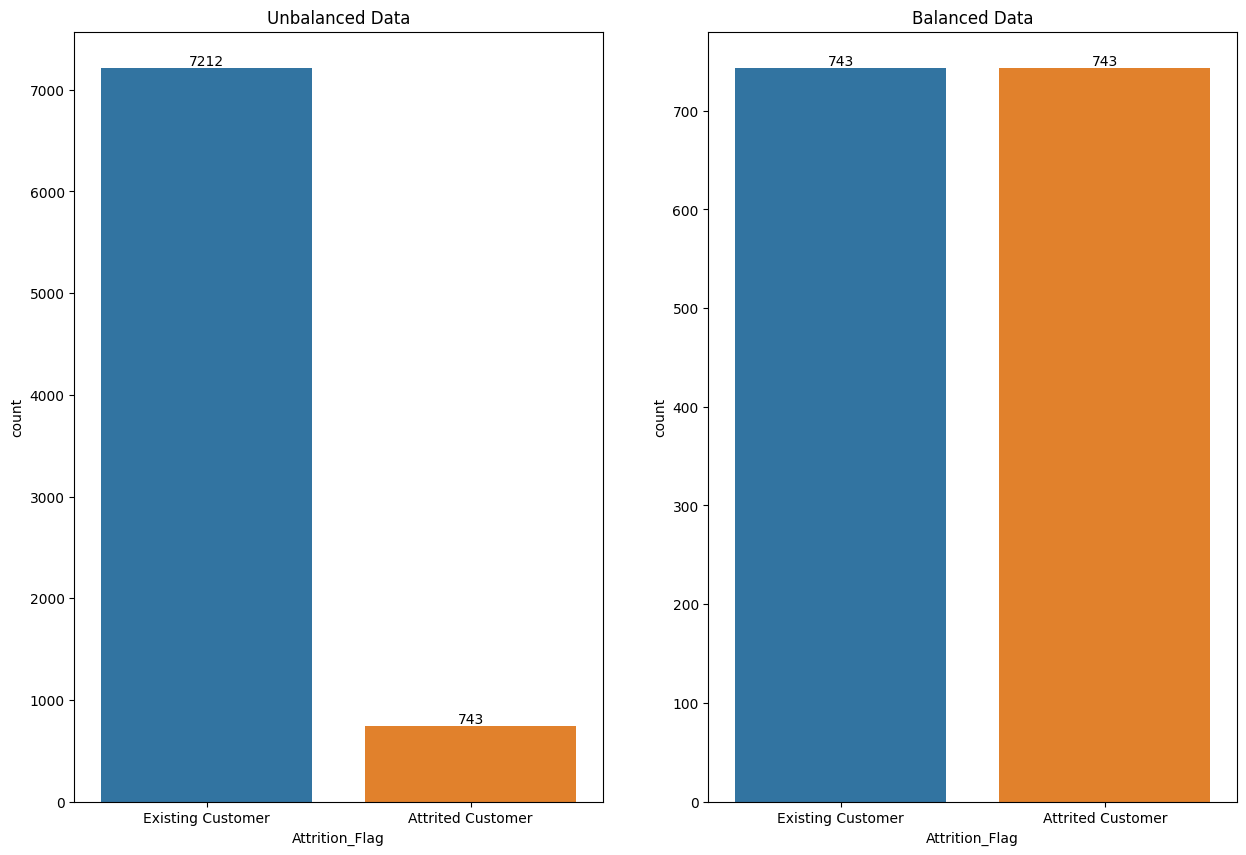

In [ ]:
creditData_dict_2019 = Train_Test_Balance(merged_df_2019, ['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount'], 'Attrition_Flag')

# Hyperparameters Tuning (2019)

In [ ]:
#Train and Test data sets
X_train_rus_2019 = creditData_dict_2019["X_train_rus"]
Y_train_rus_2019 = creditData_dict_2019["Y_train_rus"]
X_test_2019 = creditData_dict_2019["X_test"]
Y_test_2019 = creditData_dict_2019["Y_test"]

In [ ]:
best_classifier_dt_2019, best_params_dt_2019, best_model_dt_2019 = Randomsearchcv_dt_classifier(X_train_rus_2019, Y_train_rus_2019,X_test_2019, Y_test_2019)
print("Best Parameters:", best_params_dt_2019)
print("Best Classifier: ",best_classifier_dt_2019)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross-Validation Scores: [0.62298387 0.61010101 0.63636364]
Mean Accuracy: 0.6231495058107961
Best Parameters: {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
Best Classifier:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


In [ ]:
best_classifier_forest_2019, best_params_forest_2019, best_model_rf_2019 = Randomsearchcv_rf_classifier(X_train_rus_2019, Y_train_rus_2019,X_test_2019, Y_test_2019)
print("Best Parameters:", best_params_forest_2019)
print("Best Classifier: ",best_classifier_forest_2019)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Cross-Validation Scores: [0.64516129 0.6040404  0.61616162]
Mean Accuracy: 0.621787770174867
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best Classifier:  RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)


# Feature Importance (2019)

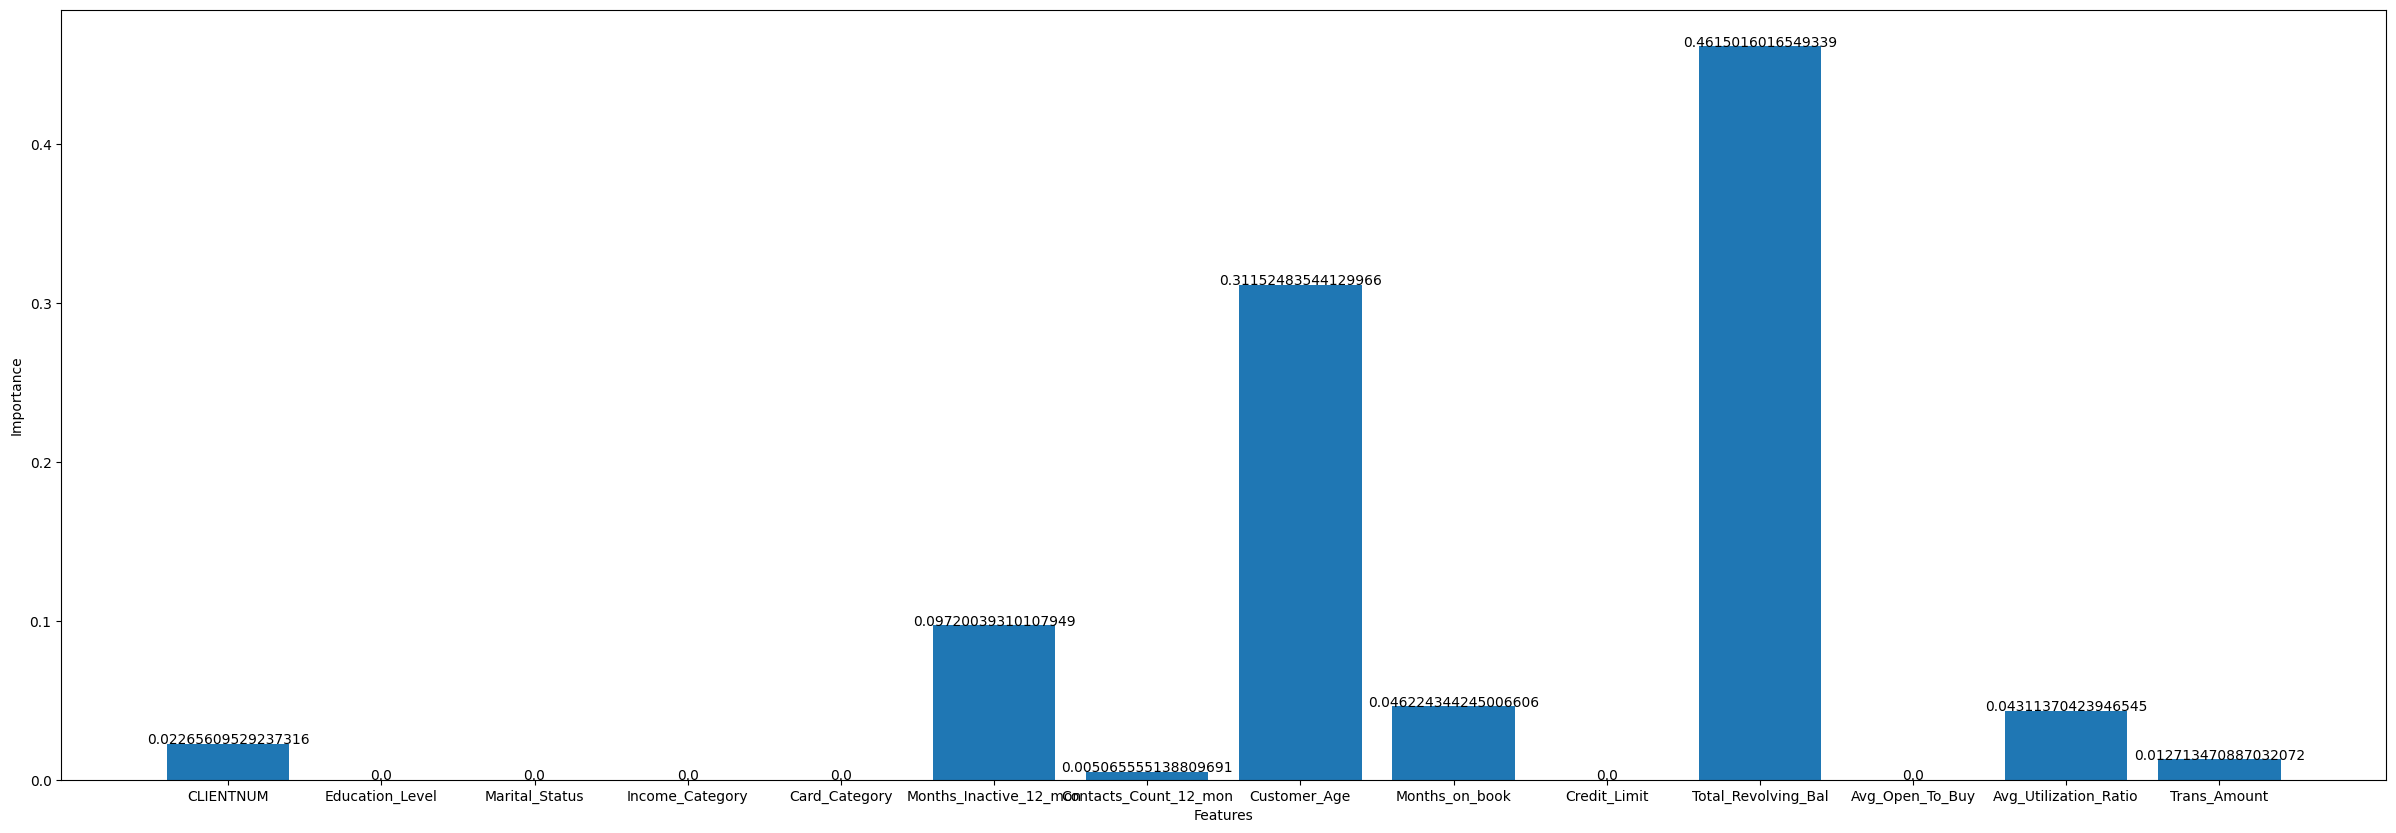

In [ ]:
Feature_importance(best_model_dt_2019,X_train_rus_2019, Y_train_rus_2019)

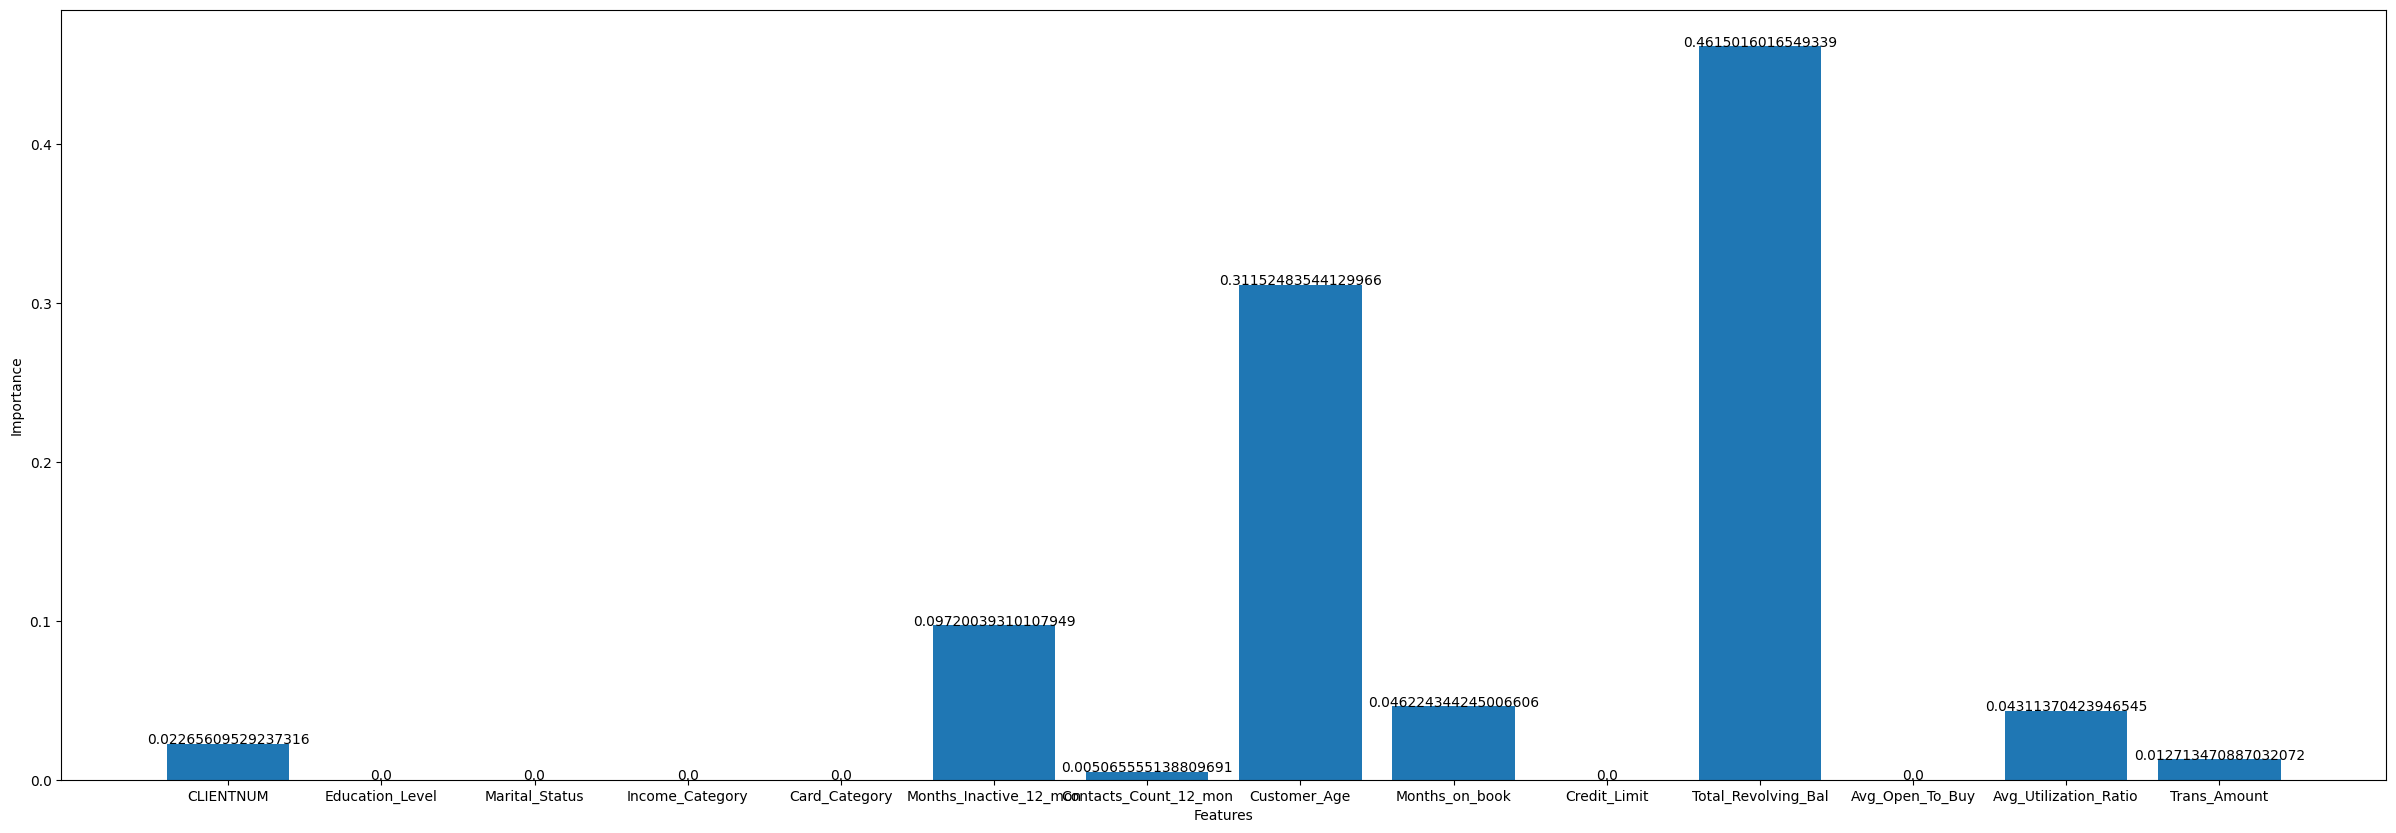

In [ ]:
Feature_importance(best_model_rf_2019,X_train_rus_2019, Y_train_rus_2019)

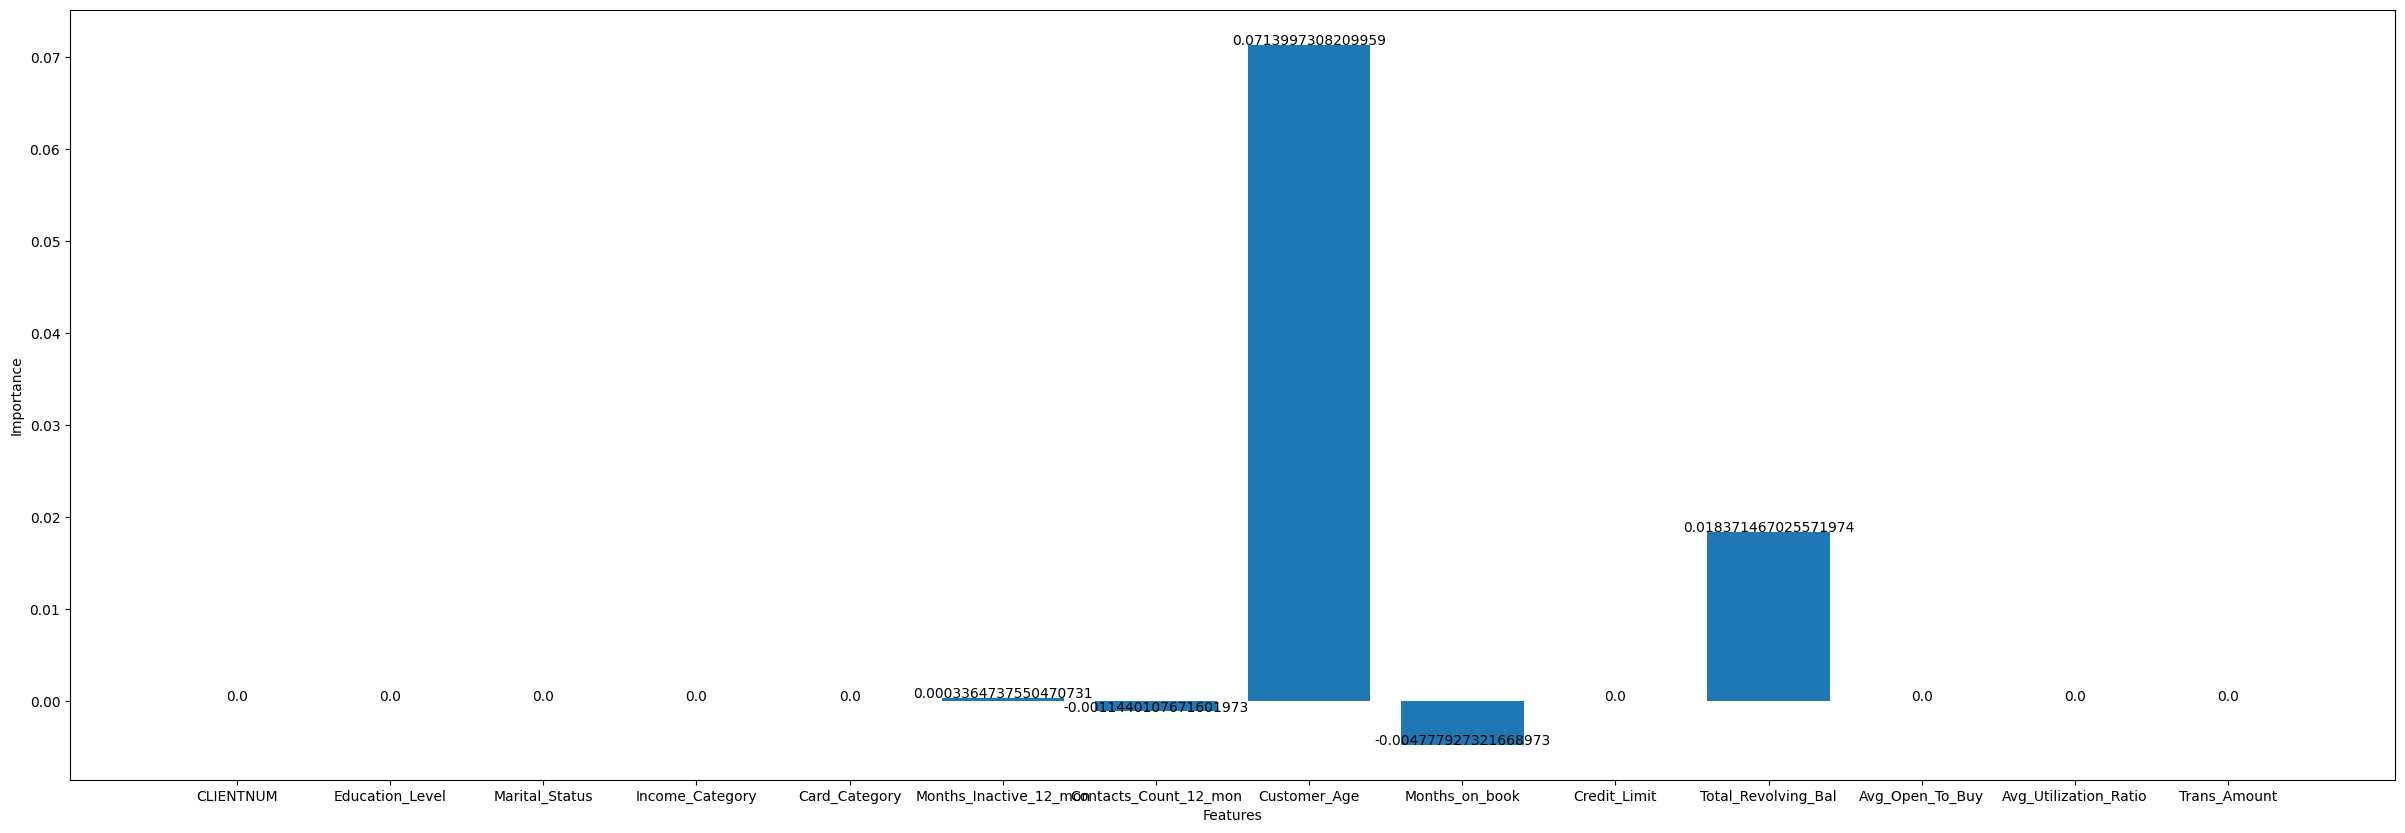

In [ ]:
Permutation_importance(best_model_dt_2019,X_train_rus_2019, Y_train_rus_2019)

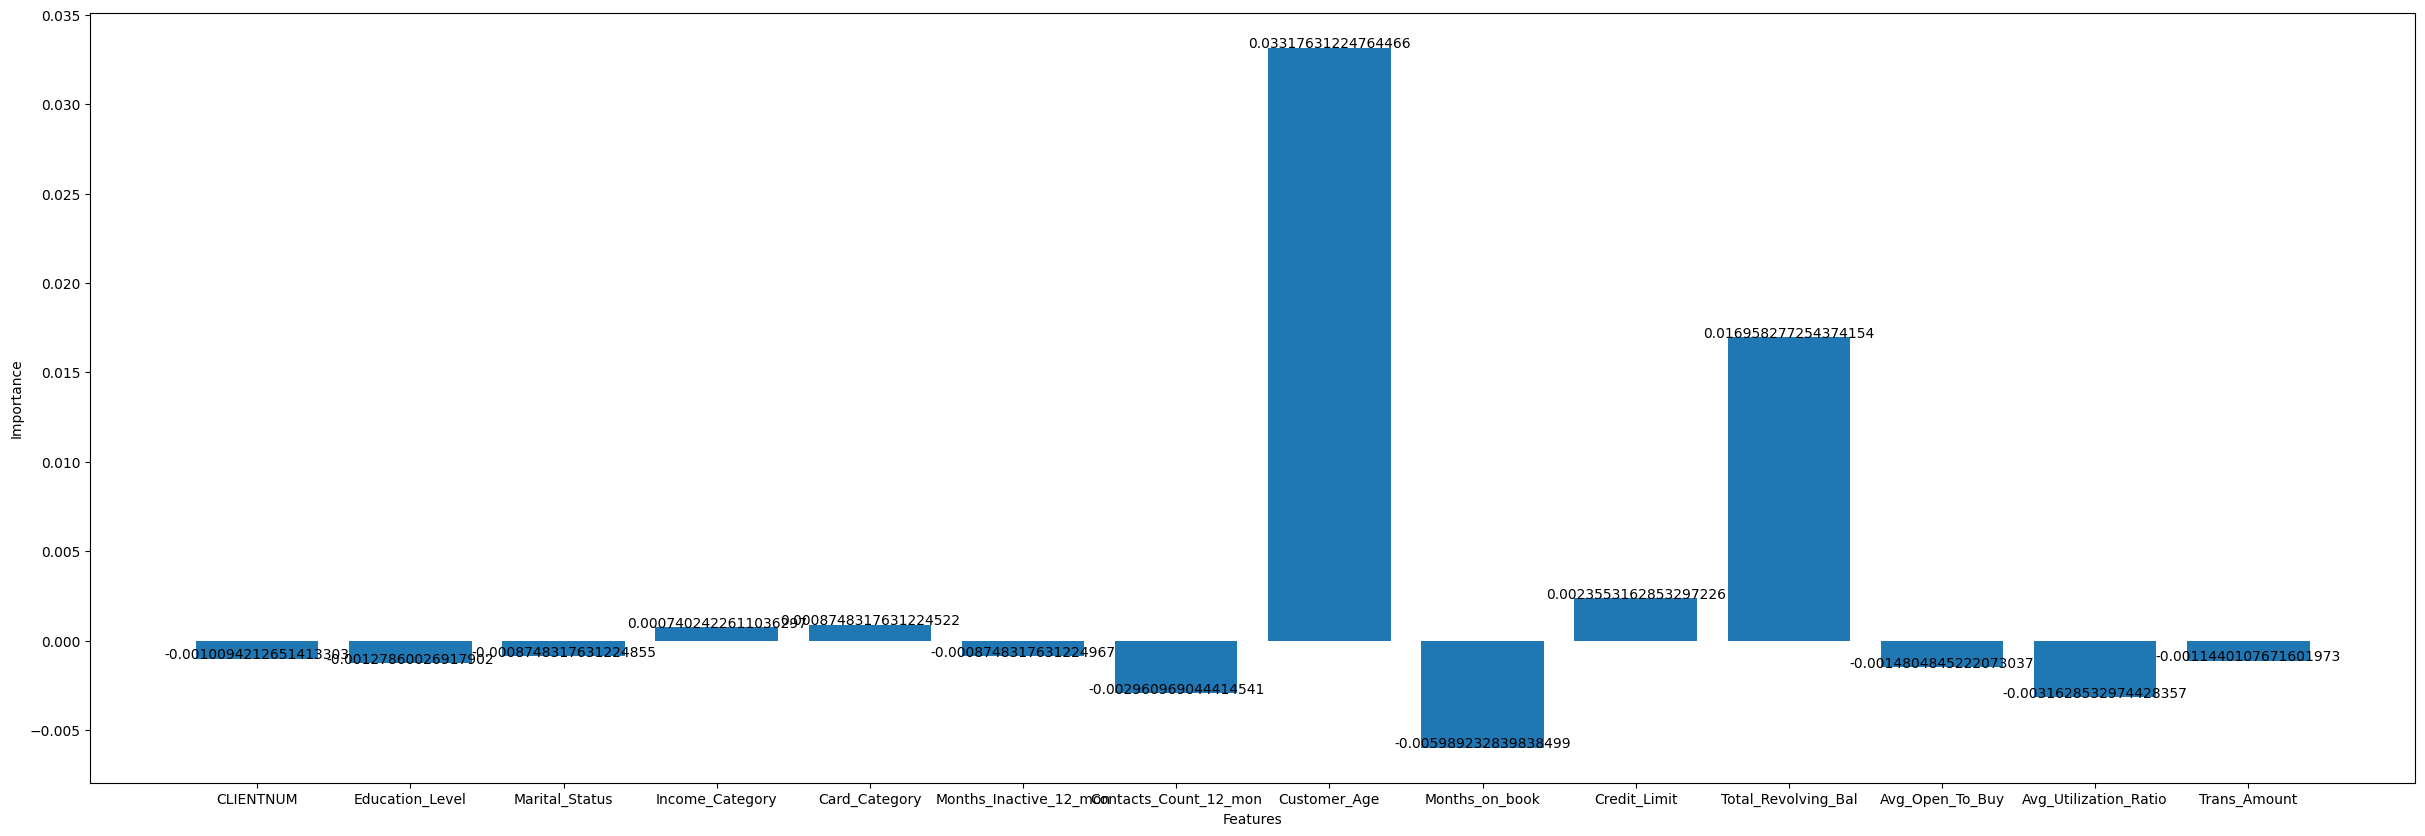

In [ ]:
Permutation_importance(best_model_rf_2019,X_train_rus_2019, Y_train_rus_2019)

# Machine Learning (2019)

---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.6662180349932705
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.7415786827551534
---------------------------------------------------


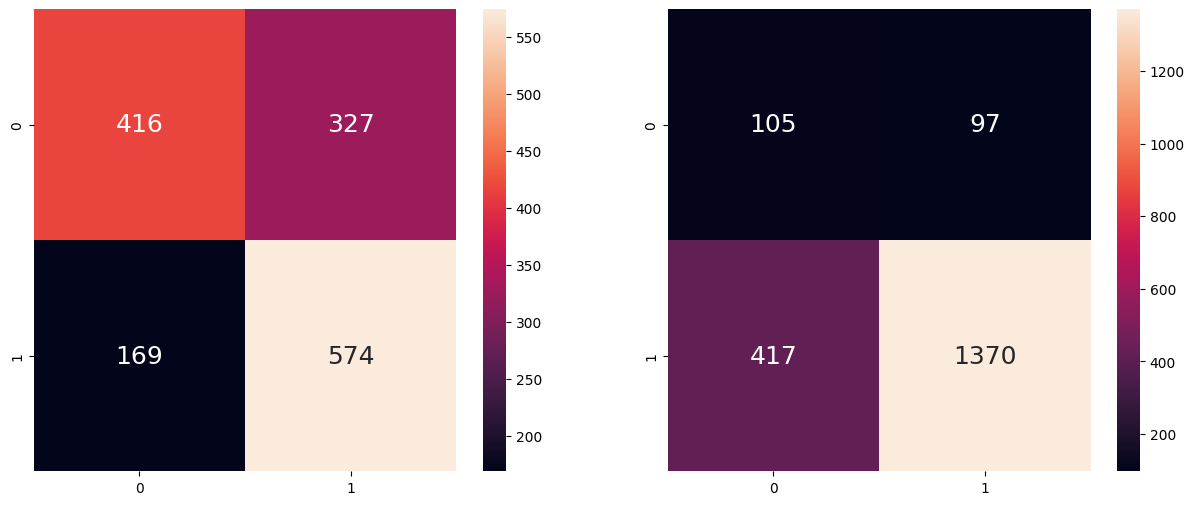

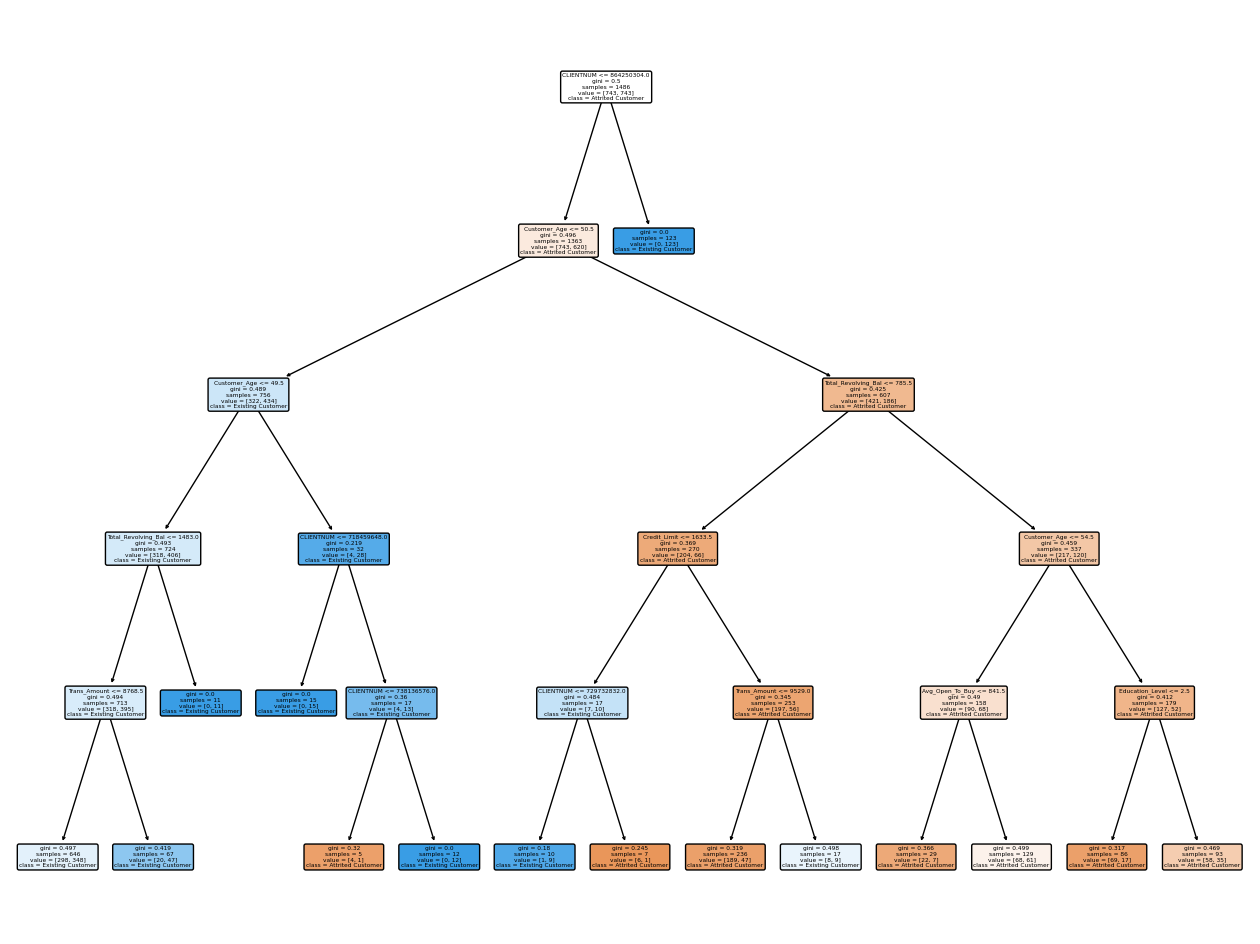

In [ ]:
DecisionTree(creditData_dict_2019, best_classifier_dt_2019, ['Customer_Age', 'Months_Inactive_12_mon','Months_on_book', 'Total_Revolving_Bal'], 'Attrition_Flag')

<ipython-input-32-0df5bcb9ef89>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFClass.fit(X_train_rus, Y_train_rus)


---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.8741588156123823
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.6726998491704375
---------------------------------------------------


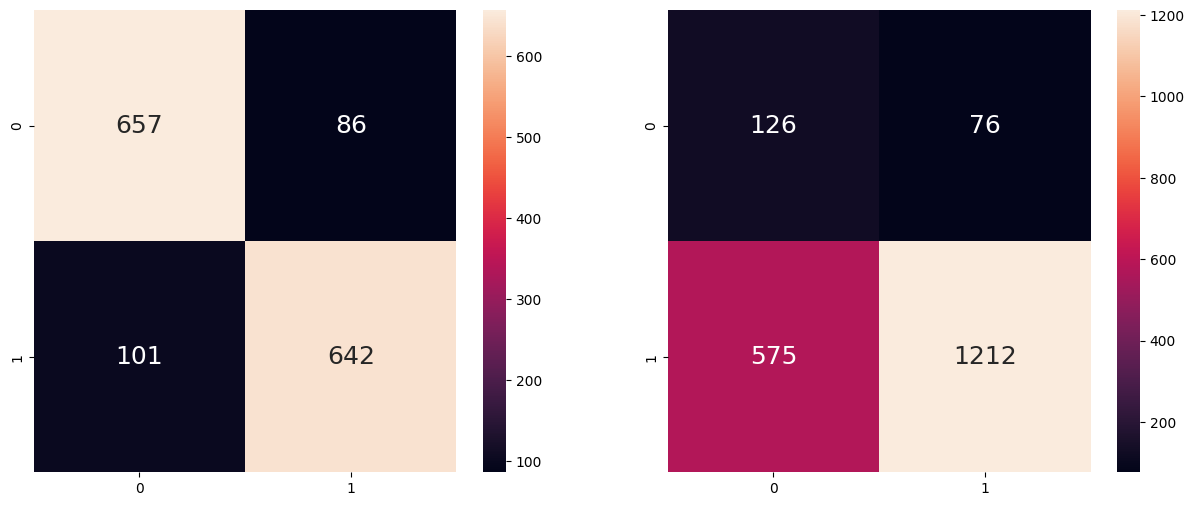

In [ ]:
RandomForest(creditData_dict_2019, best_classifier_forest_2019, ['Customer_Age', 'Months_Inactive_12_mon','Months_on_book', 'Total_Revolving_Bal'], 'Attrition_Flag')

---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Months_on_book']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.6662180349932705
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.7415786827551534
---------------------------------------------------


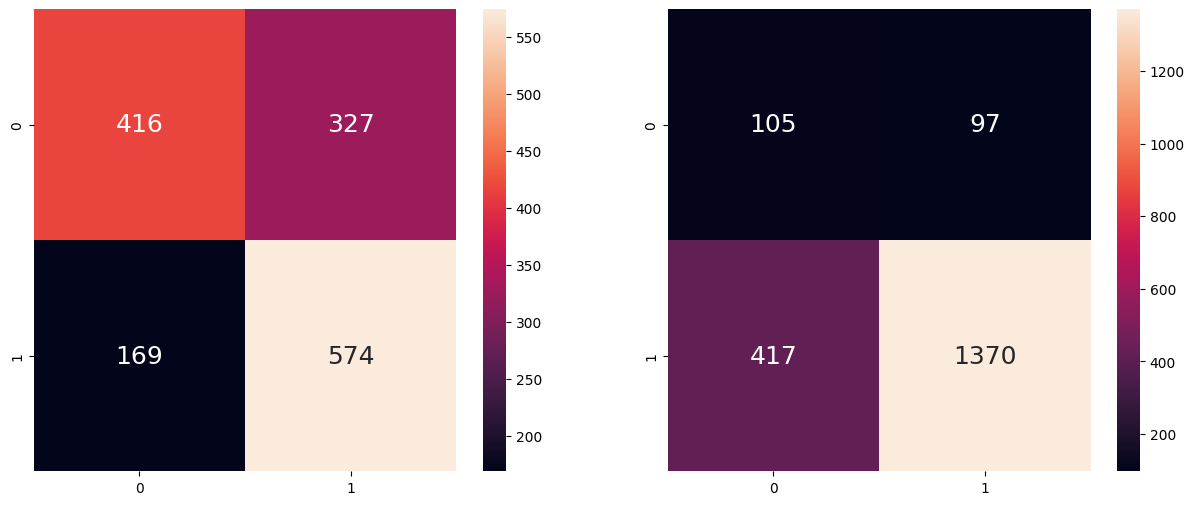

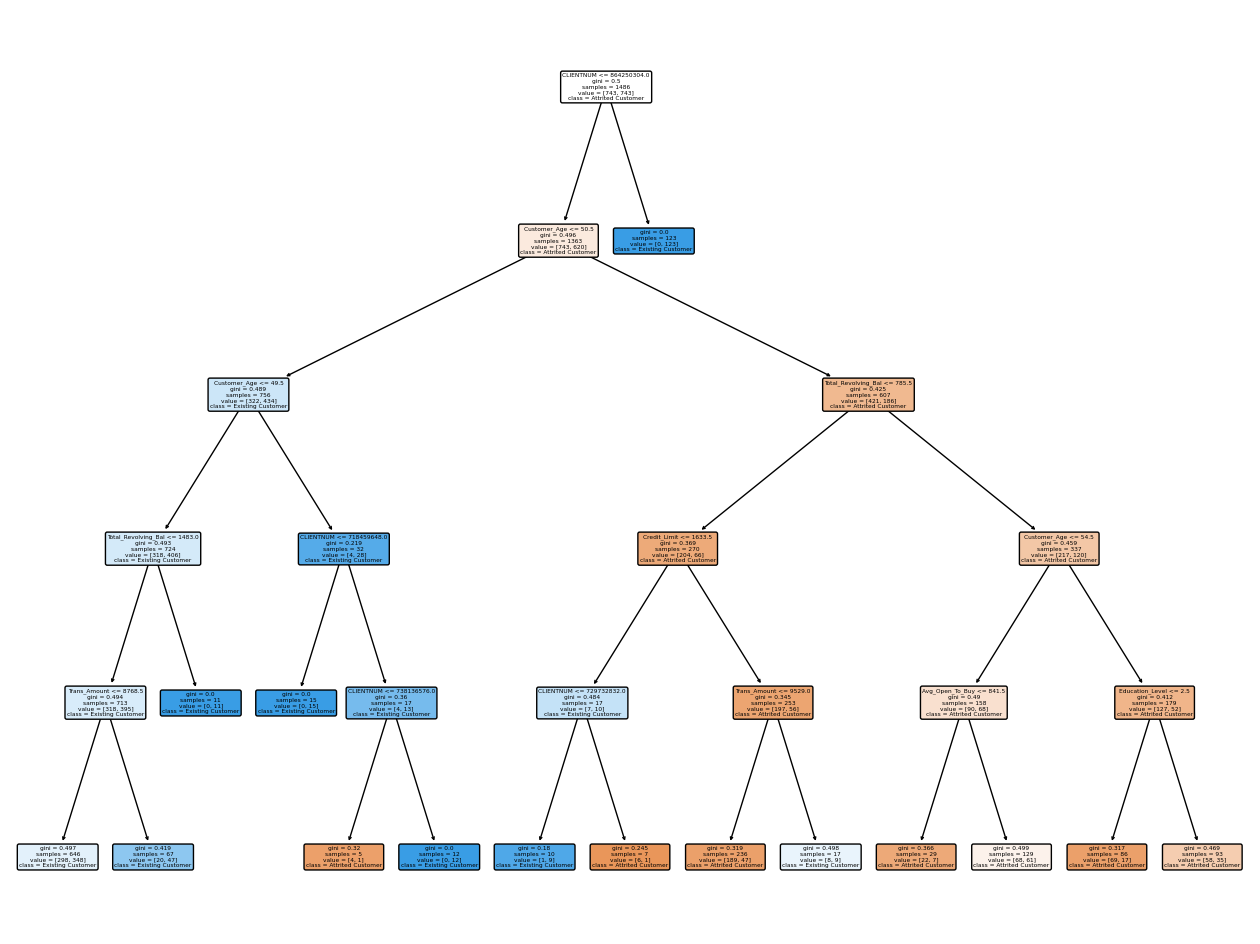

In [ ]:
#Permutation importance
DecisionTree(creditData_dict_2019, best_classifier_dt_2019, ['Customer_Age', 'Total_Revolving_Bal', 'Contacts_Count_12_mon','Months_on_book'], 'Attrition_Flag')

<ipython-input-32-0df5bcb9ef89>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFClass.fit(X_train_rus, Y_train_rus)


---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Months_on_book']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.873485868102288
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.661639014580191
---------------------------------------------------


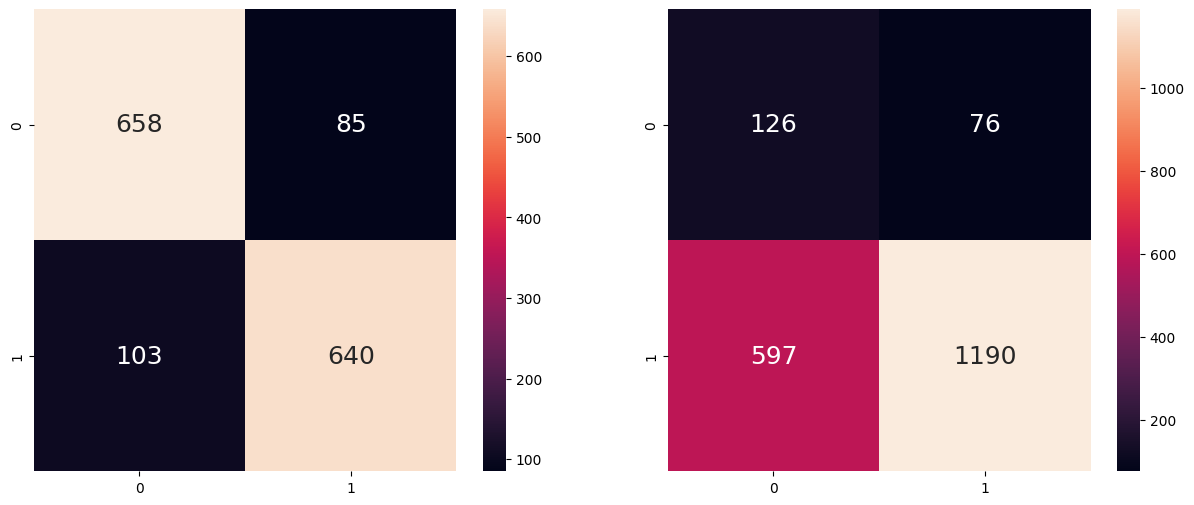

In [ ]:
#Permutation importance
RandomForest(creditData_dict_2019, best_classifier_forest_2019, ['Customer_Age', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio','Months_on_book'], 'Attrition_Flag')

# 2018 & 2019 Data

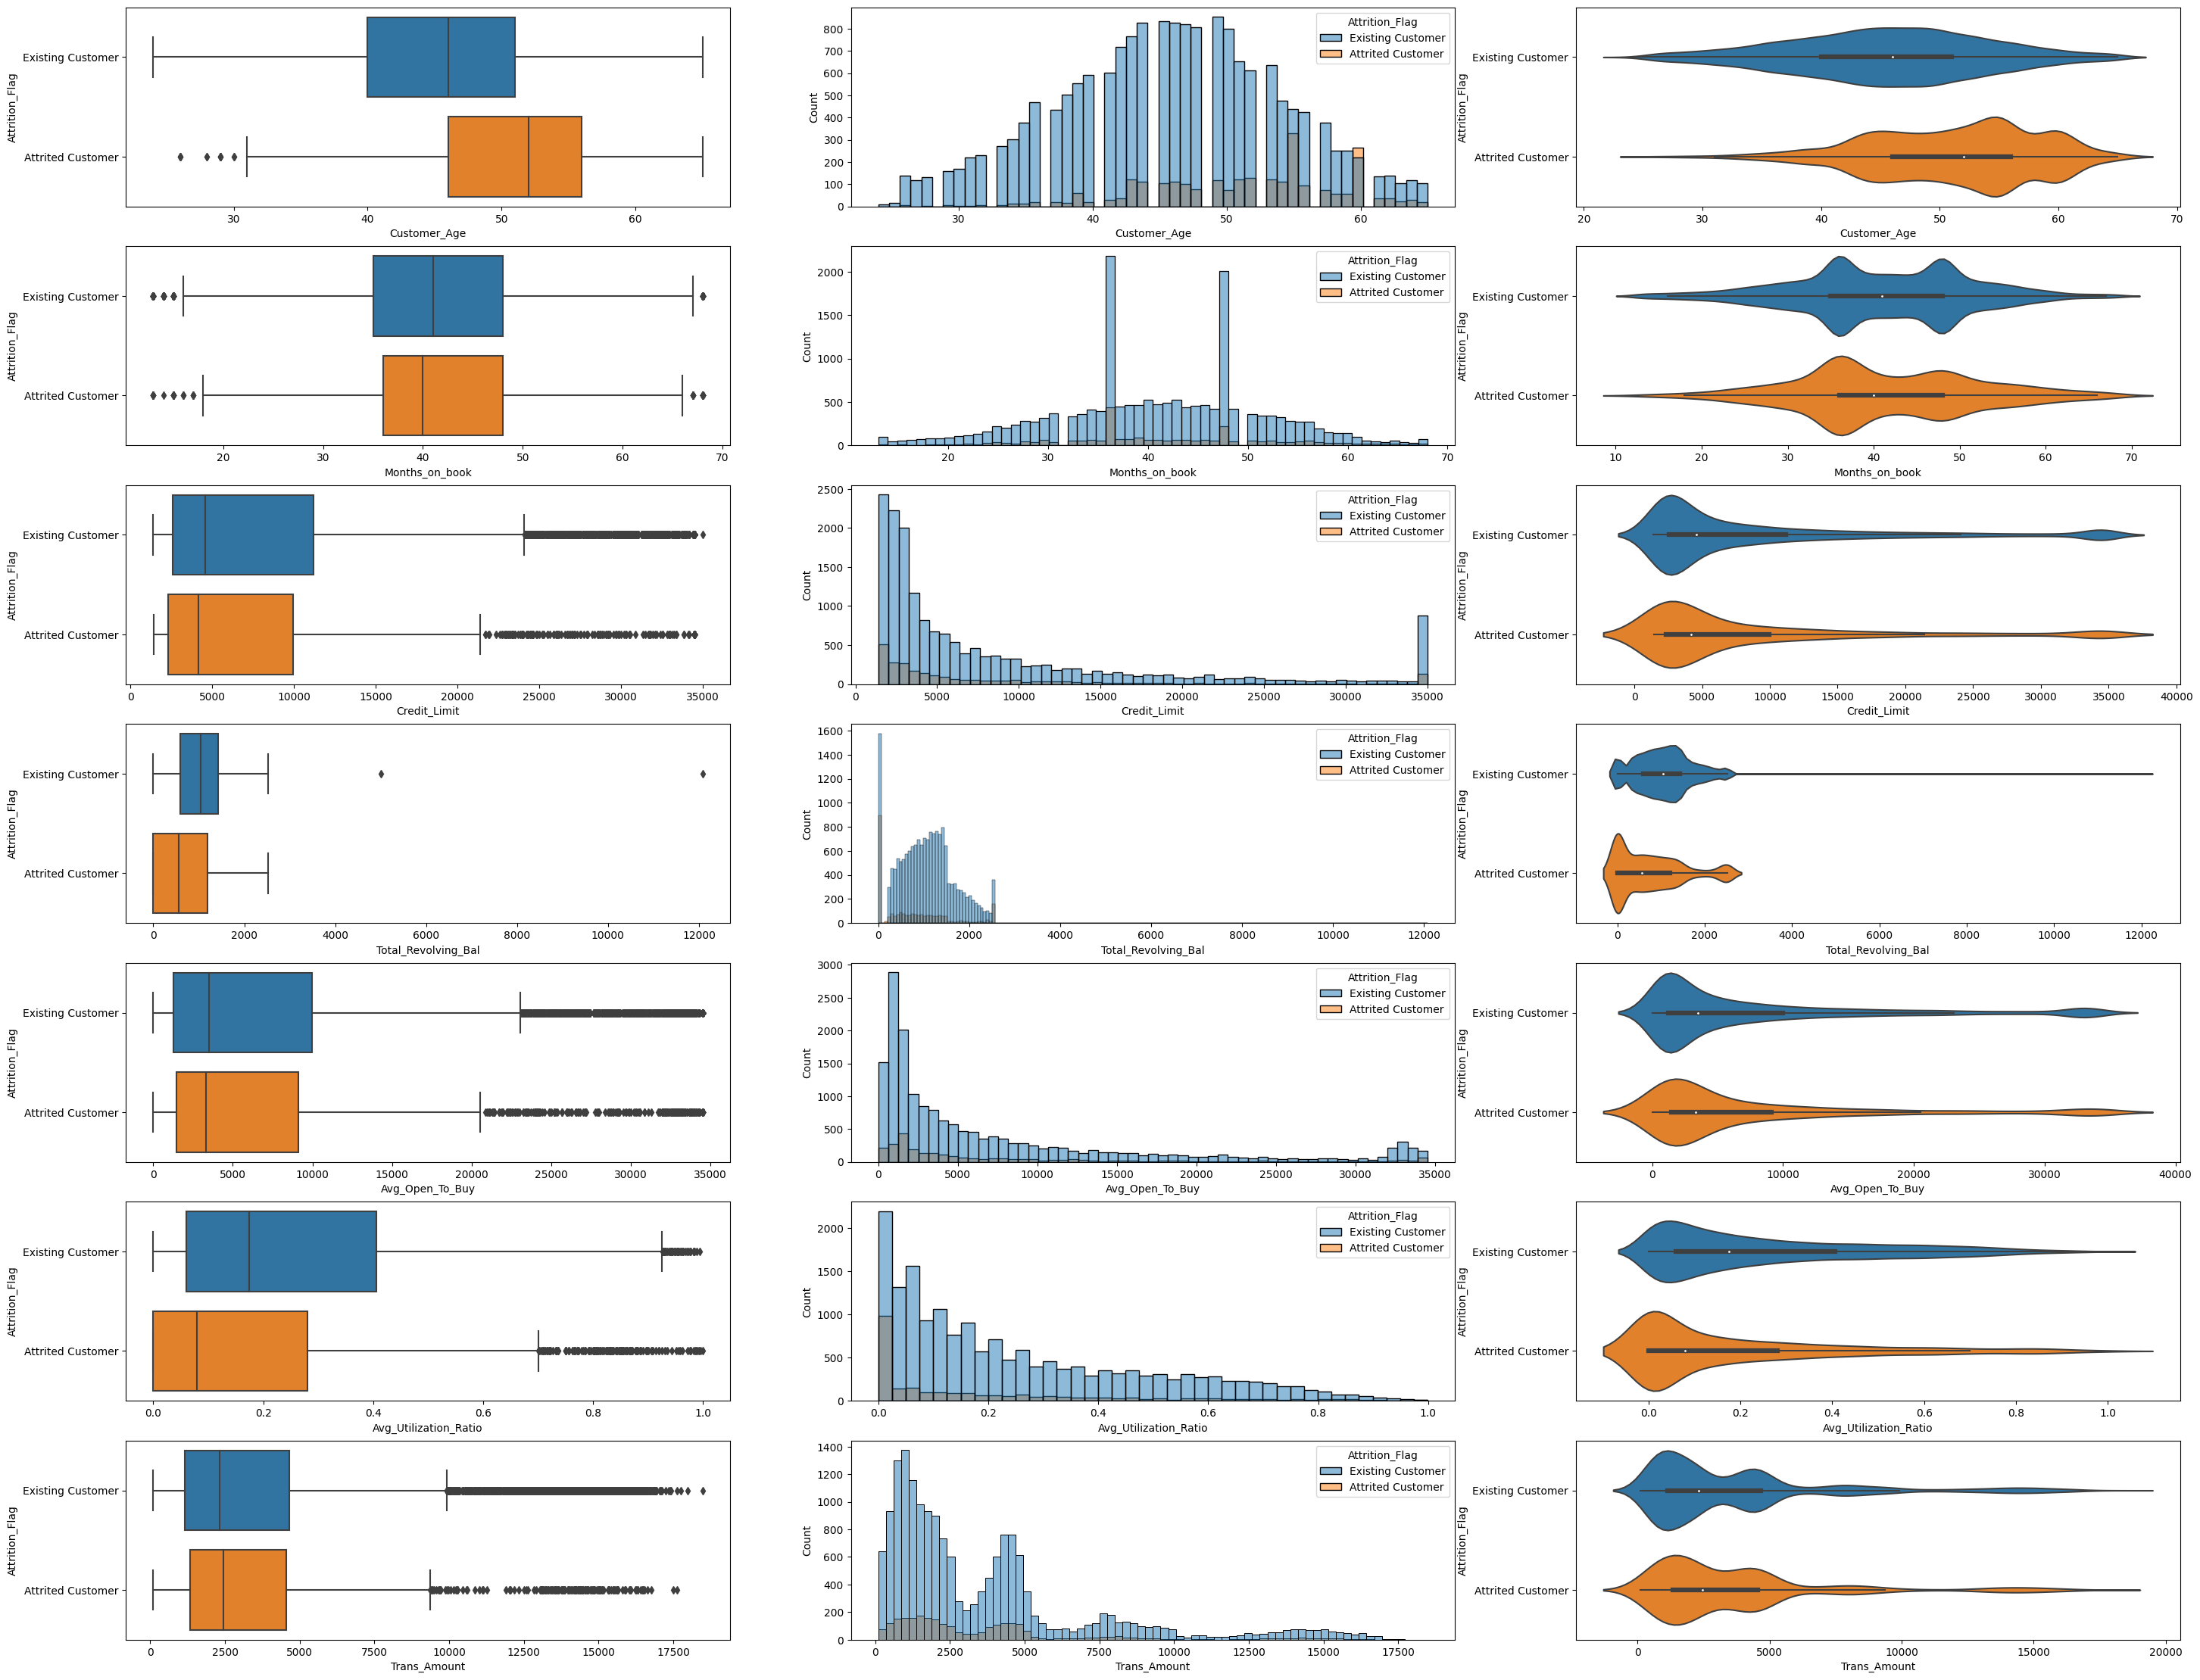

In [ ]:
VisualizationGraphs(merged_df_both, ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio','Trans_Amount'])

# Balancing Data (2018 & 2019)

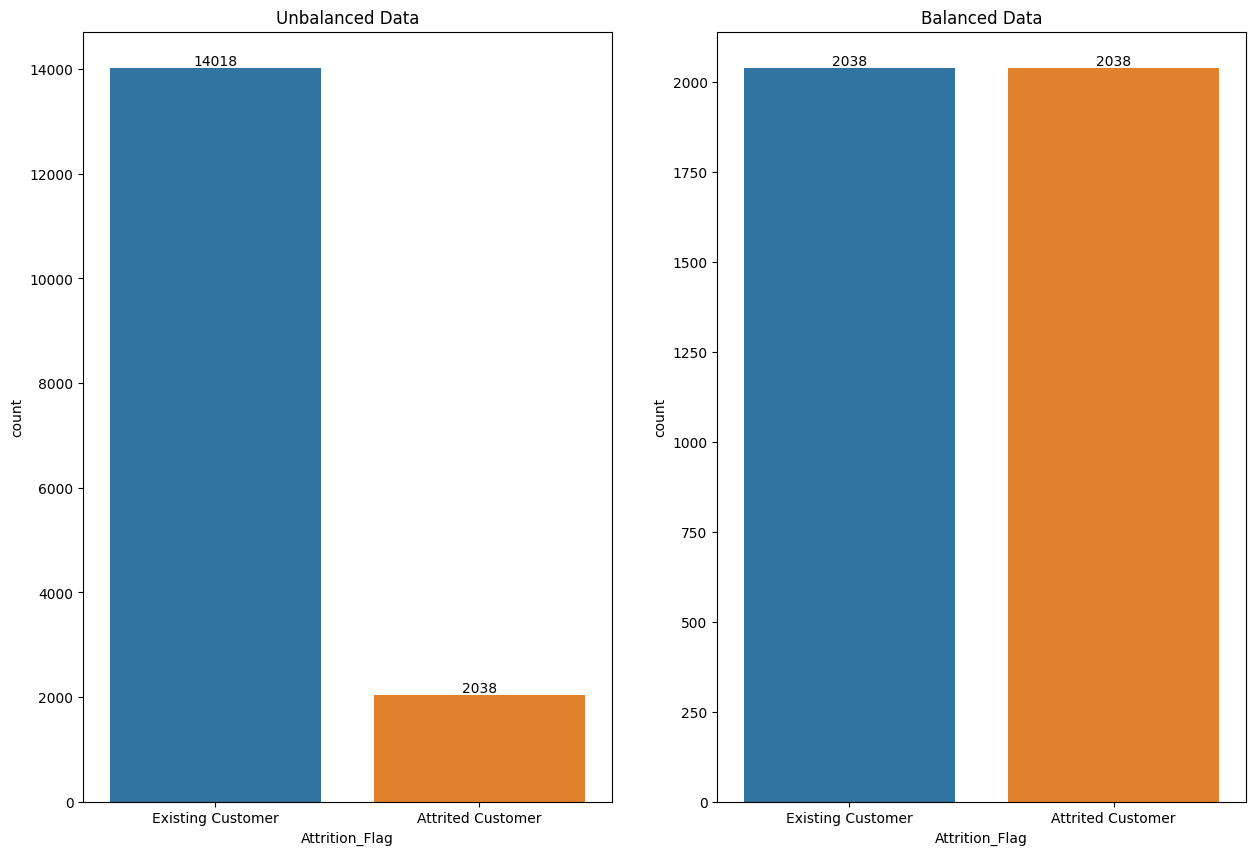

In [ ]:
creditData_dict_both = Train_Test_Balance(merged_df_both, ['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount'], 'Attrition_Flag')

# Hyperparameters Tuning (2018 & 2019)

In [ ]:
#Train and Test data sets
X_train_rus_both = creditData_dict_both["X_train_rus"]
Y_train_rus_both = creditData_dict_both["Y_train_rus"]
X_test_both = creditData_dict_both["X_test"]
Y_test_both = creditData_dict_both["Y_test"]

In [ ]:
best_classifier_dt_both, best_params_dt_both, best_model_dt_both = Randomsearchcv_dt_classifier(X_train_rus_both, Y_train_rus_both,X_test_both, Y_test_both)
print("Best Parameters:", best_params_dt_both)
print("Best Classifier: ",best_classifier_dt_both)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross-Validation Scores: [0.71670346 0.72479765 0.68630339]
Mean Accuracy: 0.7092681636956915
Best Parameters: {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
Best Classifier:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


In [ ]:
best_classifier_forest_both, best_params_forest_both, best_model_rf_both = Randomsearchcv_rf_classifier(X_train_rus_both, Y_train_rus_both,X_test_both, Y_test_both)
print("Best Parameters:", best_params_forest_both)
print("Best Classifier: ",best_classifier_forest_both)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Cross-Validation Scores: [0.74319352 0.74540103 0.71723122]
Mean Accuracy: 0.7352752590685273
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best Classifier:  RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)


# Feature Importance (2018 & 2019)

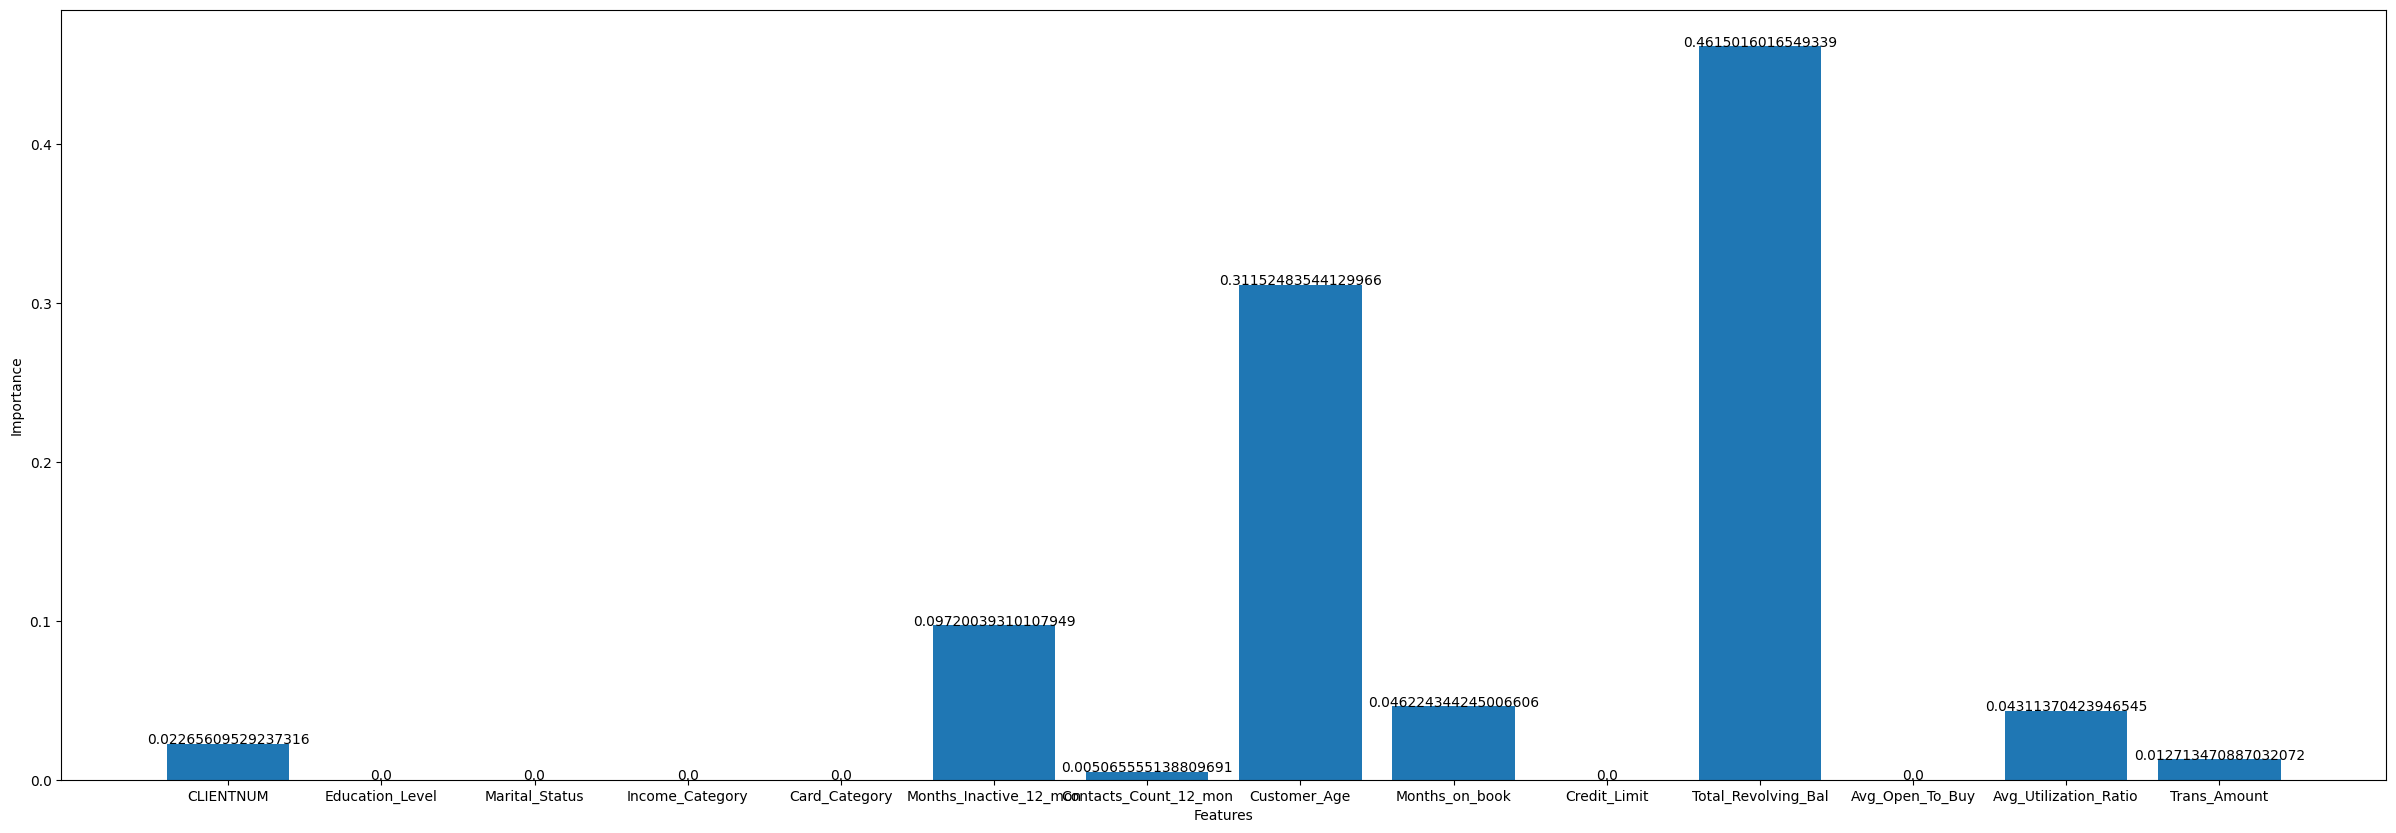

In [ ]:
Feature_importance(best_model_dt_both,X_train_rus_both, Y_train_rus_both)

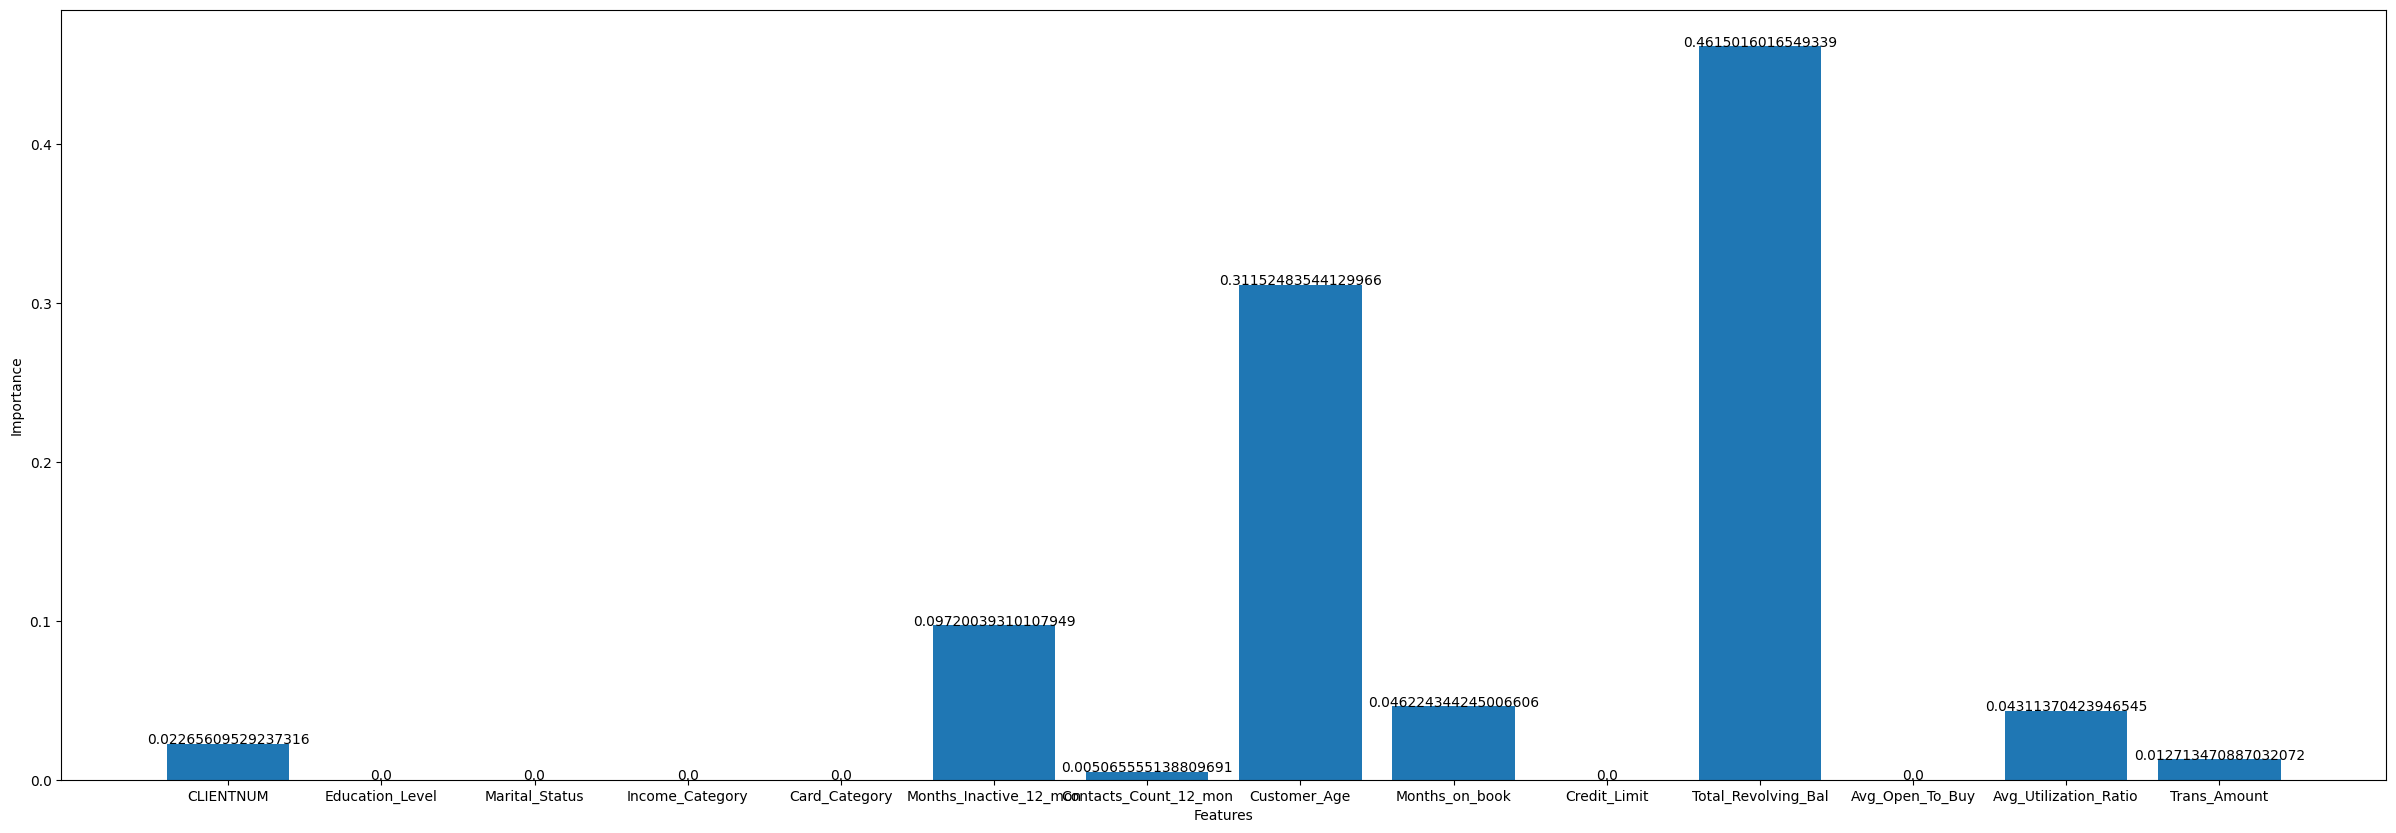

In [ ]:
Feature_importance(best_model_rf_both,X_train_rus_both, Y_train_rus_both)

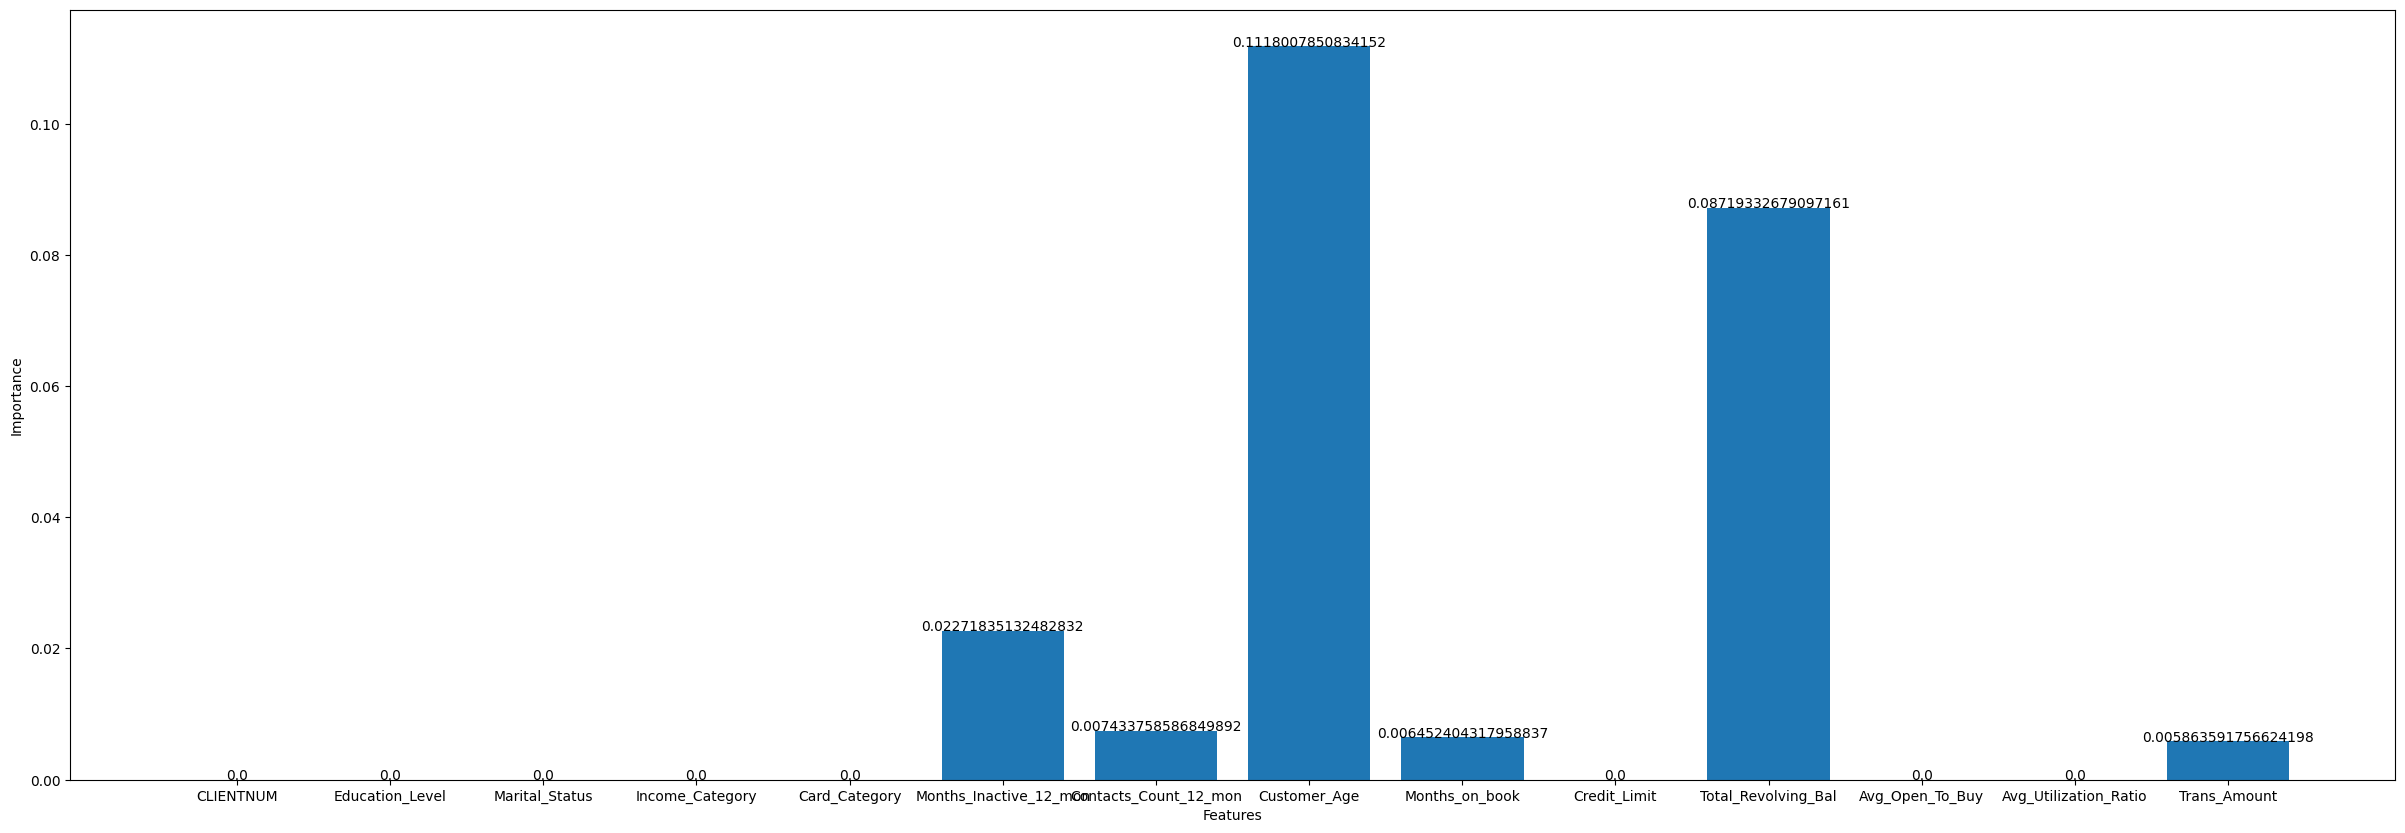

In [ ]:
Permutation_importance(best_model_dt_both,X_train_rus_both, Y_train_rus_both)

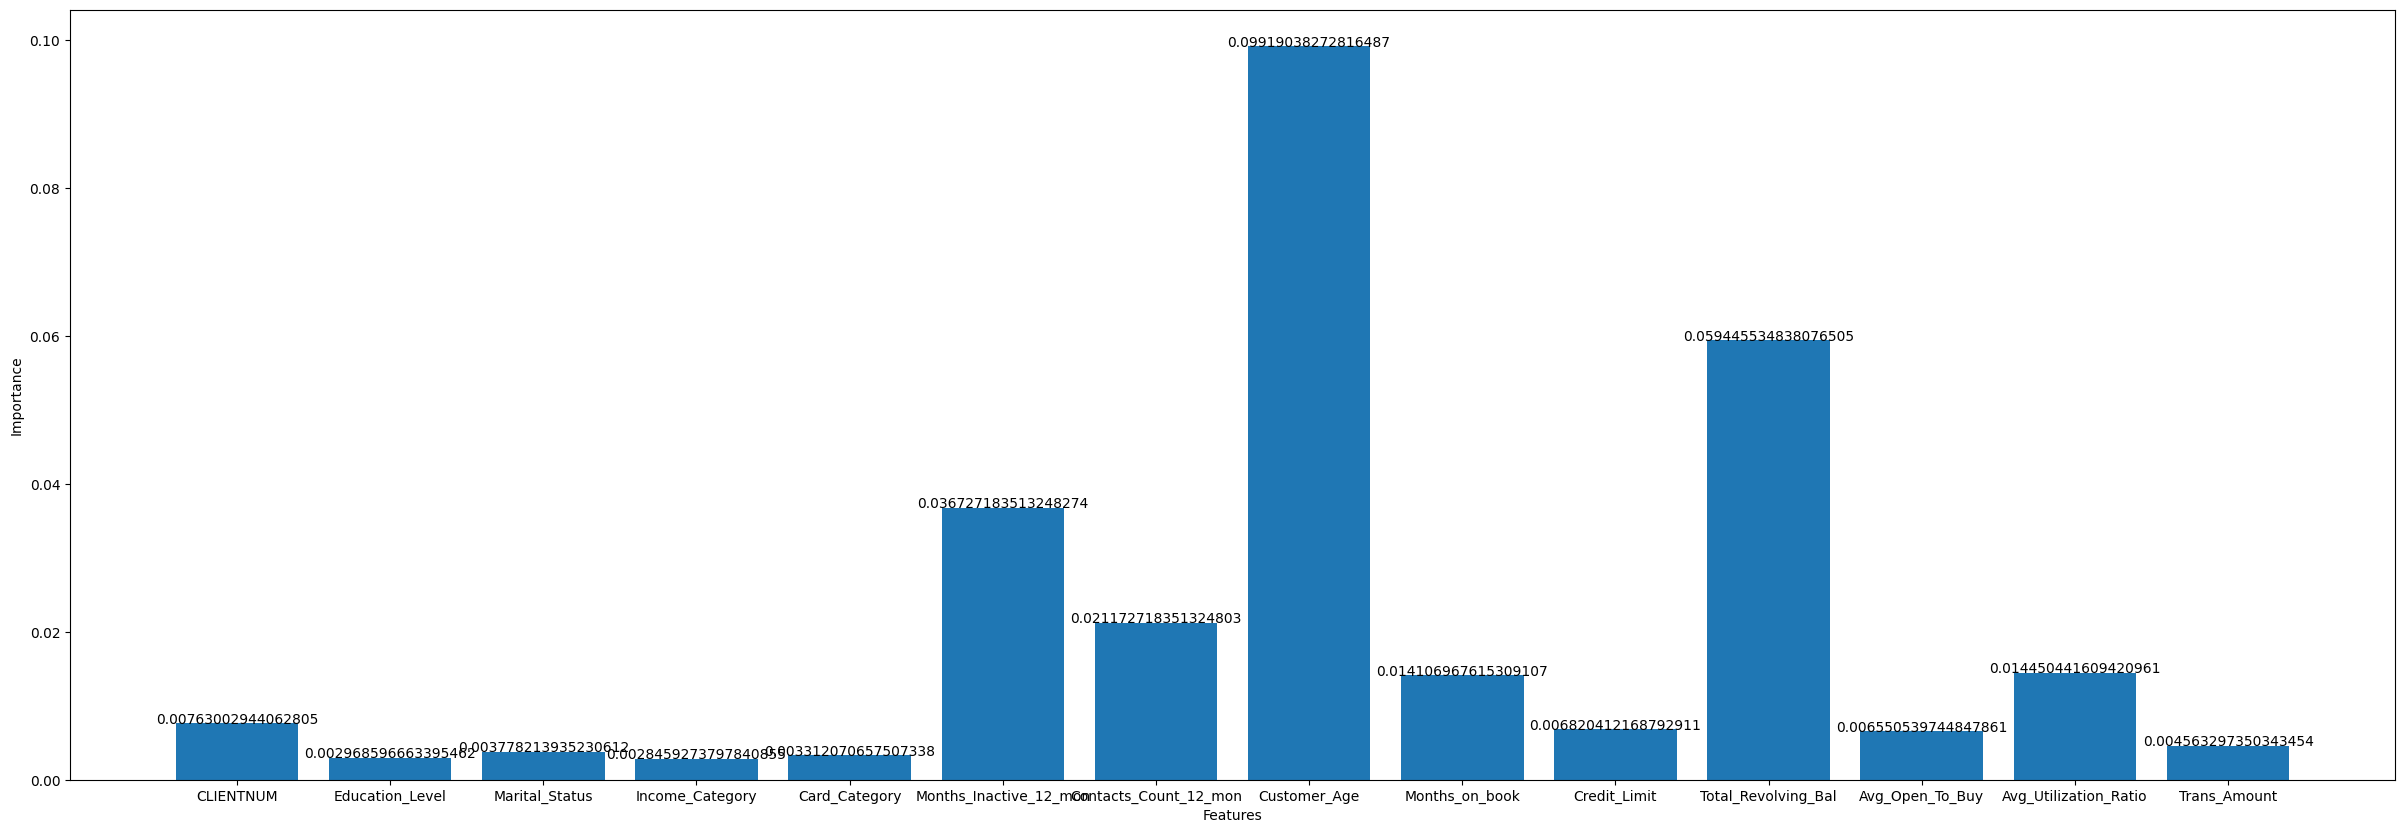

In [ ]:
Permutation_importance(best_model_rf_both,X_train_rus_both, Y_train_rus_both)

# Machine Learning (2018 & 2019 Data)

---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.7242394504416094
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.8259028642590286
---------------------------------------------------


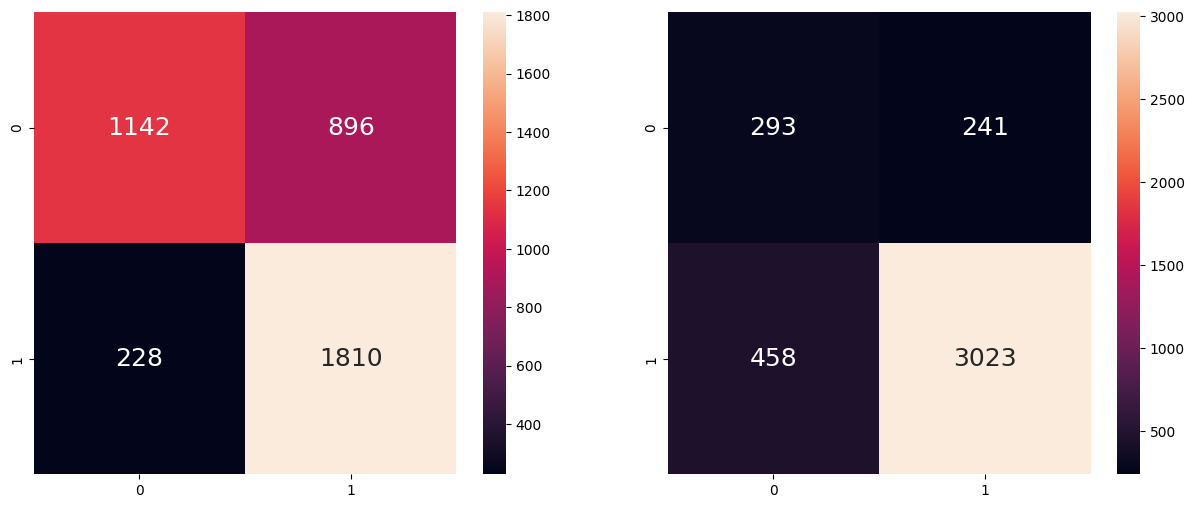

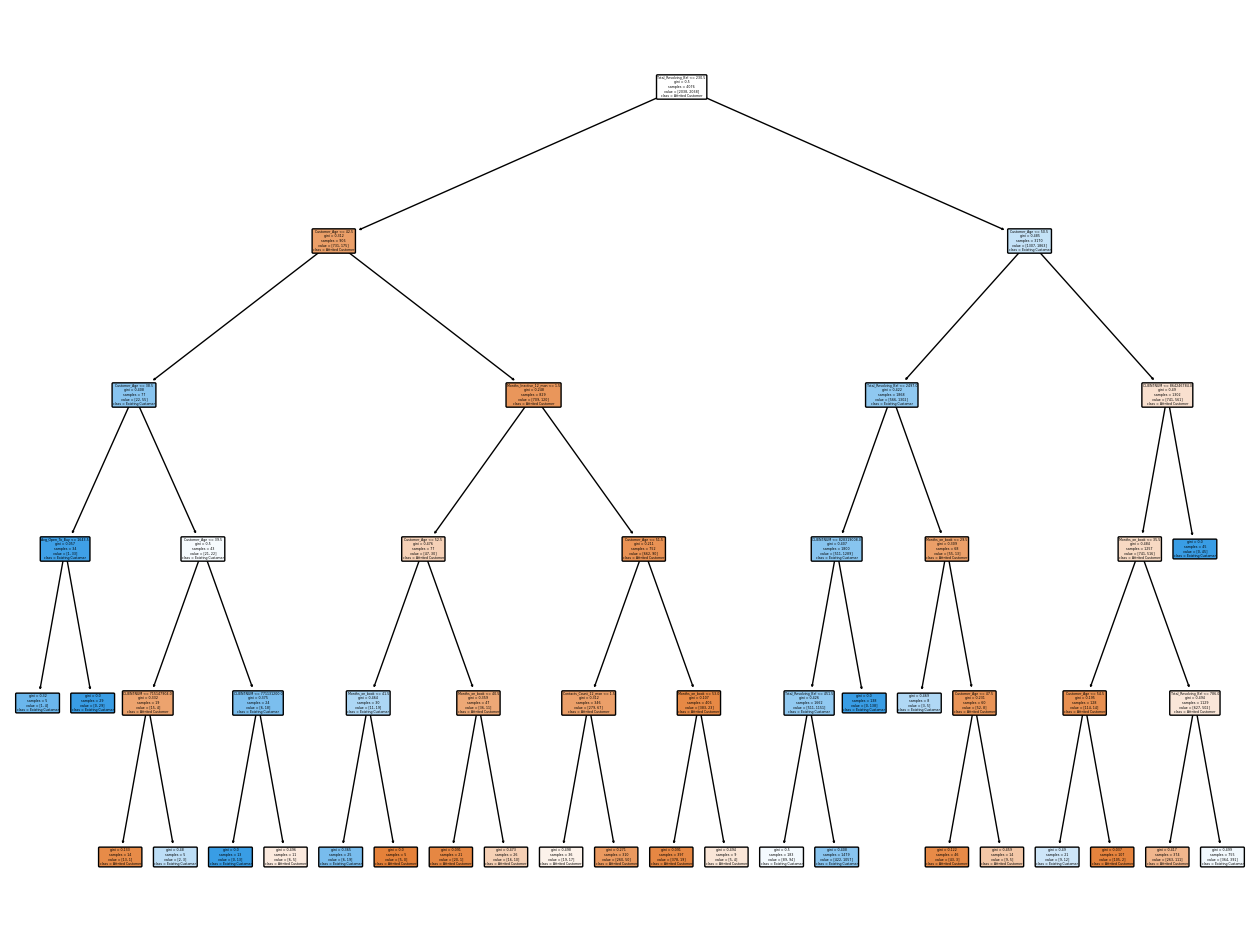

In [ ]:
DecisionTree(creditData_dict_both, best_classifier_dt_both, ['Customer_Age', 'Months_Inactive_12_mon','Months_on_book', 'Total_Revolving_Bal'], 'Attrition_Flag')

<ipython-input-32-0df5bcb9ef89>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFClass.fit(X_train_rus, Y_train_rus)


---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Revolving_Bal']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.9450441609421001
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.7663760896637609
---------------------------------------------------


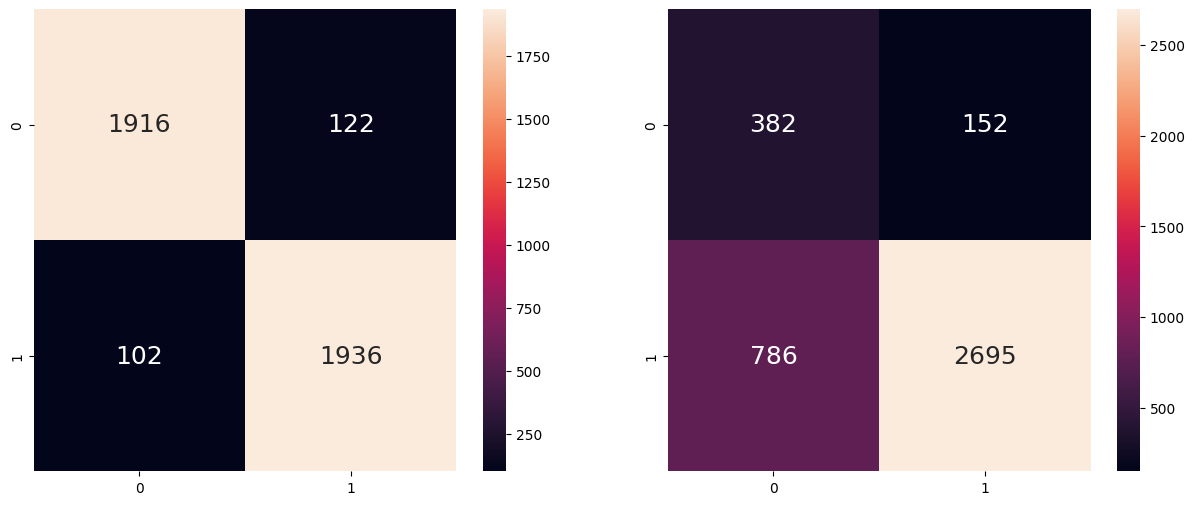

In [ ]:
RandomForest(creditData_dict_both, best_classifier_forest_both, ['Customer_Age', 'Months_Inactive_12_mon','Months_on_book', 'Total_Revolving_Bal'], 'Attrition_Flag')

---------------------------------------------------
Predictor: 	 ['Total_Revolving_Bal', 'Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.7242394504416094
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.8259028642590286
---------------------------------------------------


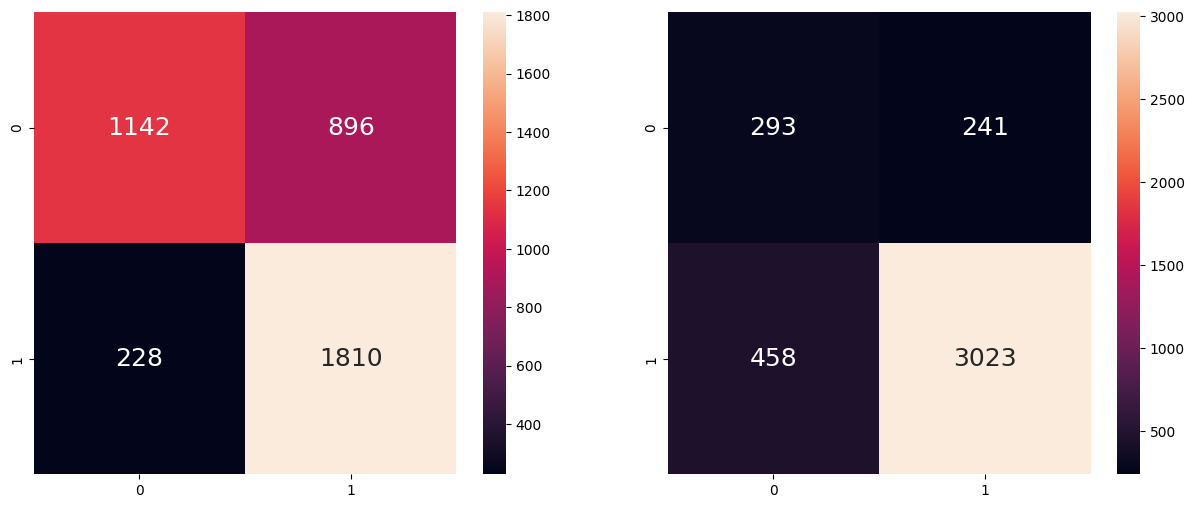

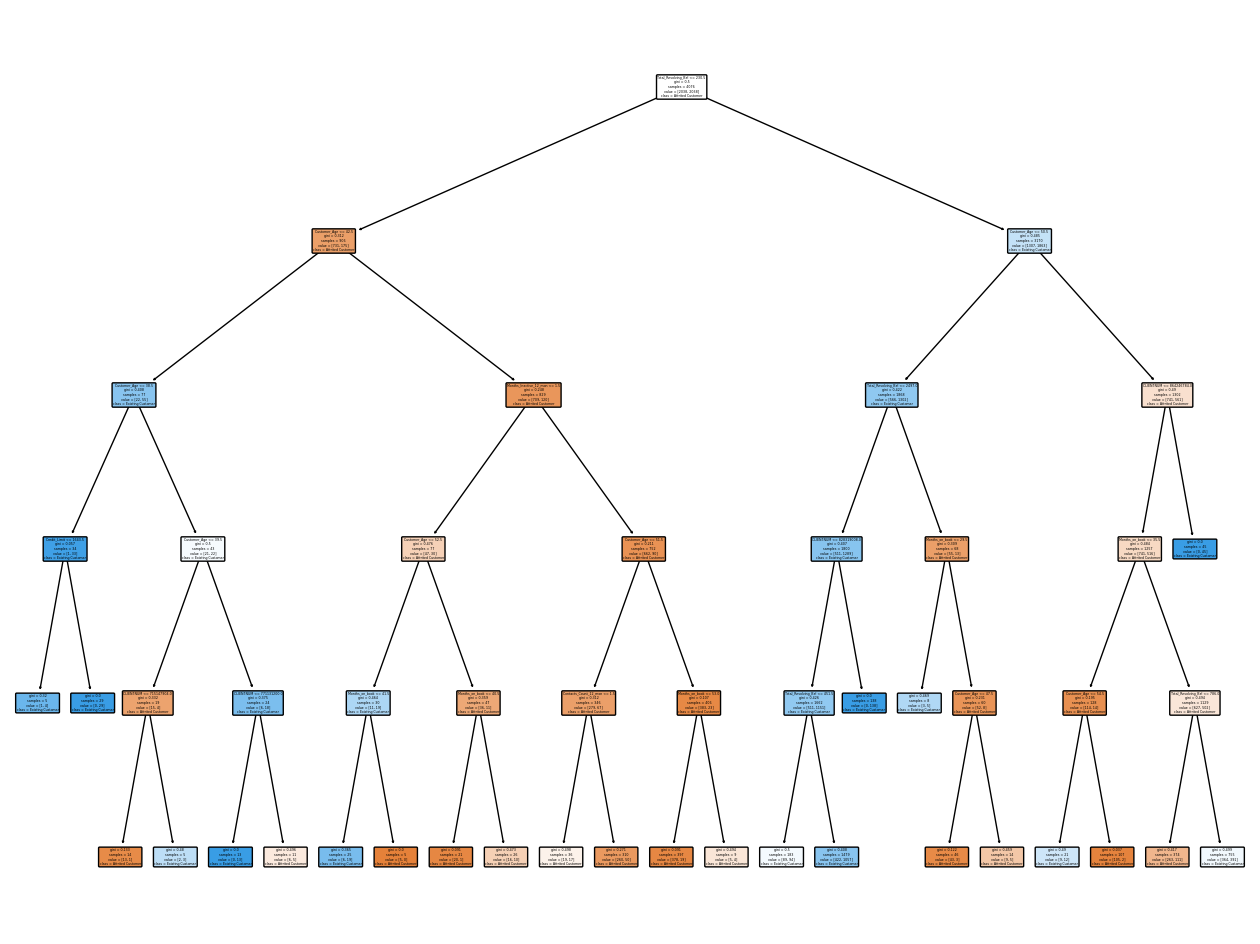

In [ ]:
#Permutation importance
DecisionTree(creditData_dict_both, best_classifier_dt_both, ['Total_Revolving_Bal', 'Customer_Age', 'Months_Inactive_12_mon', 'Months_on_book'], 'Attrition_Flag')

<ipython-input-32-0df5bcb9ef89>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFClass.fit(X_train_rus, Y_train_rus)


---------------------------------------------------
Predictor: 	 ['Customer_Age', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Contacts_Count_12_mon']
Response: 	 Attrition_Flag
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.9443081452404318
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.7653798256537983
---------------------------------------------------


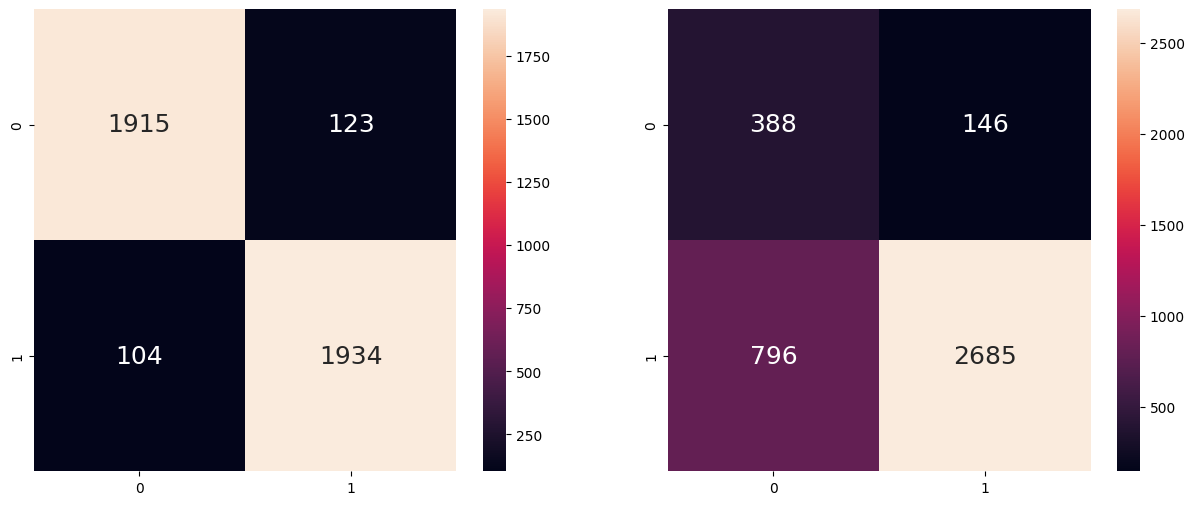

In [ ]:
#Permutation importance
RandomForest(creditData_dict_both, best_classifier_forest_both, ['Customer_Age', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio','Contacts_Count_12_mon'], 'Attrition_Flag')

Overall, after comparing the accuracies of each AI model with different datasets, Decision Tree model using the 2018 dataset yielded the best classification accuracy of 0.

# Prediction using the best model

In [ ]:
#['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Trans_Amount']

feature_list_new = [713536190, 3, 1, 0, 0, 0, 2, 64, 69, 4200, 45000, 4189, 0.5, 4475]

print(best_classifier_dt.predict([feature_list_new]))
print(best_classifier_dt.predict_proba([feature_list_new]))

['Existing Customer']
[[0.31818182 0.68181818]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The model predicted the client with the features above (feature_list_new) as an Existing Customer, who will not attrite with a 63.4% probability.